In [2]:
# Importando as bibliotecas
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt






## Tratamento de dados


In [3]:
# Importando o conjunto de dados e carregando as 5 primeiras e últimas linhas
df=pd.read_csv('/kaggle/input/global-video-game-sales-and-reviews/Video Games Sales.csv')
display(df)

index  Rank                        Game Title Platform    Year  \
0         0     1                        Wii Sports      Wii  2006.0   
1         1     2                 Super Mario Bros.      NES  1985.0   
2         2     3                    Mario Kart Wii      Wii  2008.0   
3         3     4                 Wii Sports Resort      Wii  2009.0   
4         4     5                            Tetris       GB  1989.0   
...     ...   ...                               ...      ...     ...   
1902   1902  1903  Lizzie McGuire 2: Lizzie Diaries      GBA  2004.0   
1903   1903  1904              Xenoblade Chronicles      Wii  2010.0   
1904   1904  1905                     SingStar Abba      PS3  2008.0   
1905   1905  1906    FIFA Soccer World Championship      PS2  2000.0   
1906   1906  1907        WWE SmackDown vs. Raw 2011     X360  2010.0   

             Genre                    Publisher  North America  Europe  Japan  \
0           Sports                     Nintendo          40.43   28.39   3.77   
1         Platform                     Nintendo          29.08    3.58   6.81   
2           Racing                     Nintendo          14.50   12.22   3.63   
3           Sports                     Nintendo          14.82   10.51   3.18   
4           Puzzle                     Nintendo          23.20    2.26   4.22   
...            ...                          ...            ...     ...    ...   
1902        Action   Disney Interactive Studios           0.60    0.22   0.00   
1903  Role-Playing                     Nintendo           0.39    0.22   0.16   
1904          Misc  Sony Computer Entertainment           0.25    0.44   0.00   
1905        Sports              Electronic Arts           0.27    0.21   0.28   
1906      Fighting                          THQ           0.42    0.32   0.00   

      Rest of World  Global  Review  
0              8.54   81.12   76.28  
1              0.77   40.24   91.00  
2              3.21   33.55   82.07  
3              3.01   31.52   82.65  
4              0.58   30.26   88.00  
...             ...     ...     ...  
1902           0.01    0.83   55.00  
1903           0.07    0.83   91.74  
1904           0.14    0.83   73.00  
1905           0.07    0.83   73.00  
1906           0.09    0.83   82.00  

[1907 rows x 13 columns]

In [4]:
# Visualizando informações 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1907 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1907 non-null   int64  
 1   Rank           1907 non-null   int64  
 2   Game Title     1907 non-null   object 
 3   Platform       1907 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1907 non-null   object 
 6   Publisher      1905 non-null   object 
 7   North America  1907 non-null   float64
 8   Europe         1907 non-null   float64
 9   Japan          1907 non-null   float64
 10  Rest of World  1907 non-null   float64
 11  Global         1907 non-null   float64
 12  Review         1907 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 193.8+ KB


In [5]:
# Excluindo valores nulos

df=df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1878 entries, 0 to 1906
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1878 non-null   int64  
 1   Rank           1878 non-null   int64  
 2   Game Title     1878 non-null   object 
 3   Platform       1878 non-null   object 
 4   Year           1878 non-null   float64
 5   Genre          1878 non-null   object 
 6   Publisher      1878 non-null   object 
 7   North America  1878 non-null   float64
 8   Europe         1878 non-null   float64
 9   Japan          1878 non-null   float64
 10  Rest of World  1878 non-null   float64
 11  Global         1878 non-null   float64
 12  Review         1878 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 205.4+ KB


In [6]:
# Passando a coluna Year para o formato date

df['Year'] = pd.to_datetime(df['Year'], format='%Y')

In [7]:
print(df['Year'].unique())

<DatetimeArray>
['2006-01-01 00:00:00', '1985-01-01 00:00:00', '2008-01-01 00:00:00',
 '2009-01-01 00:00:00', '1989-01-01 00:00:00', '1984-01-01 00:00:00',
 '2005-01-01 00:00:00', '1999-01-01 00:00:00', '2007-01-01 00:00:00',
 '2004-01-01 00:00:00', '1990-01-01 00:00:00', '2010-01-01 00:00:00',
 '1988-01-01 00:00:00', '2002-01-01 00:00:00', '2001-01-01 00:00:00',
 '2011-01-01 00:00:00', '1998-01-01 00:00:00', '1996-01-01 00:00:00',
 '2012-01-01 00:00:00', '2000-01-01 00:00:00', '1992-01-01 00:00:00',
 '1997-01-01 00:00:00', '1993-01-01 00:00:00', '1994-01-01 00:00:00',
 '2003-01-01 00:00:00', '1986-01-01 00:00:00', '1995-01-01 00:00:00',
 '1991-01-01 00:00:00', '1987-01-01 00:00:00', '1983-01-01 00:00:00']
Length: 30, dtype: datetime64[ns]


## Análise exploratória

### - Gêneros mais vendidos de cada ano 

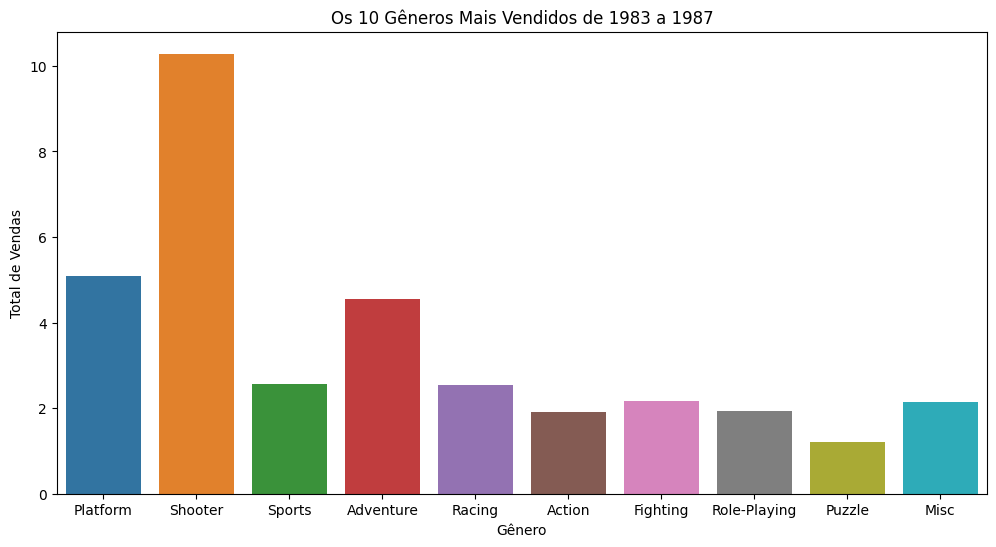

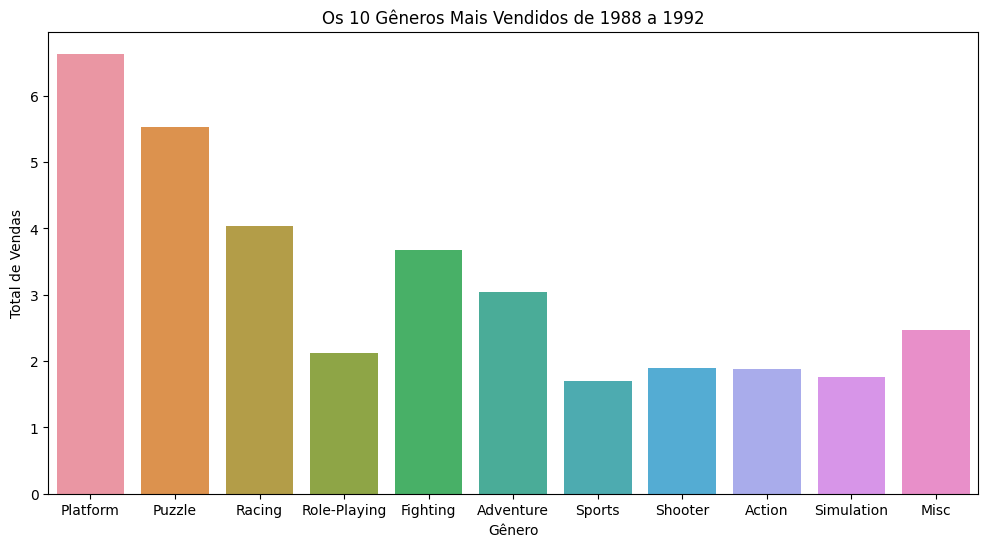

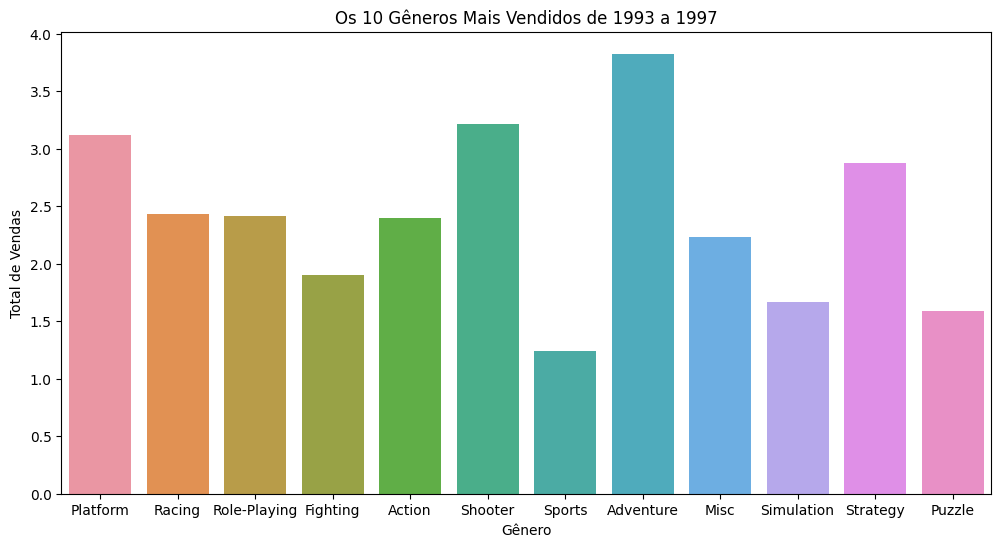

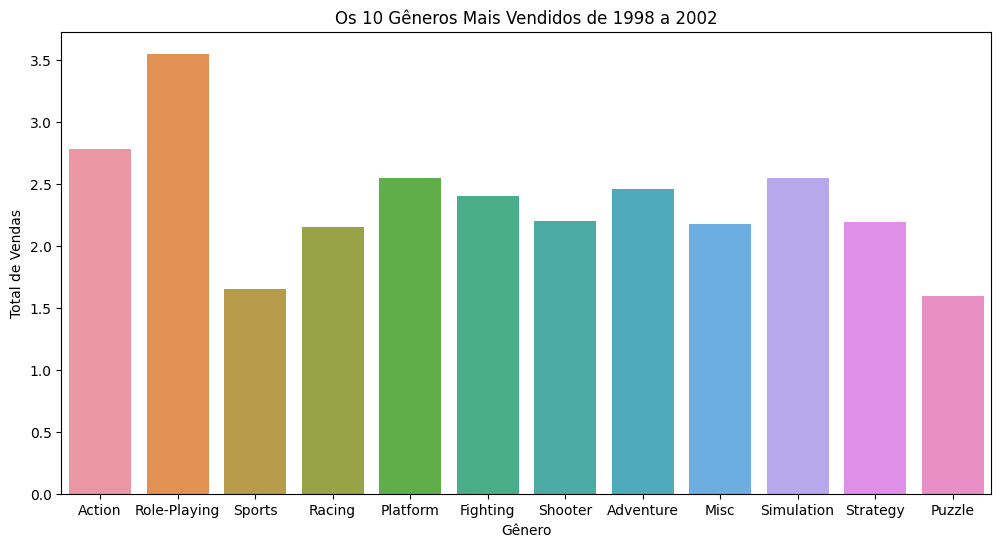

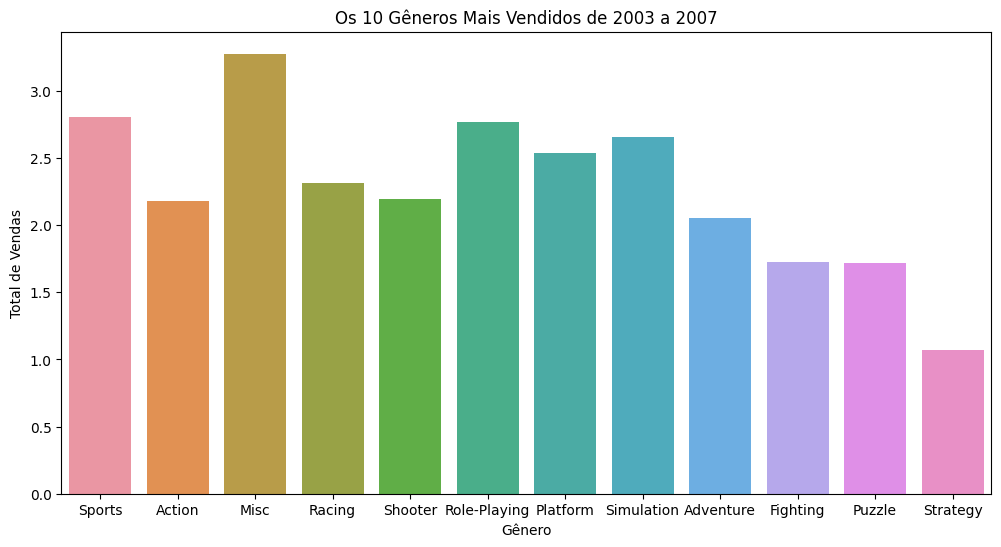

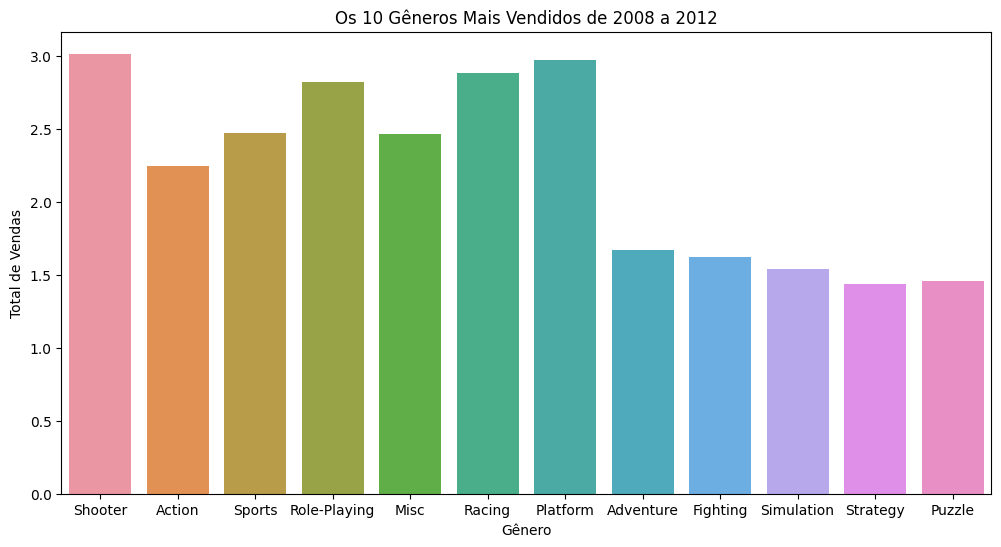

In [8]:
# Fazendo a soma total de vendas




 # Criando Um gráfico para cada 10 anos 
for start_year in range(df['Year'].min().year, df['Year'].max().year + 1, 5):
    end_year = start_year + 4
    
    df_subset = df[(df['Year'].dt.year >= start_year) & (df['Year'].dt.year <= end_year)]
    
    # Criar um gráfico de barras ordenado de acordo com os valores de 'Total' (do maior para o menor)
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Genre', y='Global', data=df_subset, errorbar=None, order=df_subset.groupby('Genre')['Global'].sum().sort_values(ascending=False).index)
    
    plt.xlabel('Gênero')
    plt.ylabel('Total de Vendas')
    plt.title(f'Os 10 Gêneros Mais Vendidos de {start_year} a {end_year}')
    
    plt.show()

### Observamos uma dinâmica constante na popularidade dos gêneros ao longo dos anos, influenciada não apenas pelo decorrer do tempo, mas também pela evolução tecnológica que torna gêneros mais interativos, como tiro, aventura e RP, particularmente atraentes. O avanço contínuo dos gráficos na época analisada adicionava um apelo adicional aos jogos. No entanto, no cenário atual do mercado de jogos, percebemos uma estabilização nesse padrão, indicando uma possível estagnação na indústria.

In [9]:
df.head()

index  Rank         Game Title Platform       Year     Genre Publisher  \
0      0     1         Wii Sports      Wii 2006-01-01    Sports  Nintendo   
1      1     2  Super Mario Bros.      NES 1985-01-01  Platform  Nintendo   
2      2     3     Mario Kart Wii      Wii 2008-01-01    Racing  Nintendo   
3      3     4  Wii Sports Resort      Wii 2009-01-01    Sports  Nintendo   
4      4     5             Tetris       GB 1989-01-01    Puzzle  Nintendo   

   North America  Europe  Japan  Rest of World  Global  Review  
0          40.43   28.39   3.77           8.54   81.12   76.28  
1          29.08    3.58   6.81           0.77   40.24   91.00  
2          14.50   12.22   3.63           3.21   33.55   82.07  
3          14.82   10.51   3.18           3.01   31.52   82.65  
4          23.20    2.26   4.22           0.58   30.26   88.00

### - Gêneros mais vendidos por console



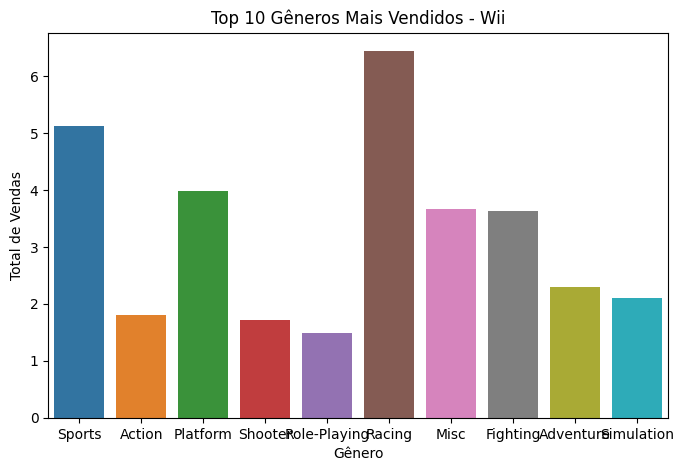

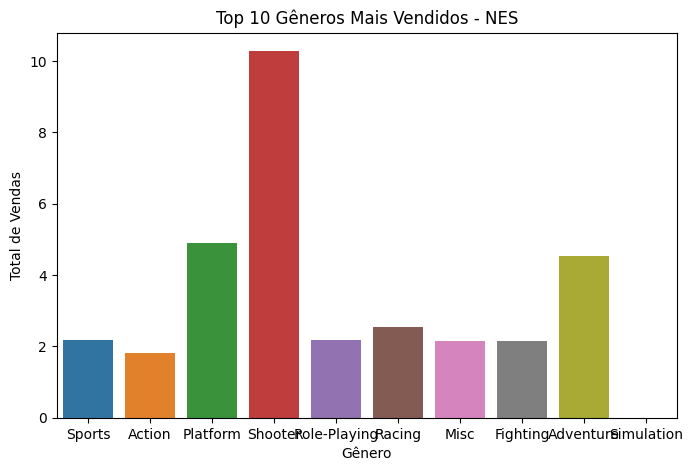

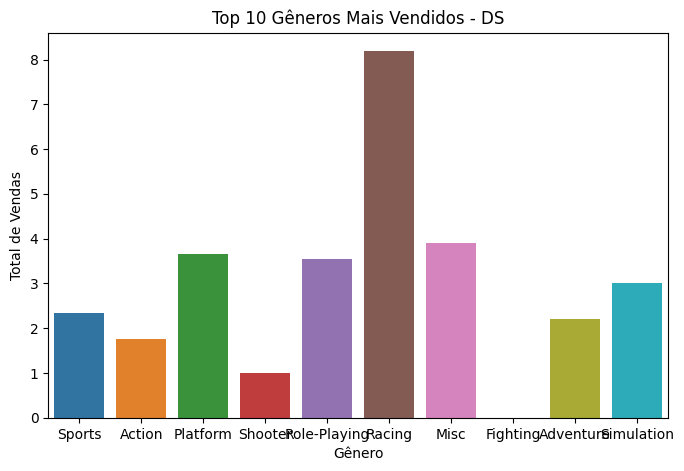

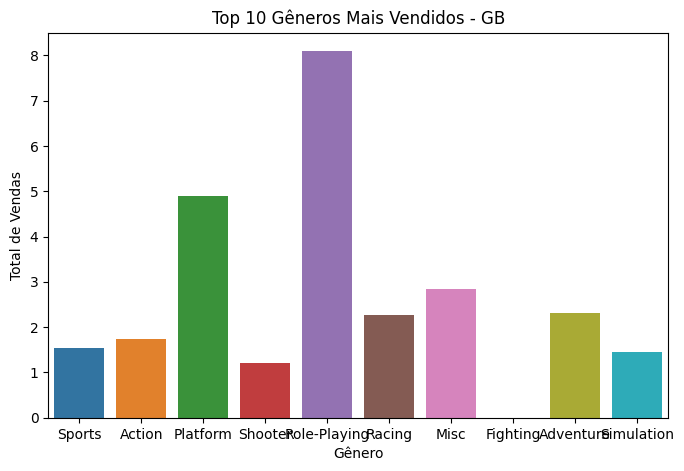

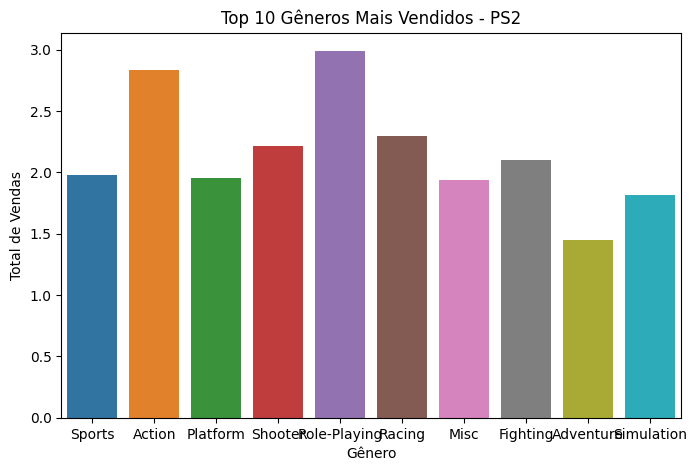

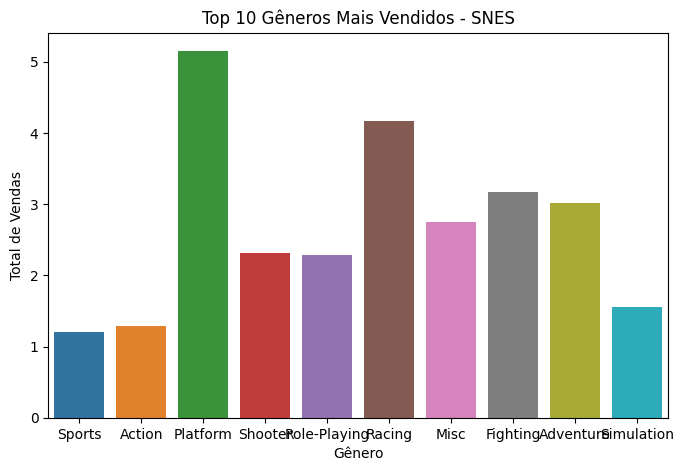

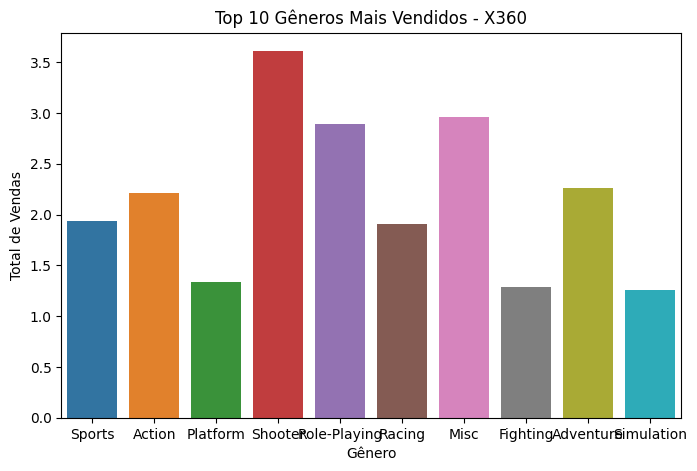

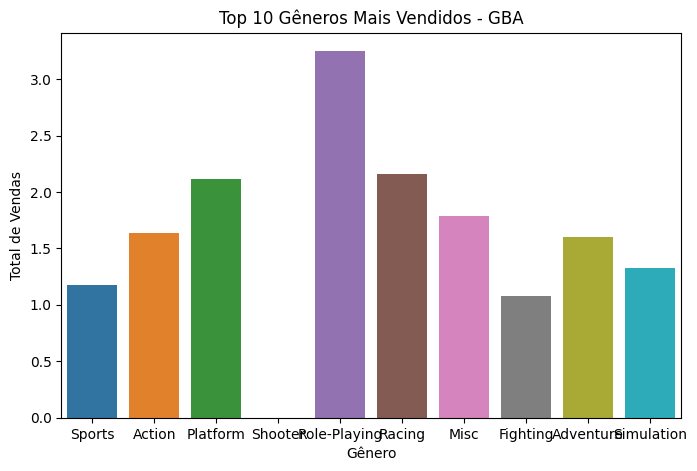

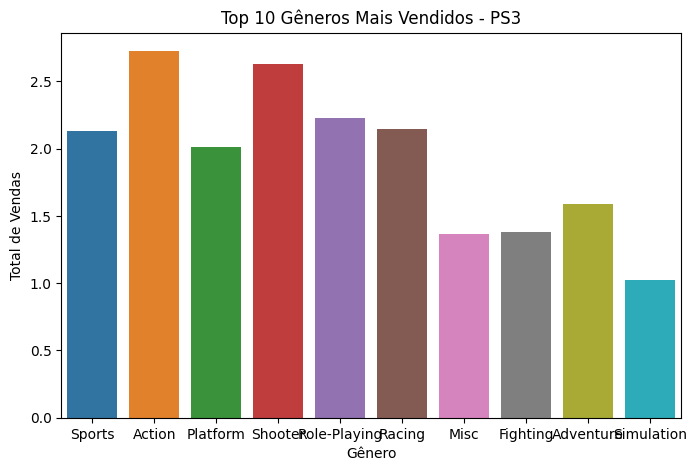

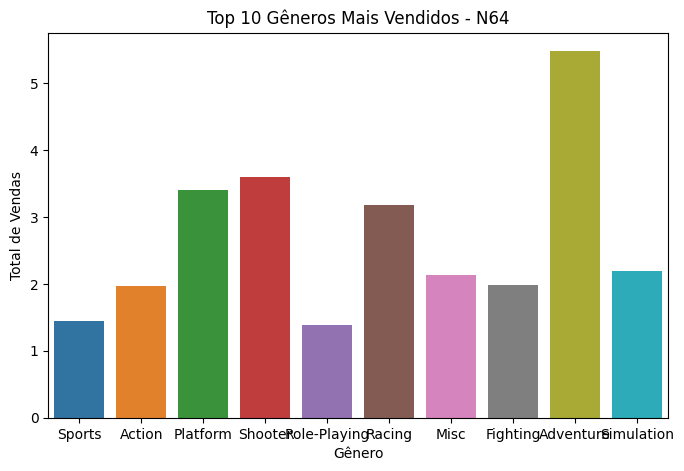

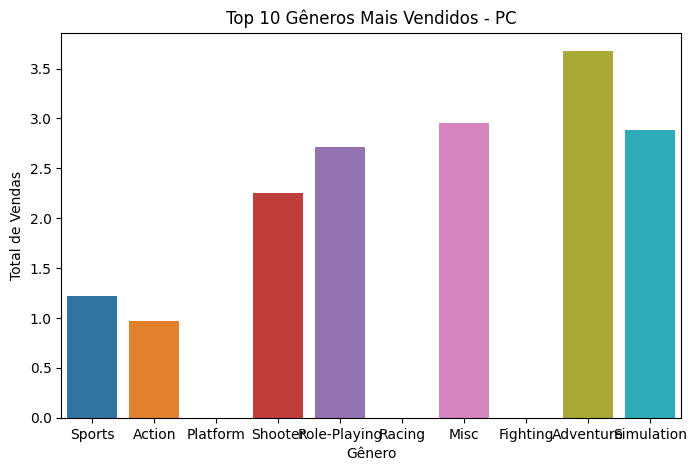

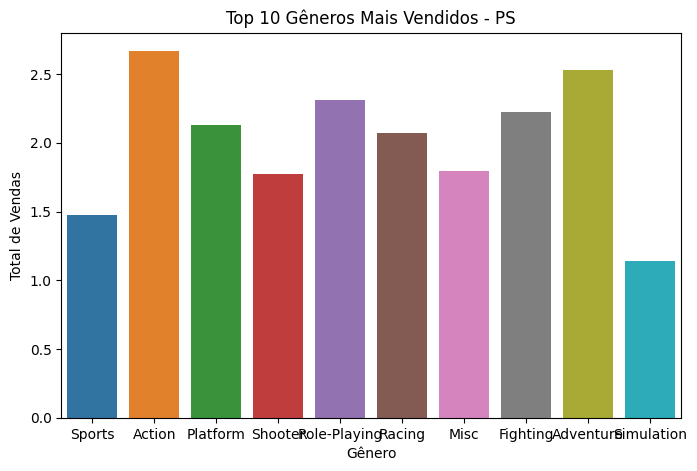

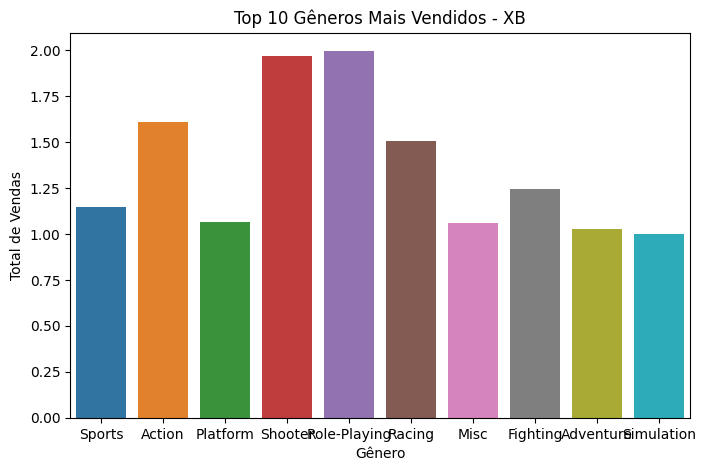

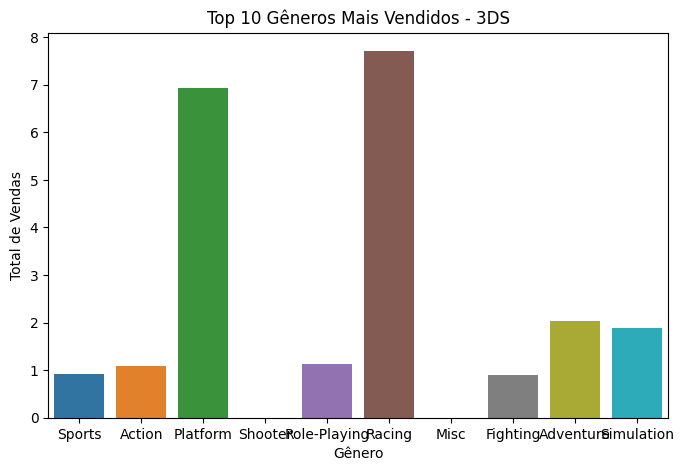

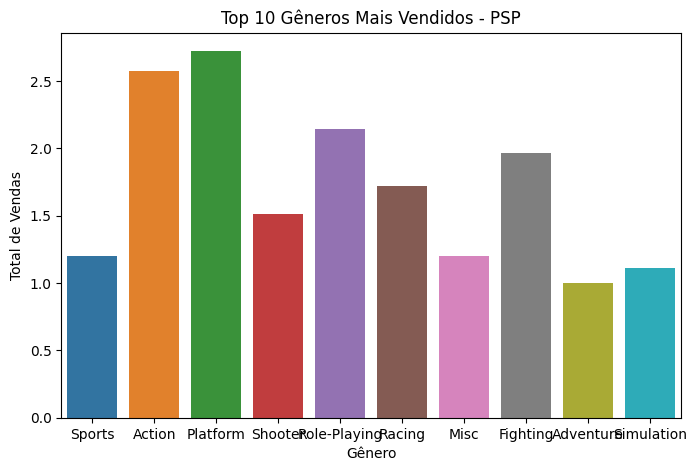

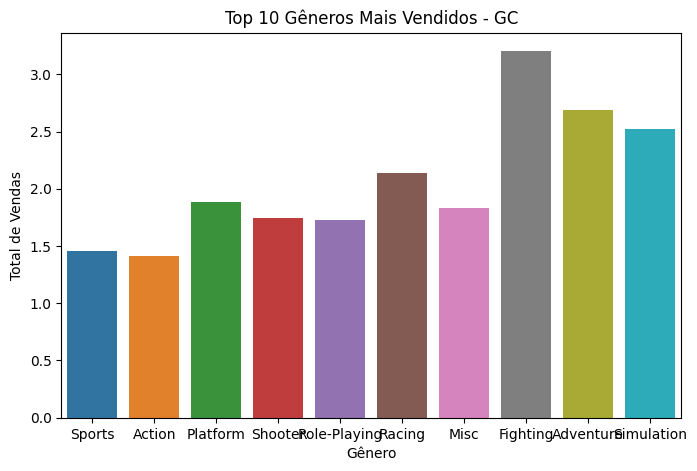

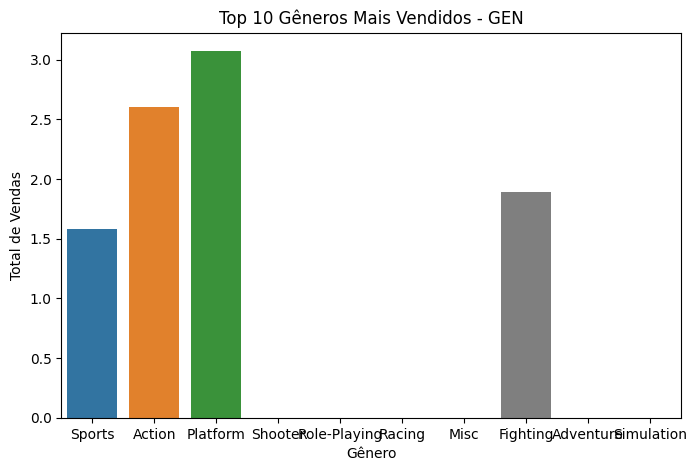

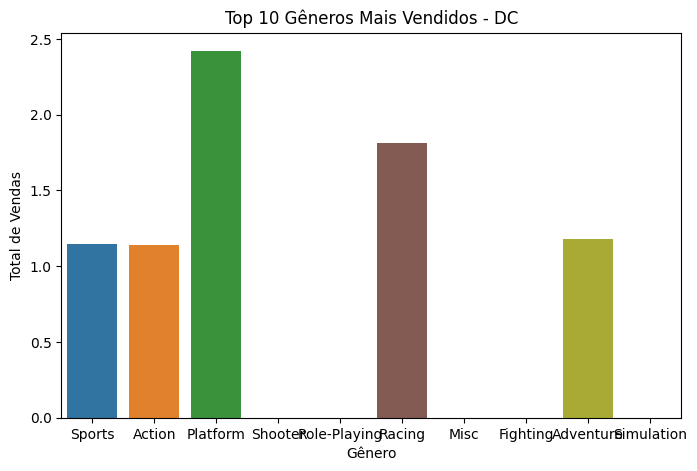

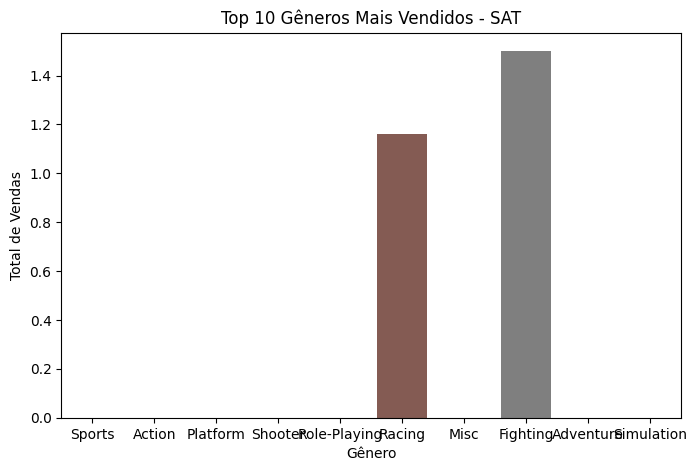

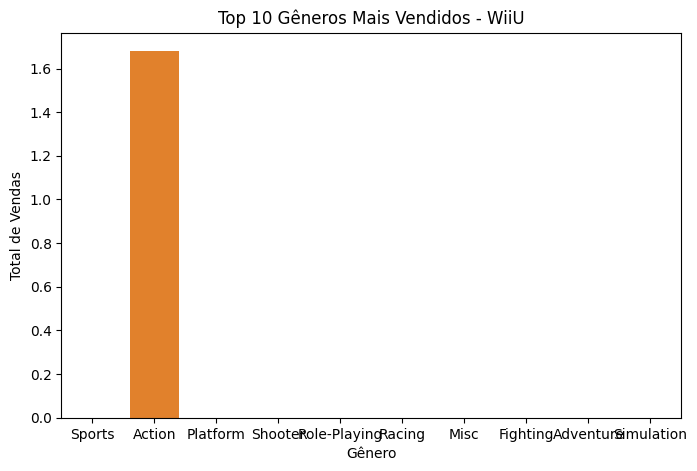

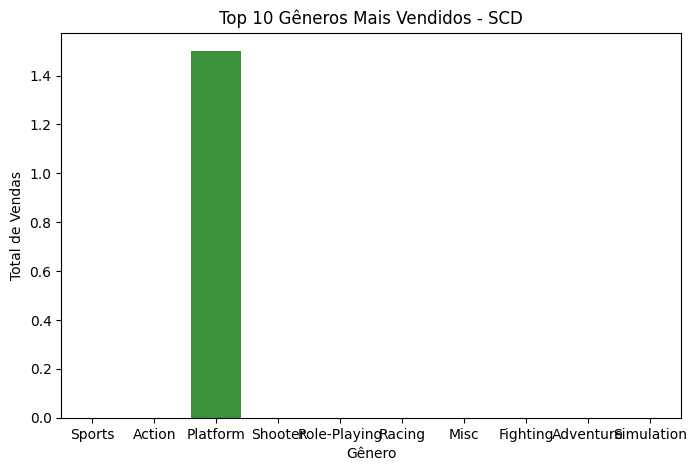

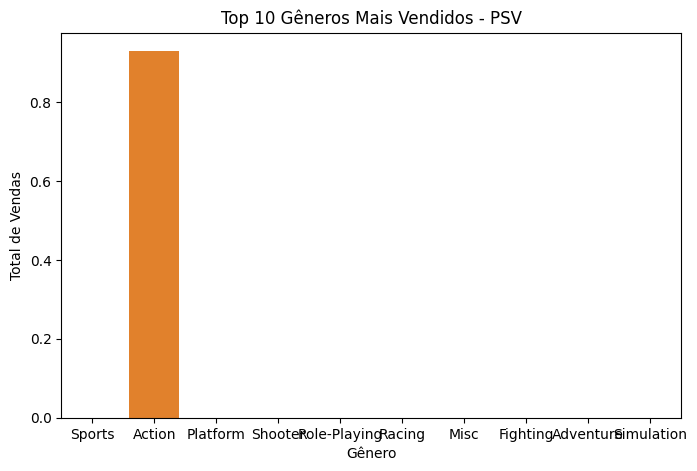

In [10]:
top_genres = df.groupby('Genre')['Global'].sum().sort_values(ascending=False).index[:10]


df_top = df[df['Genre'].isin(top_genres)]


platforms = df_top['Platform'].unique()


for platform in platforms:

    df_platform = df_top[df_top['Platform'] == platform]
    

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Genre', y='Global', errorbar=None, data=df_platform, order=top_genres)
    

    plt.xlabel('Gênero')
    plt.ylabel('Total de Vendas')
    plt.title(f'Top 10 Gêneros Mais Vendidos - {platform}')
    

    plt.show()

## -Gênero mais vendido por local

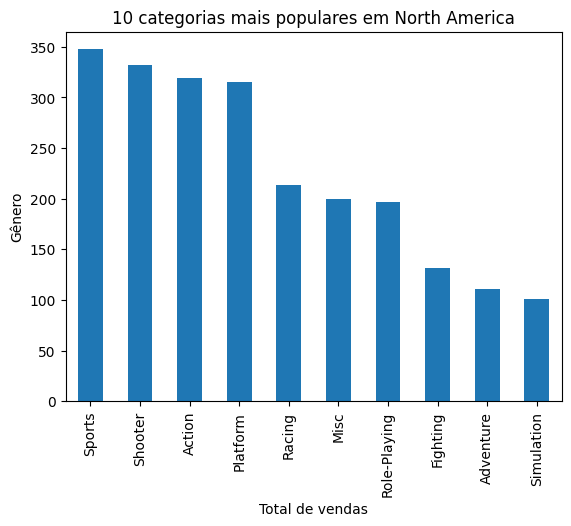

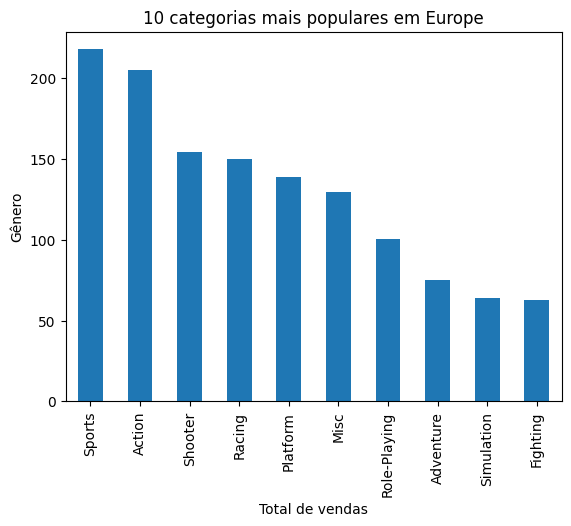

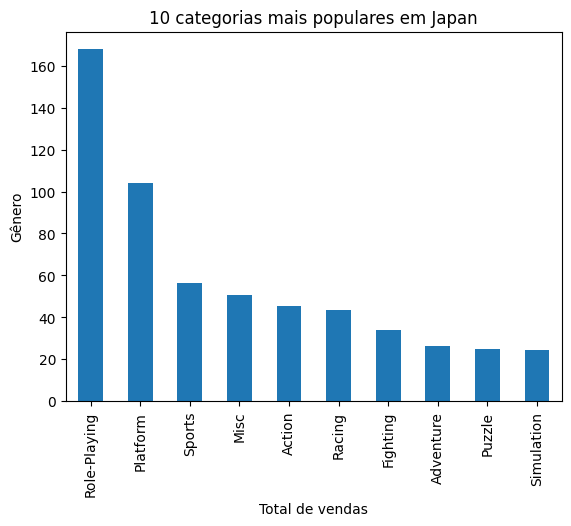

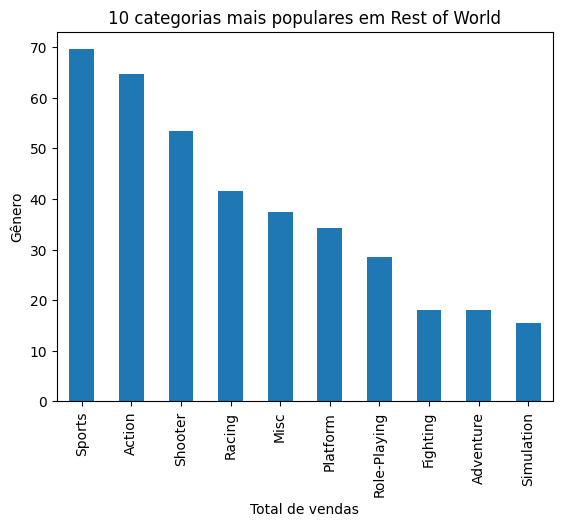

In [11]:
locais=['North America','Europe','Japan','Rest of World']

for local in locais:
    df.groupby('Genre')[local].sum().sort_values(ascending=False).head(10).plot(kind='bar')
    plt.xlabel('Total de vendas')
    plt.ylabel('Gênero')
    plt.title(f'10 categorias mais populares em {local}')
    plt.show()



## -Gêneros mais vendidos por publicadoras 

publicadoras=df[plat

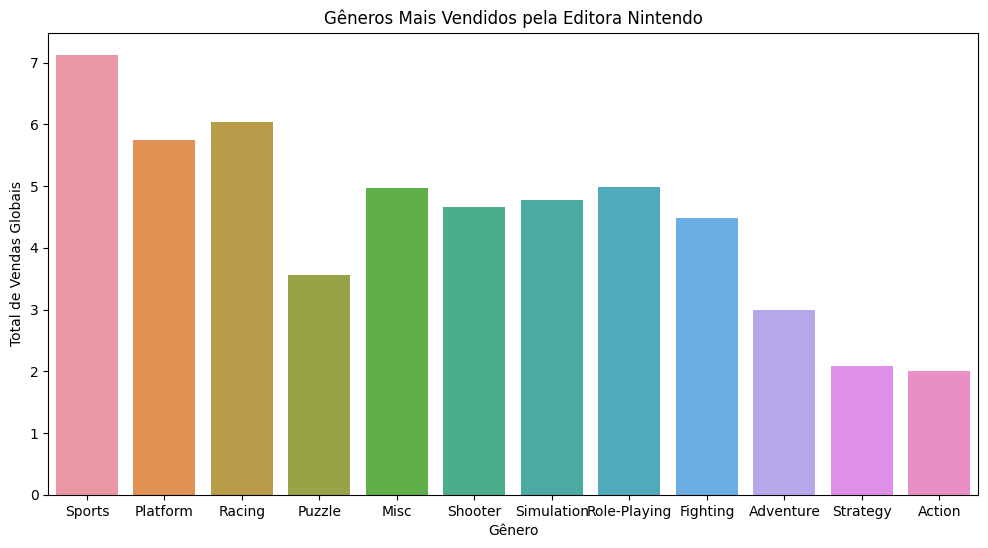

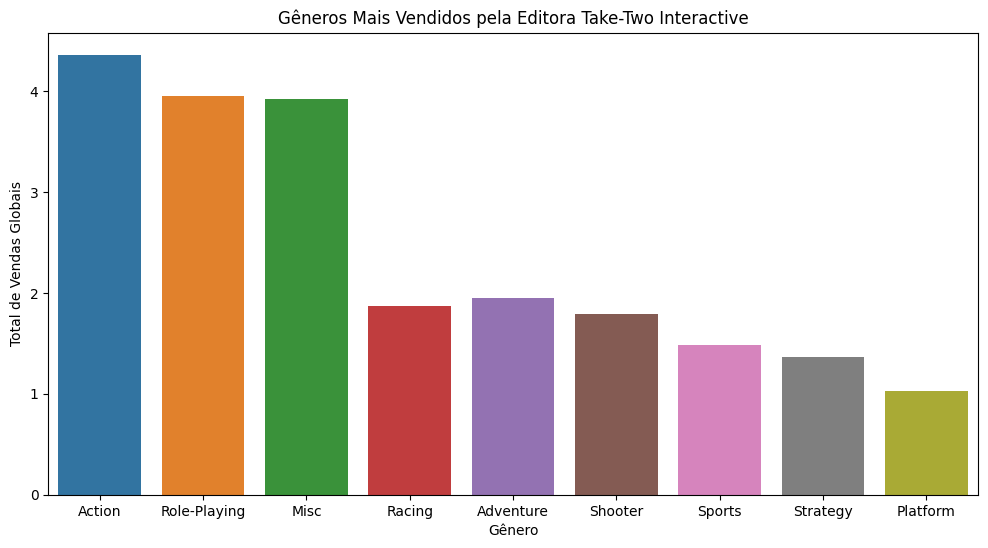

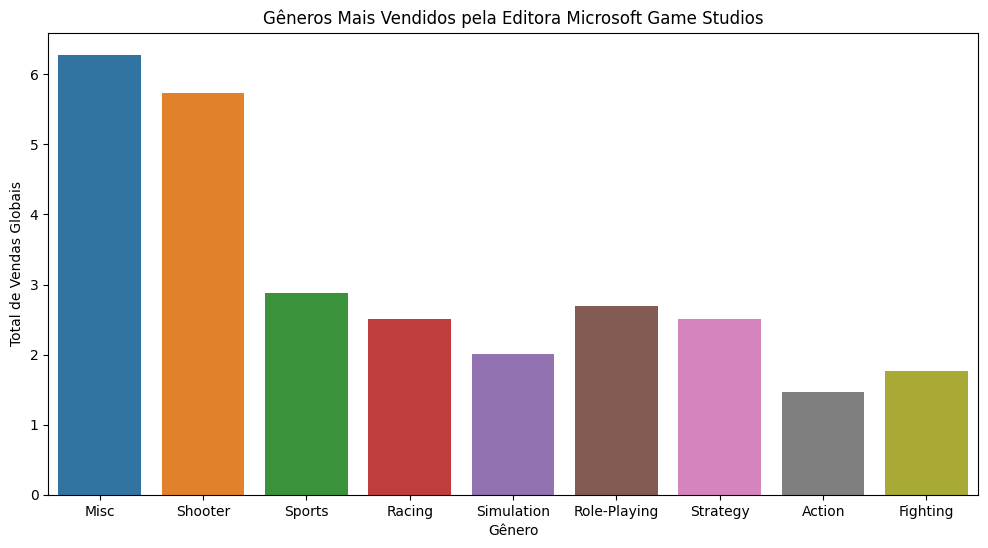

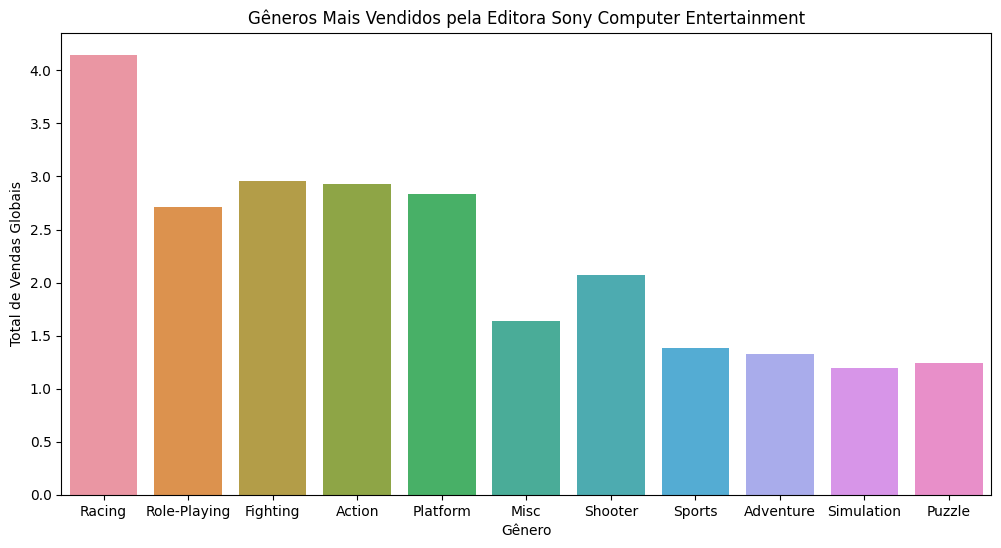

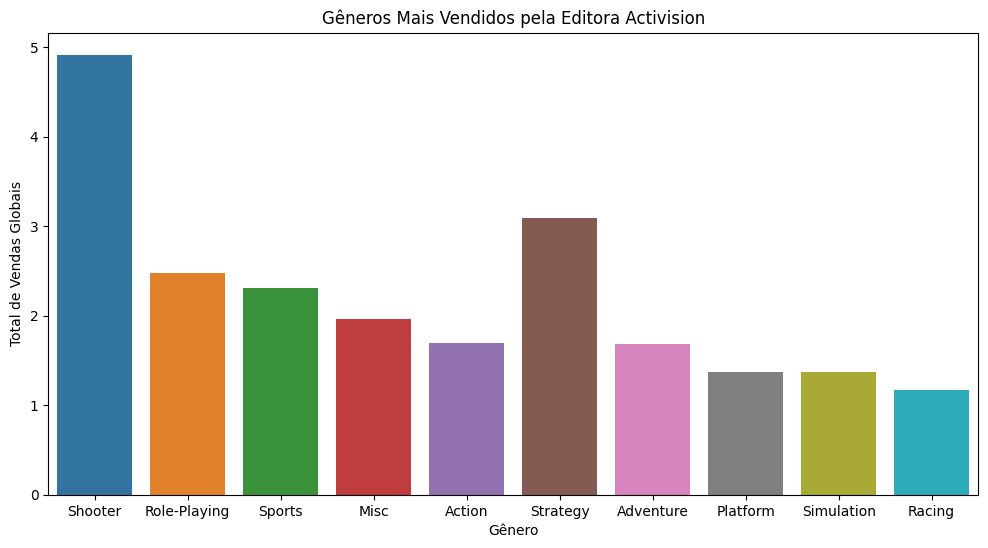

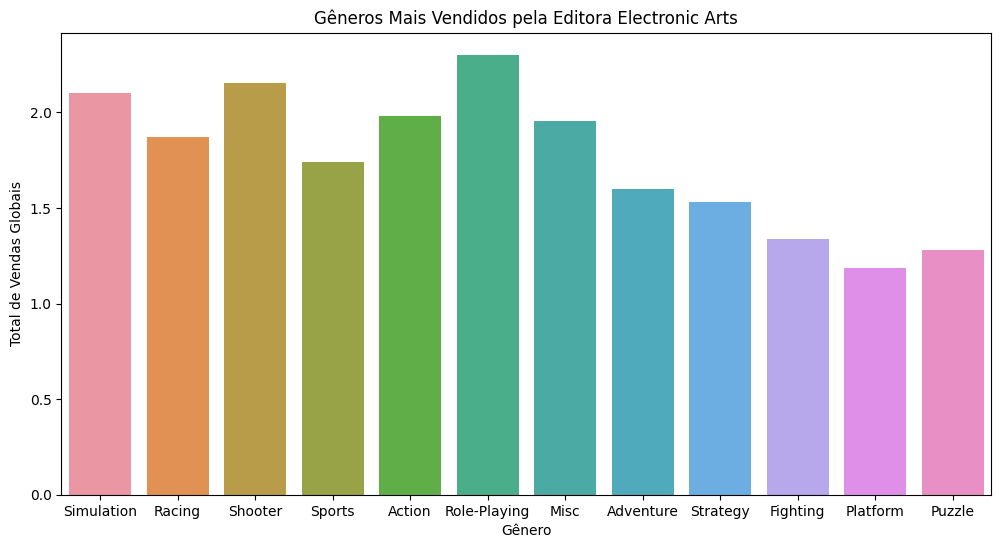

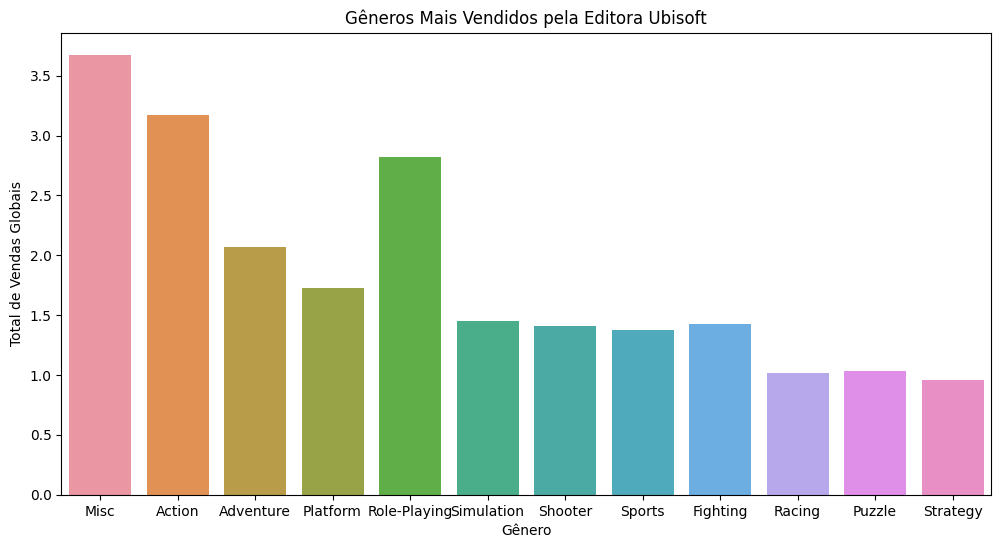

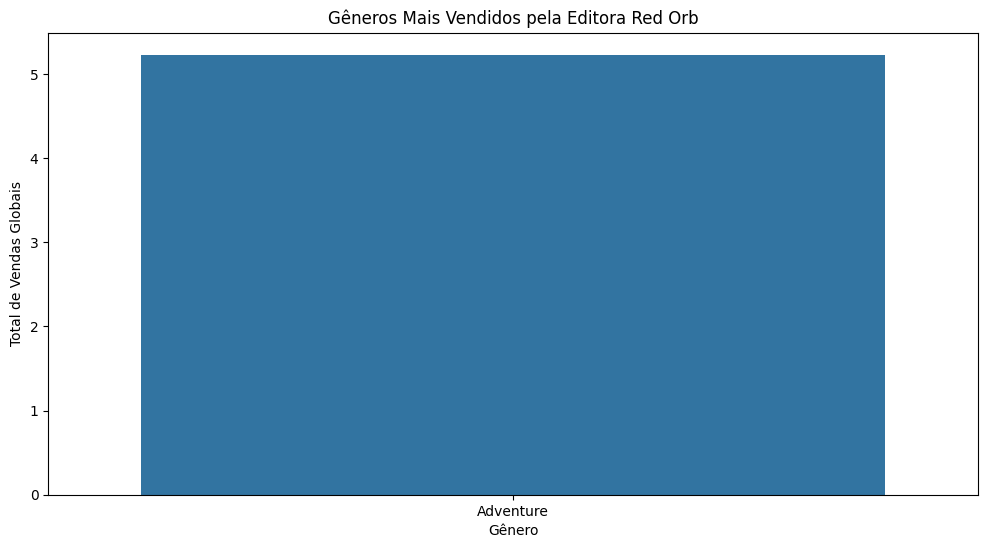

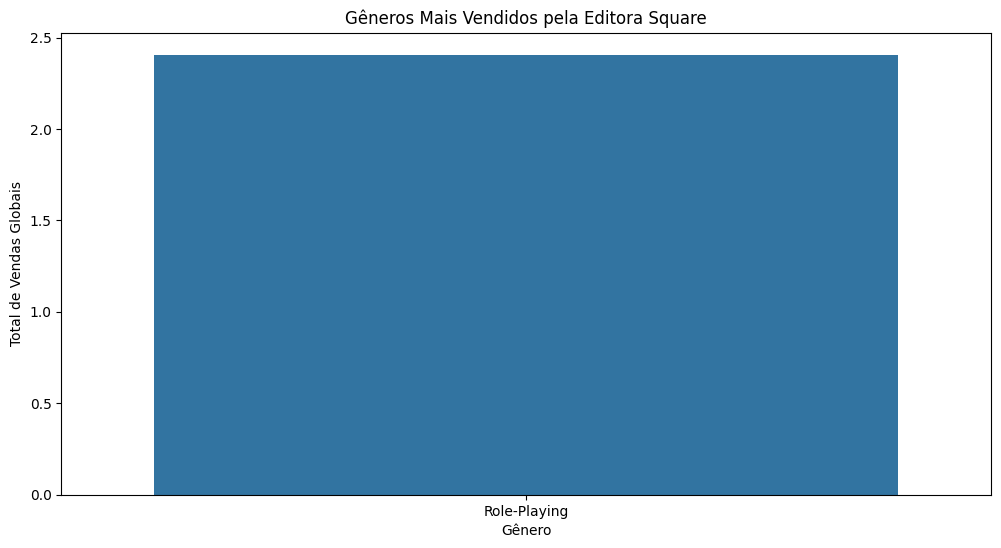

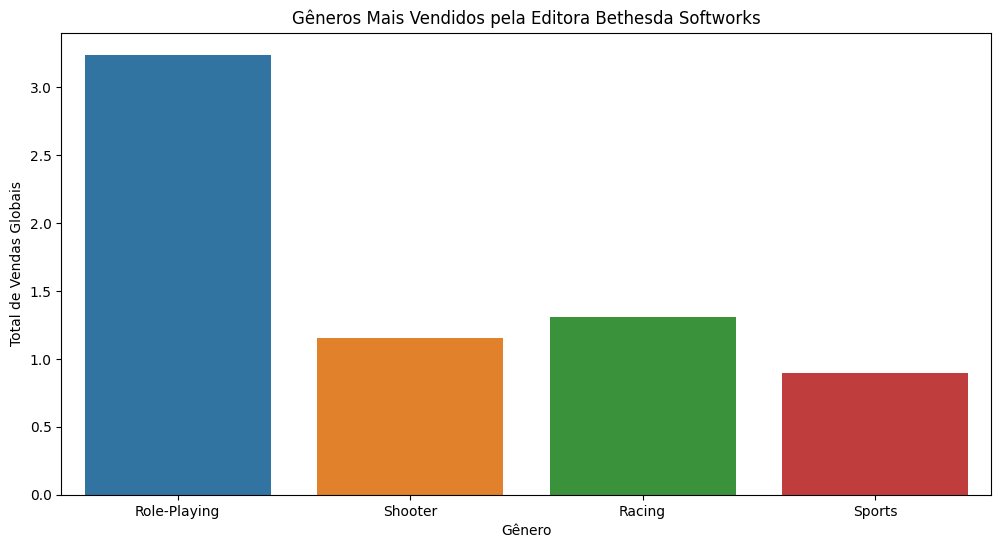

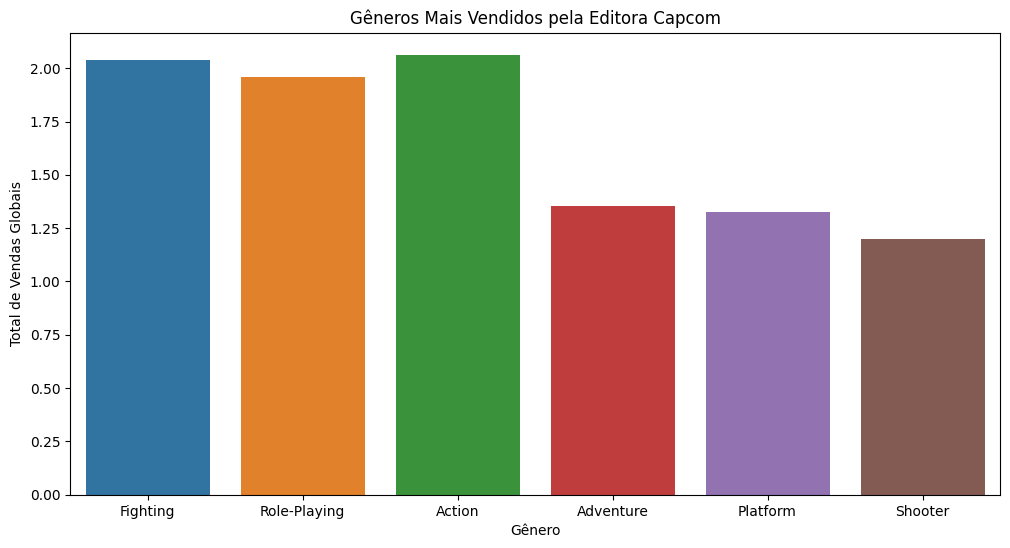

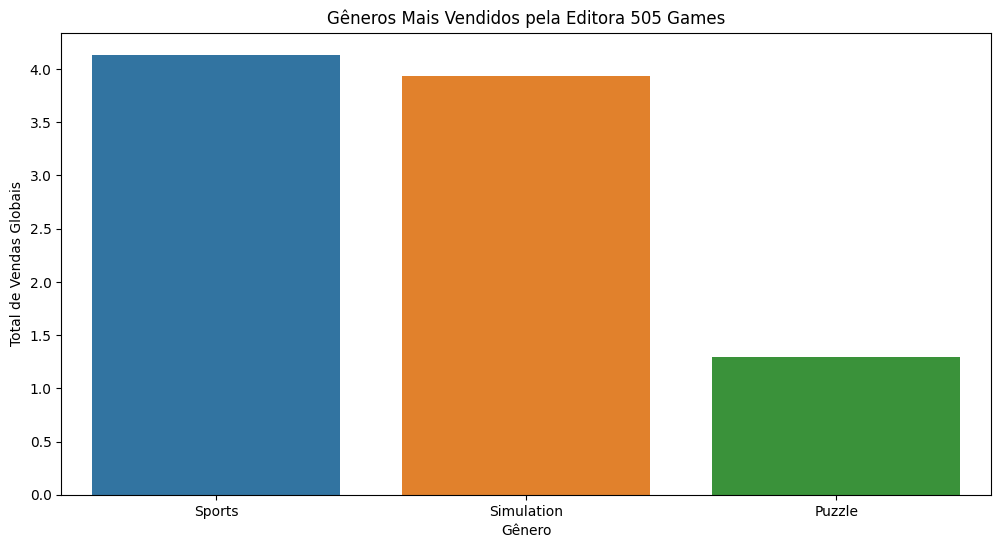

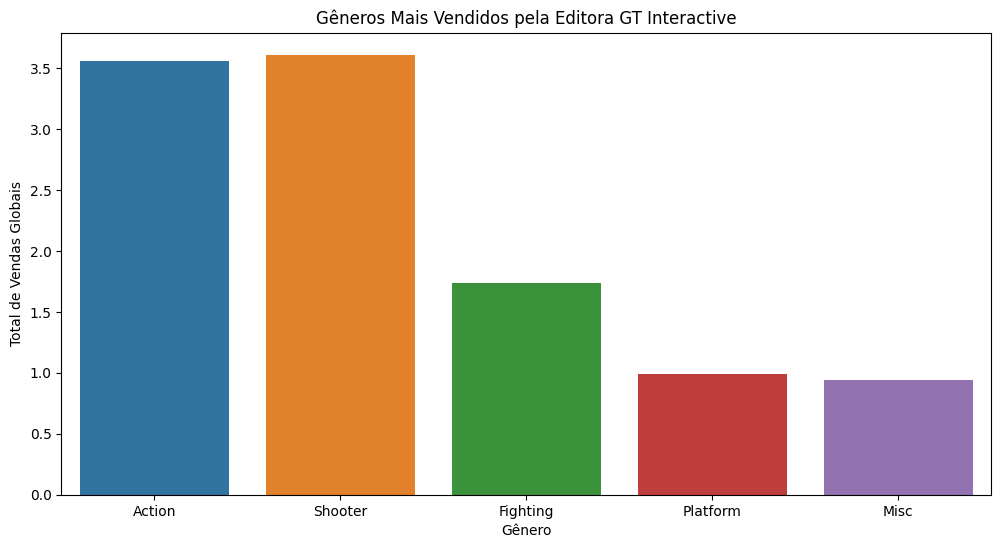

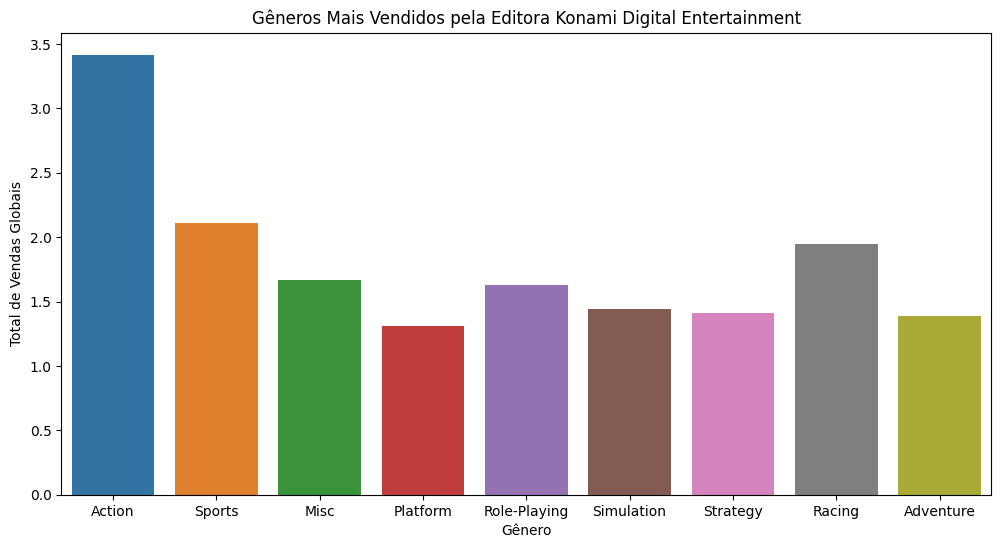

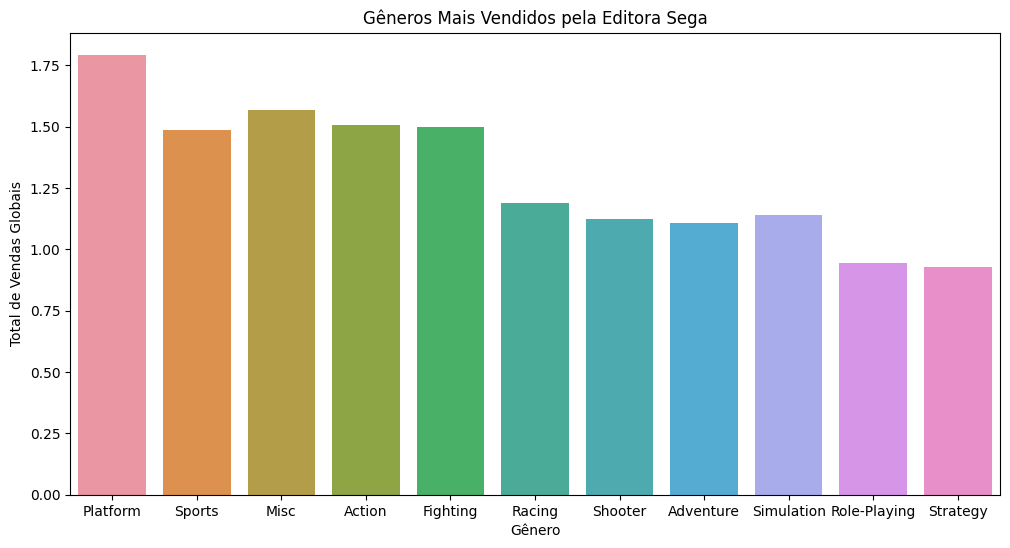

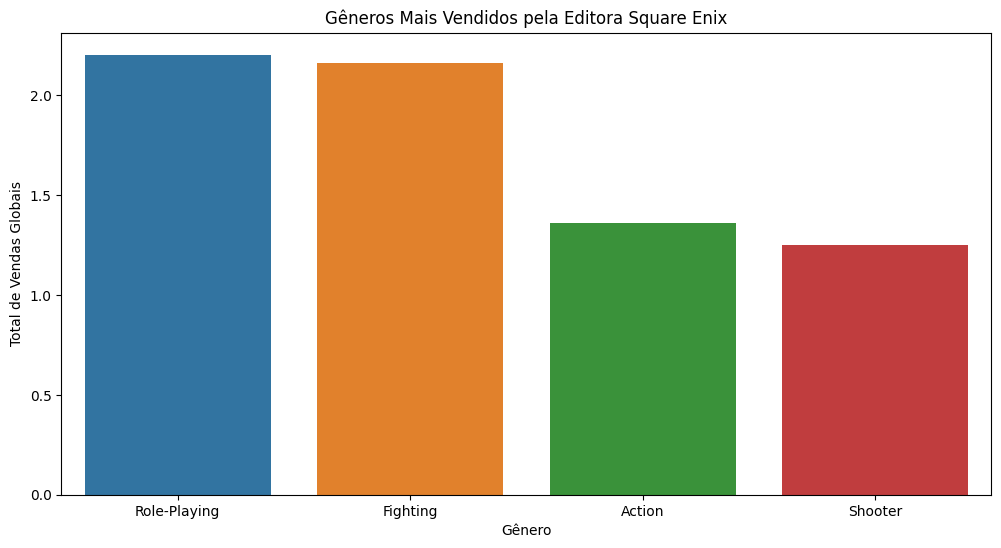

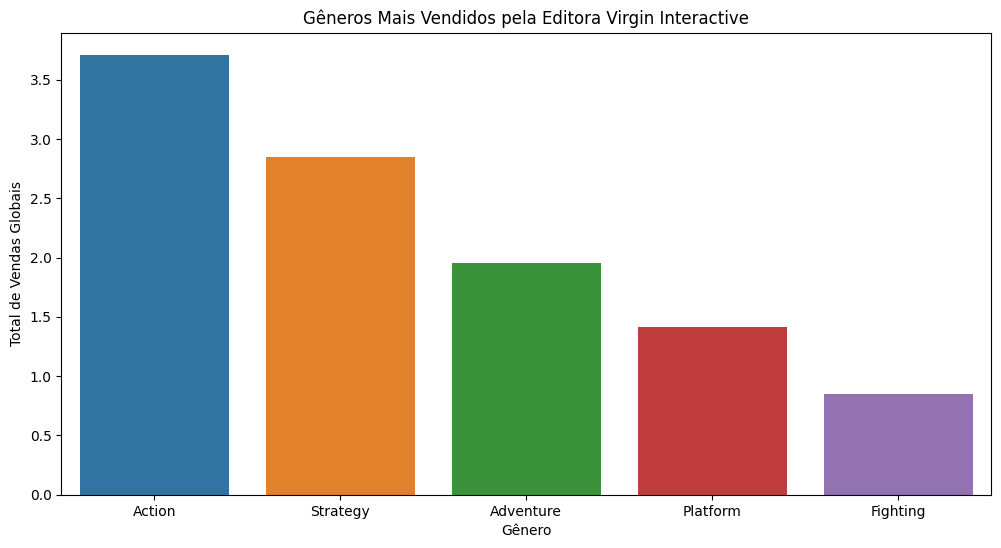

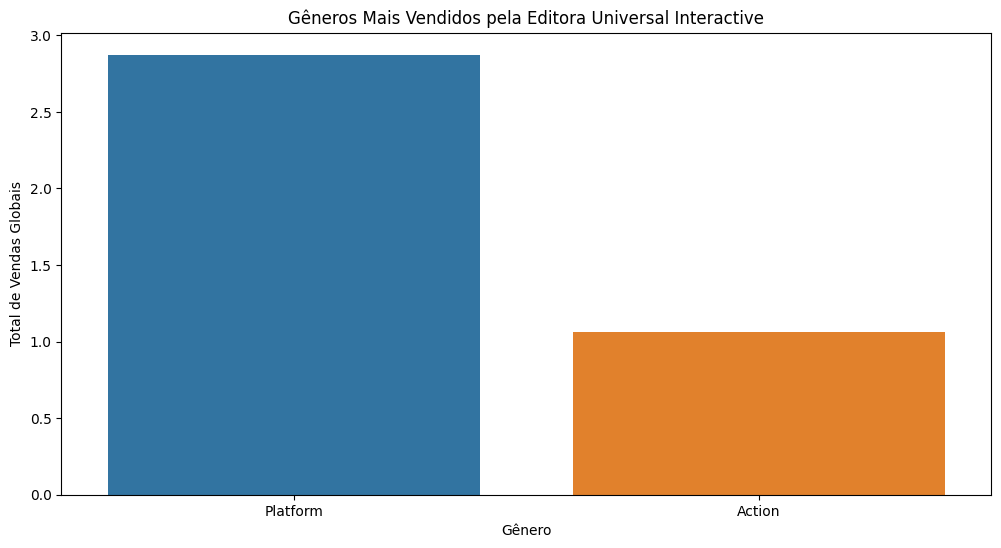

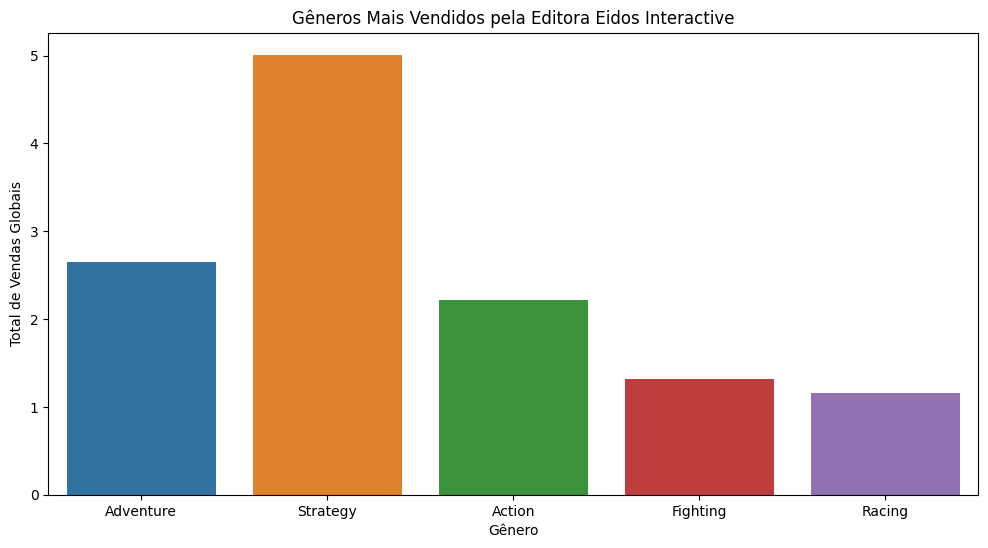

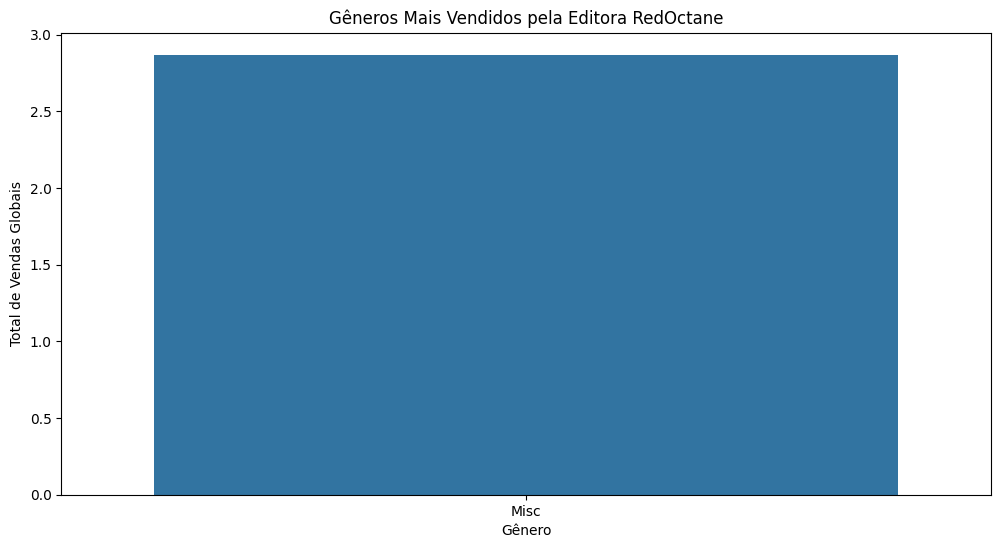

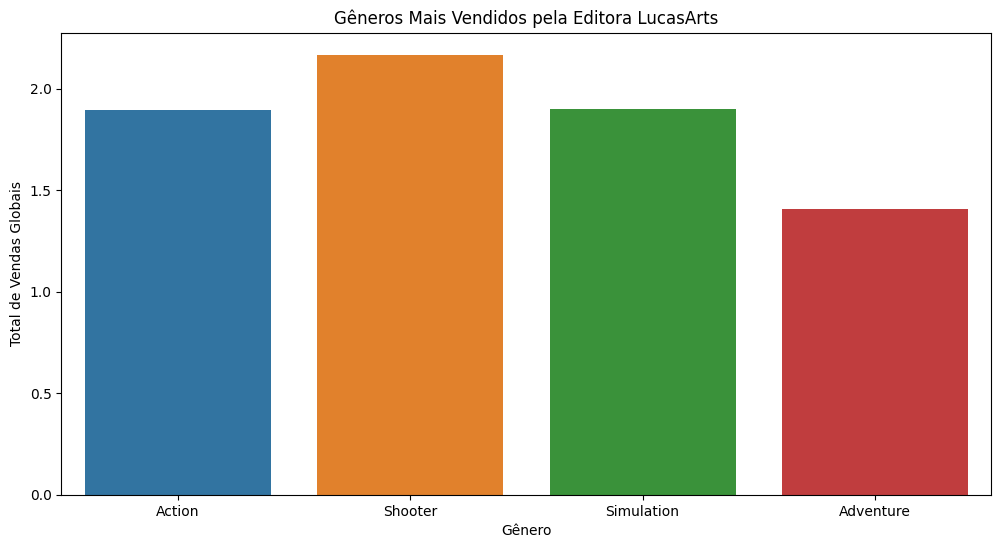

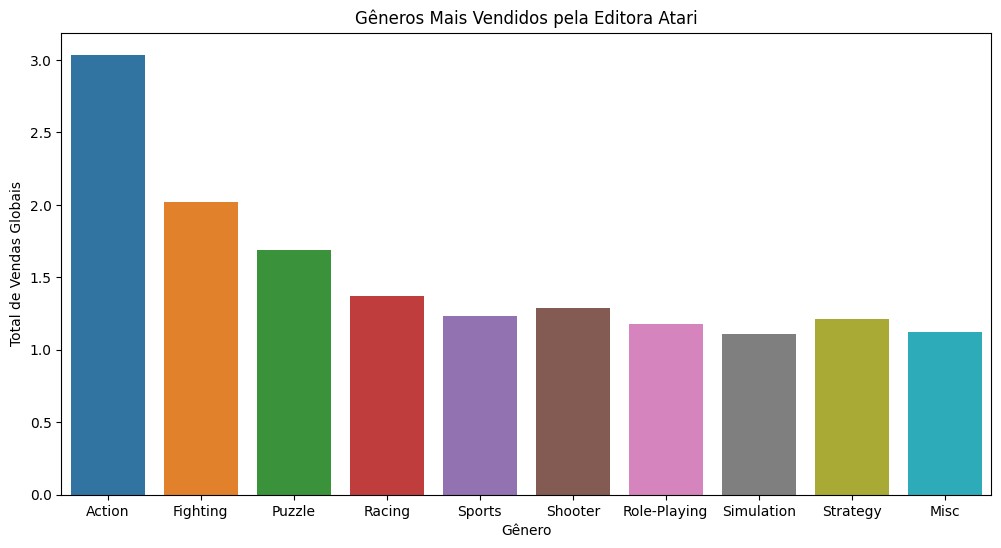

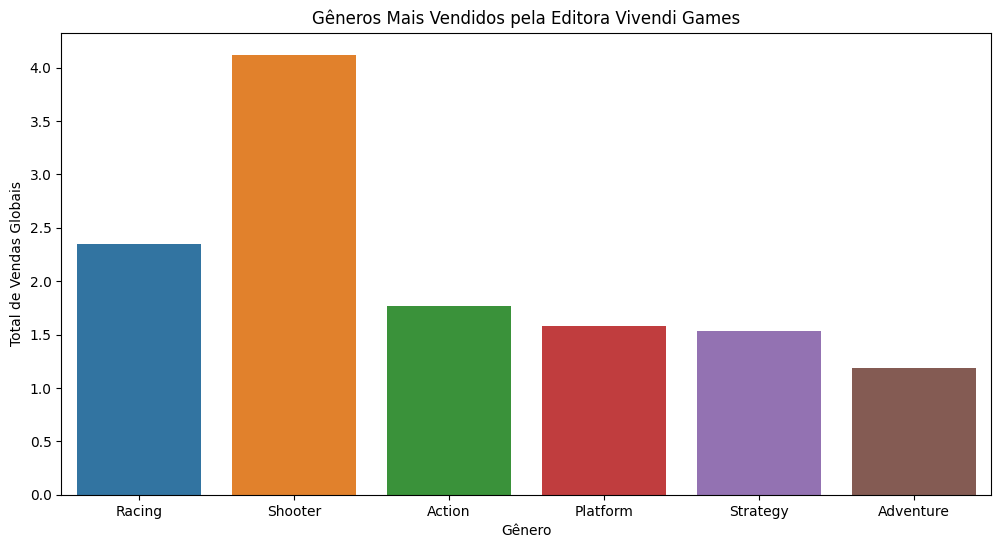

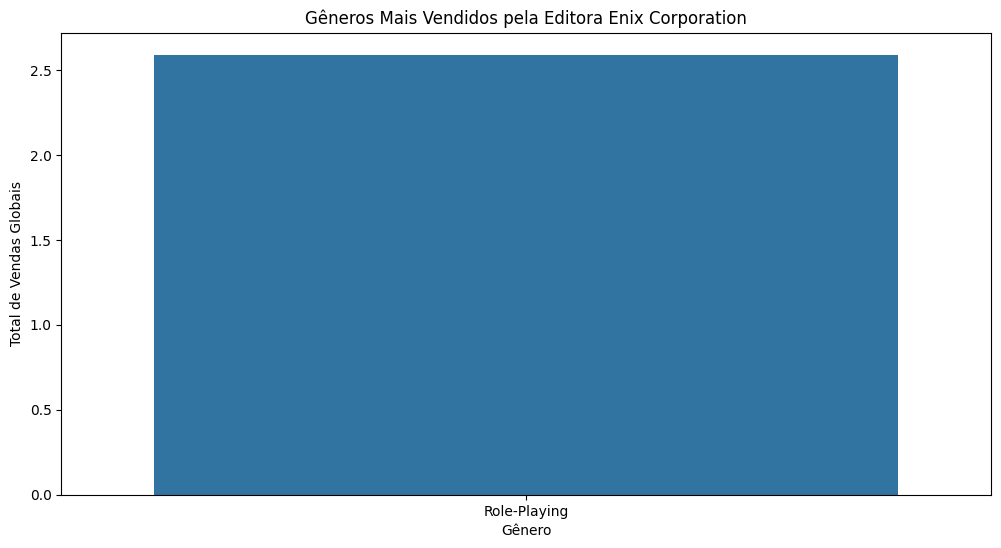

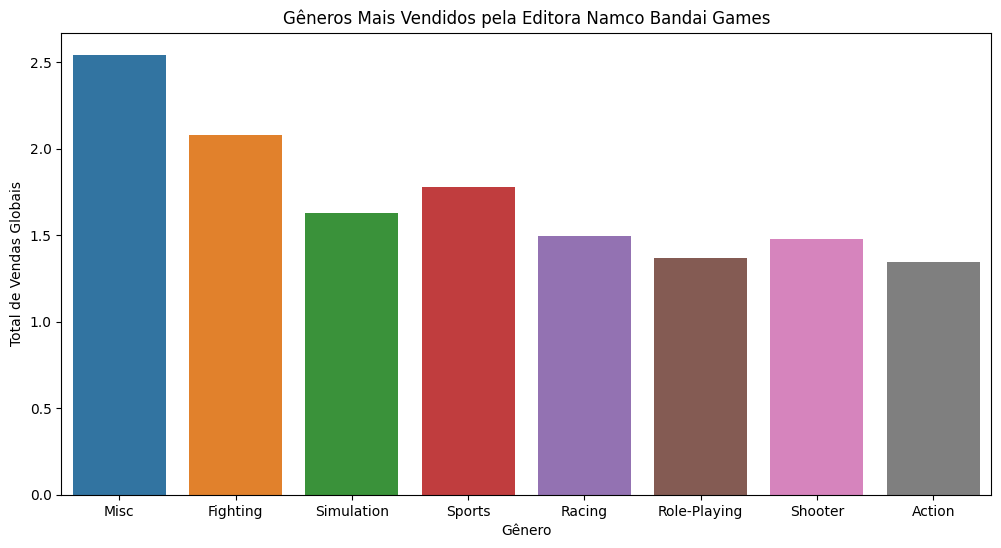

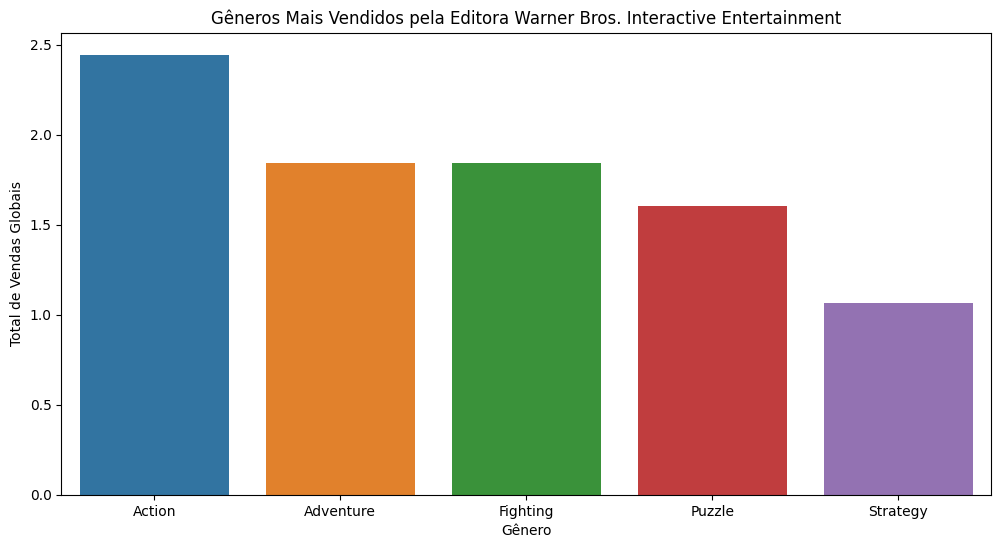

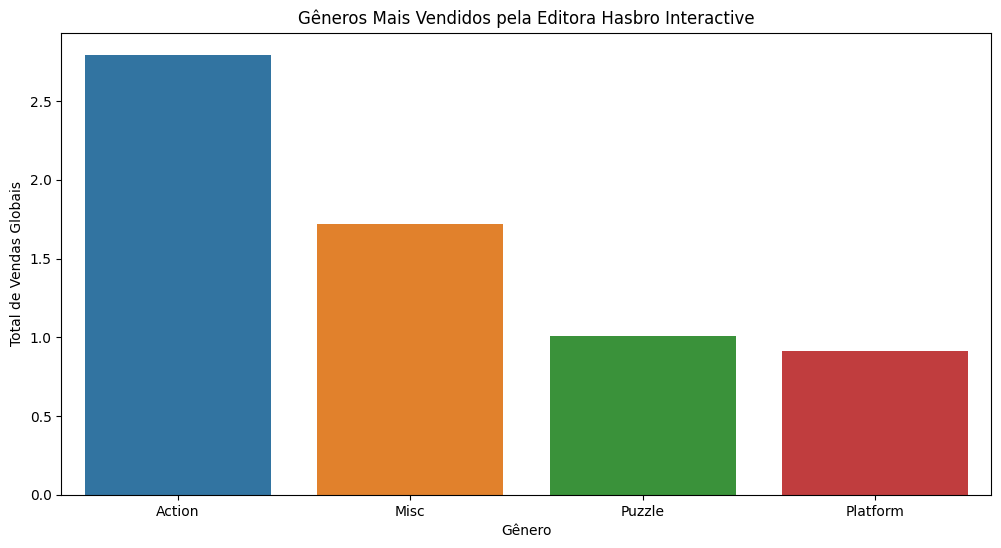

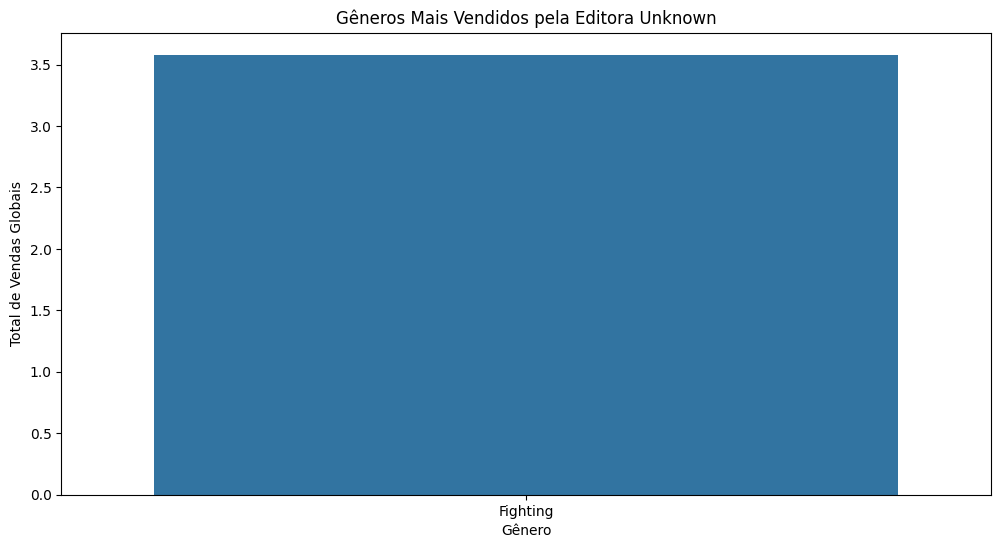

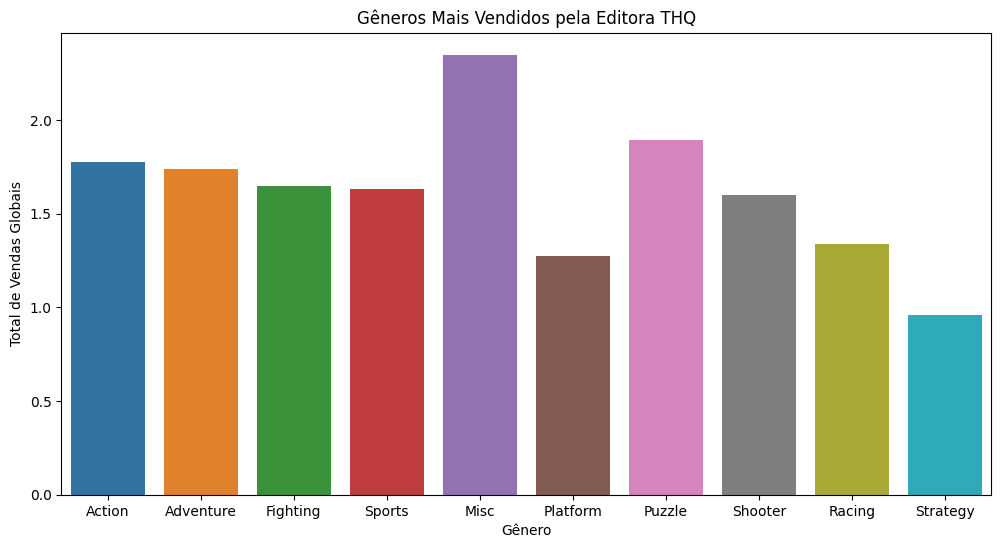

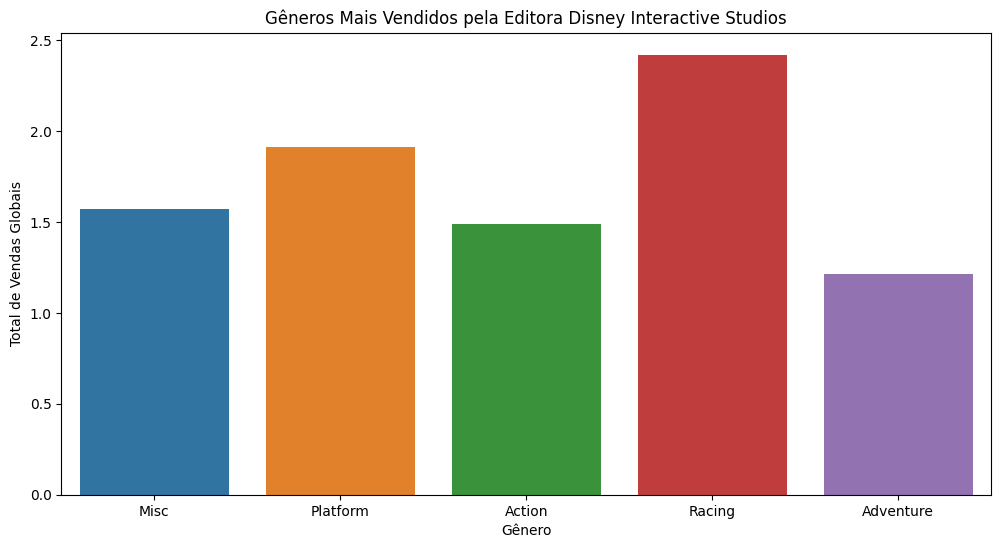

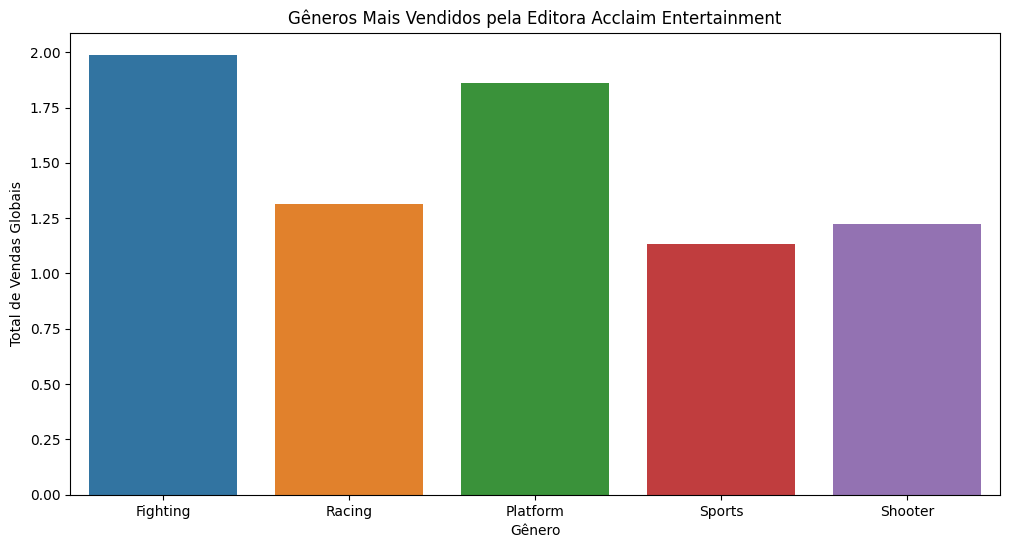

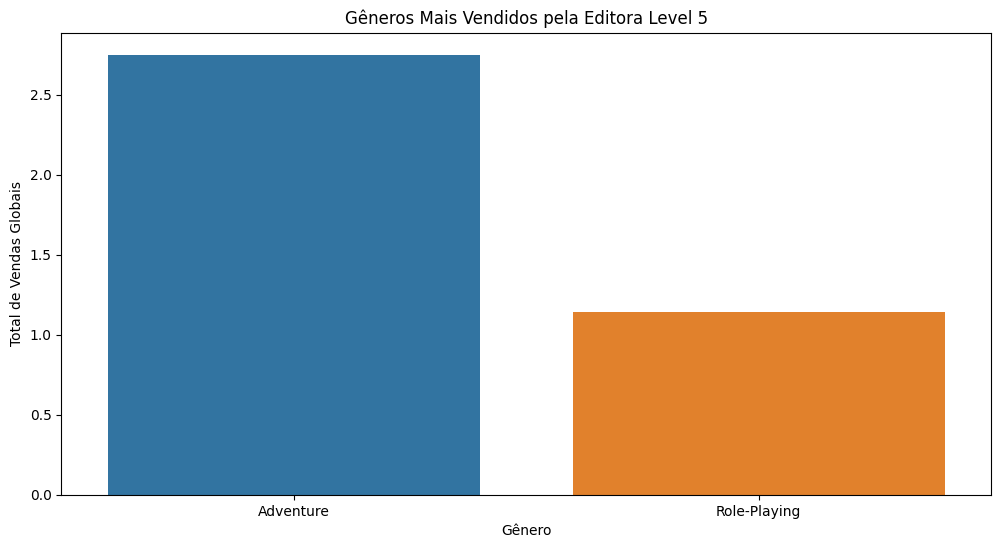

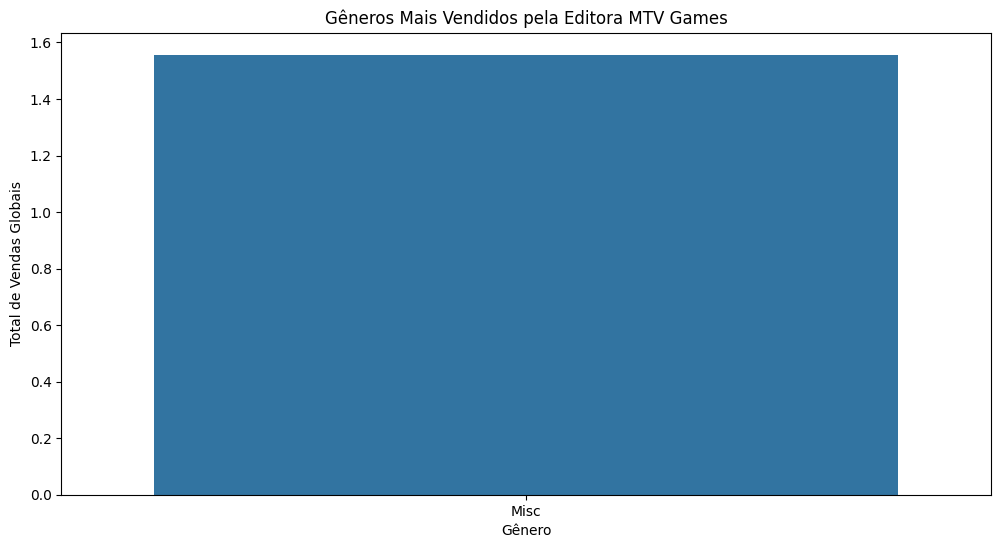

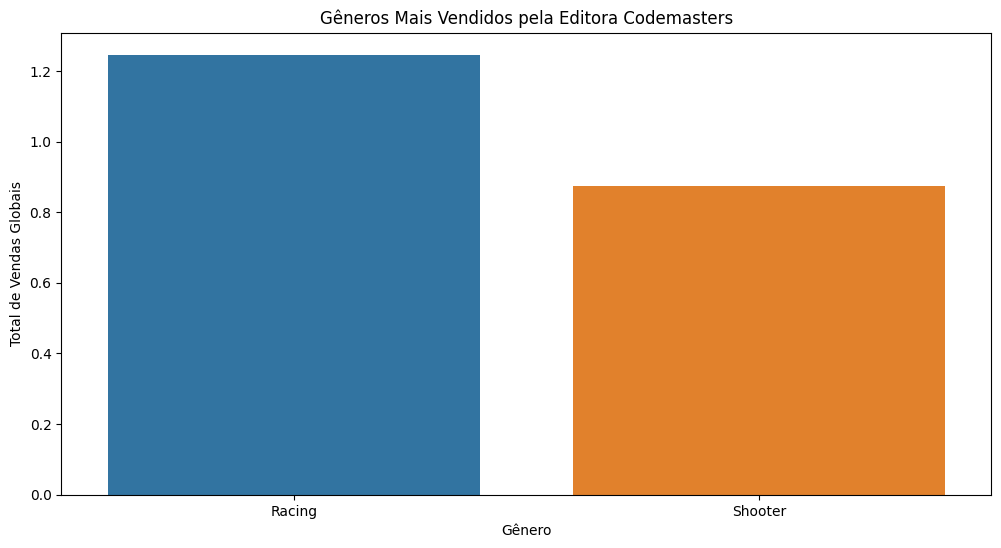

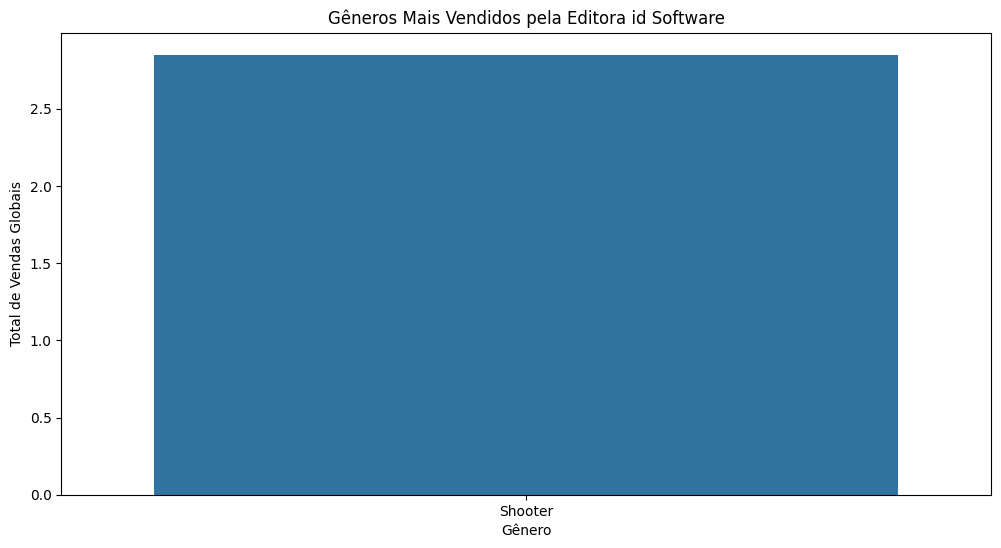

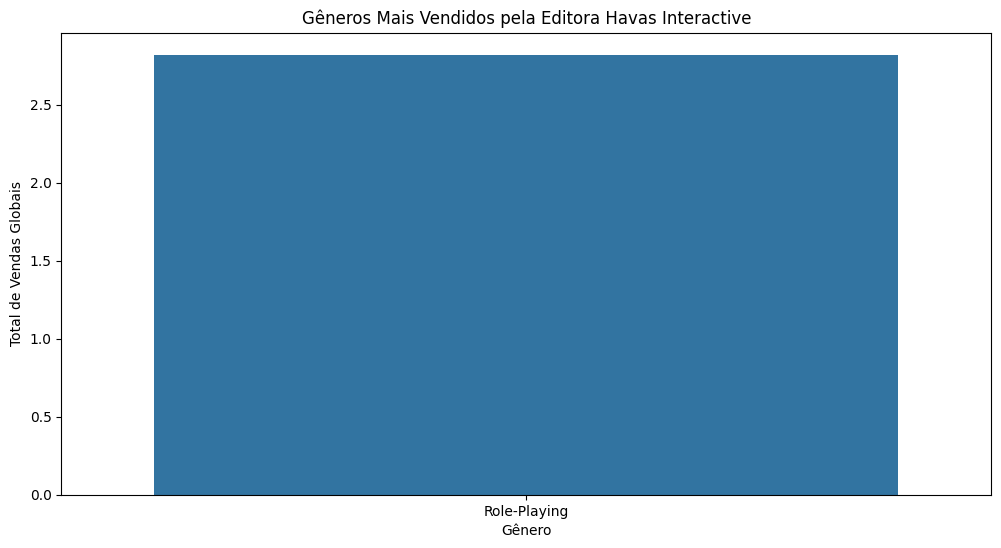

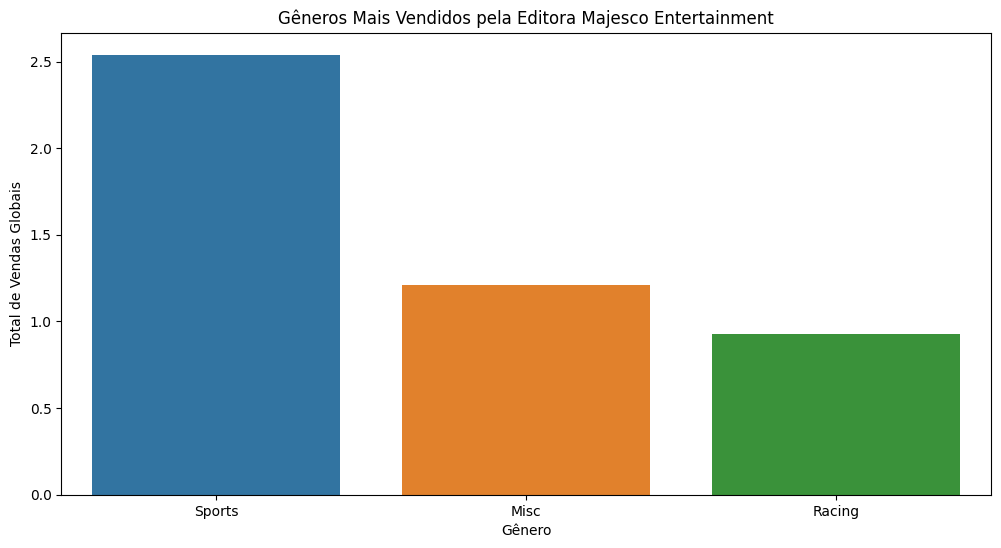

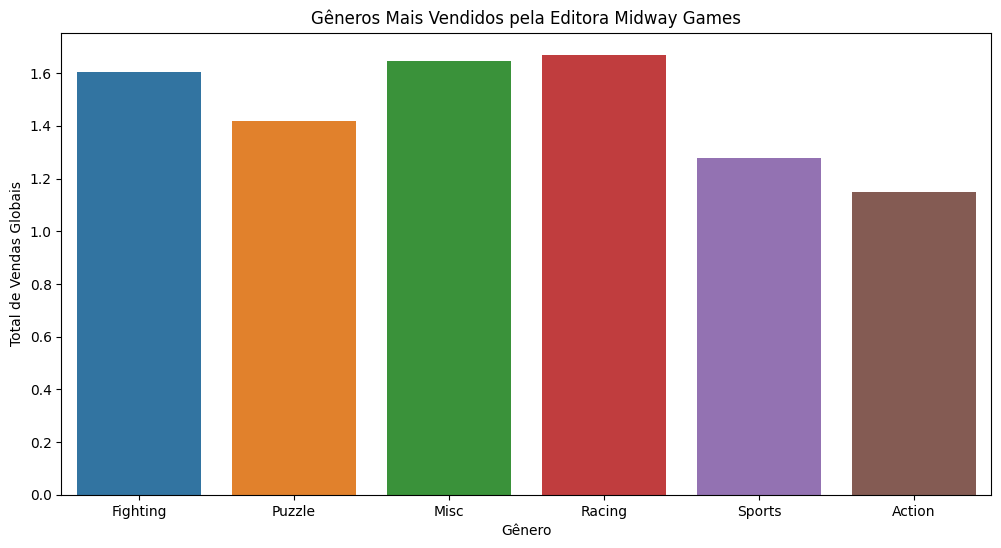

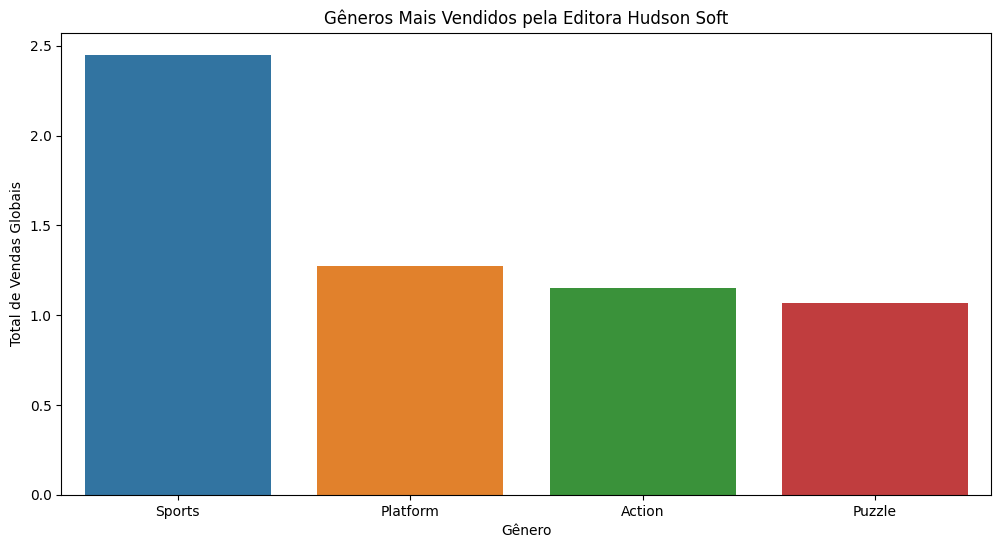

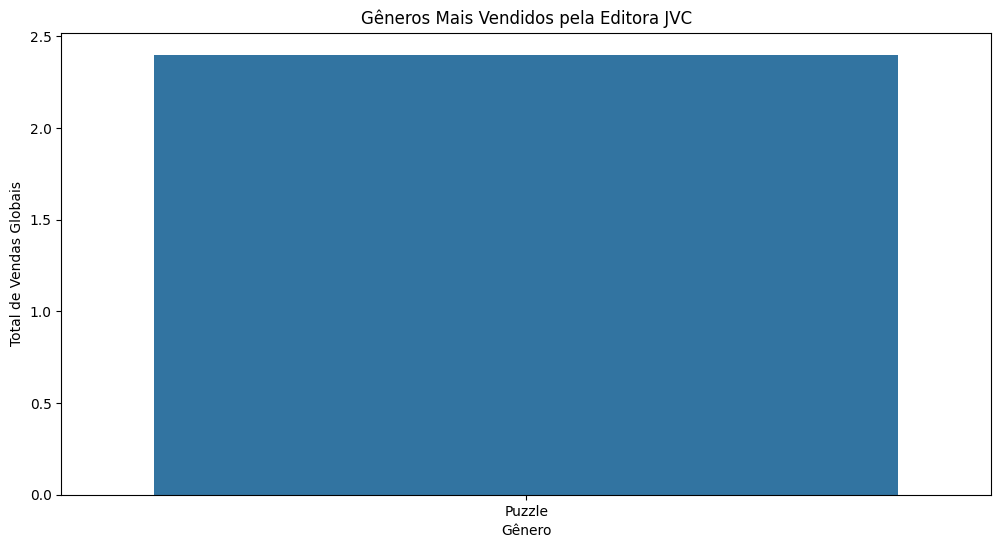

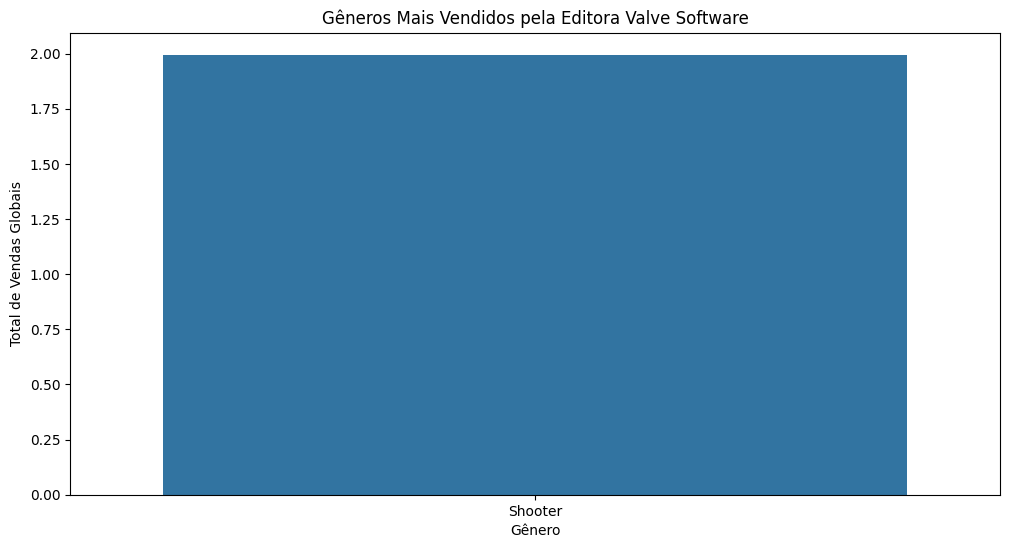

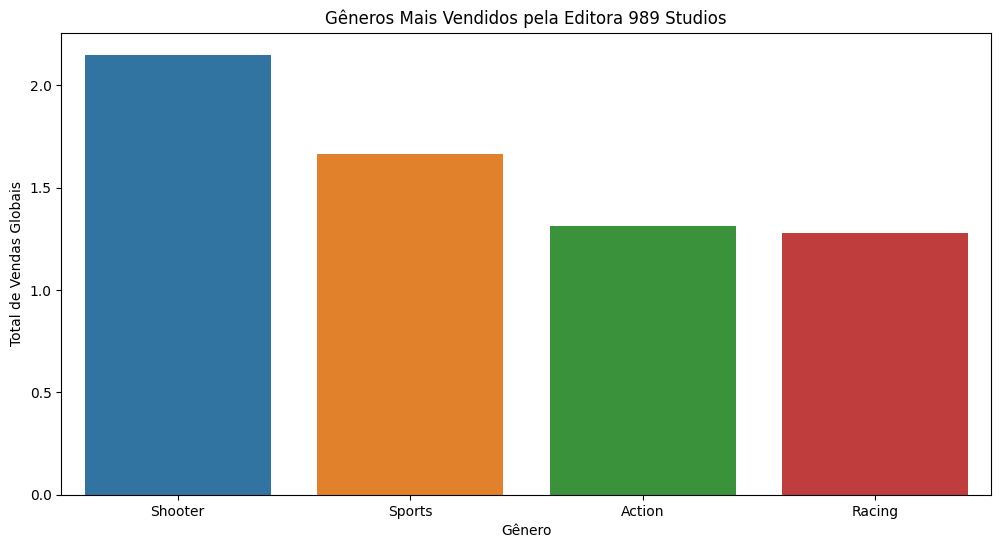

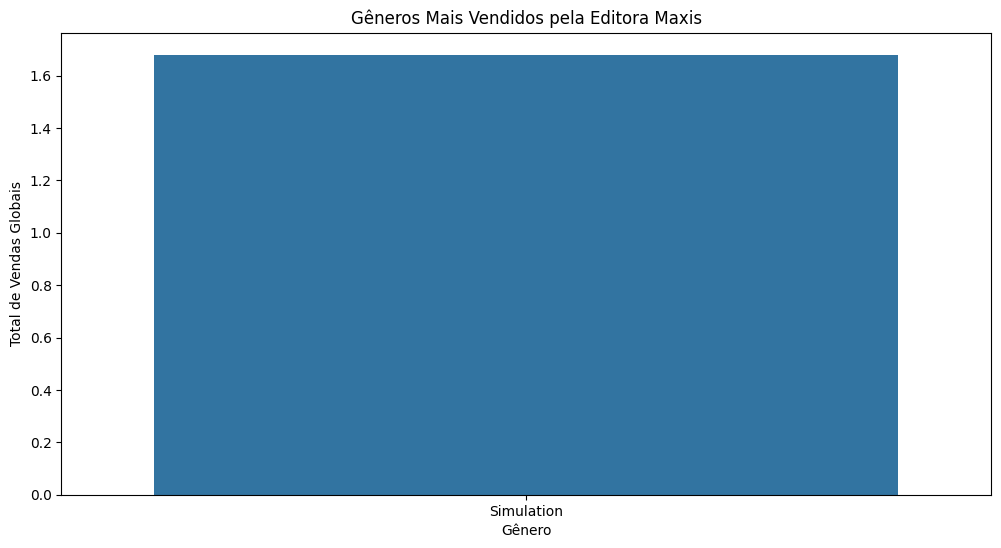

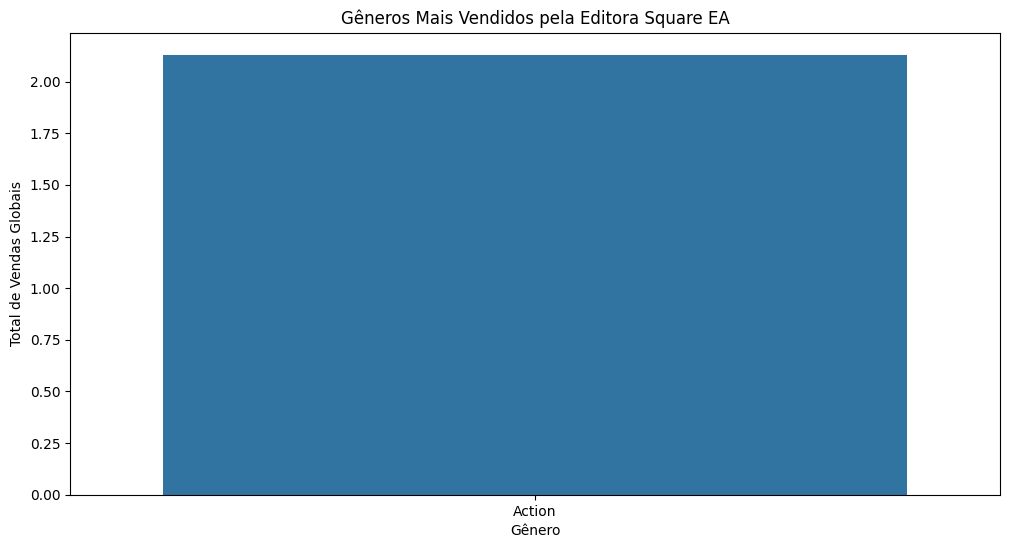

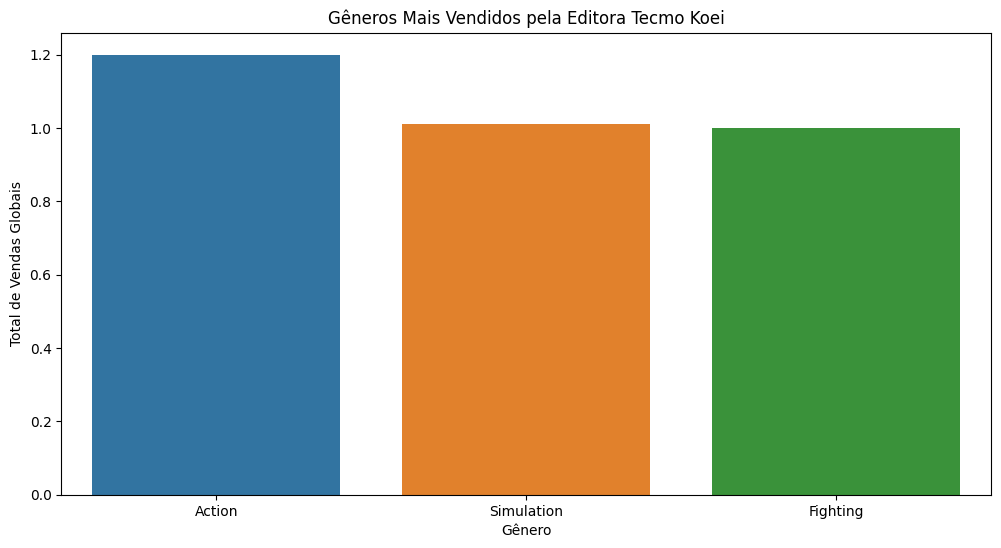

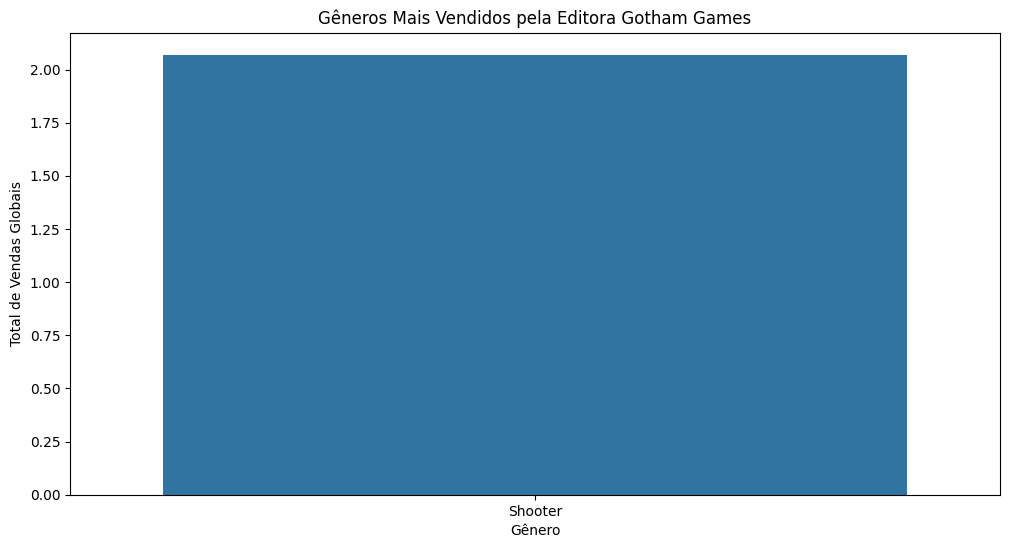

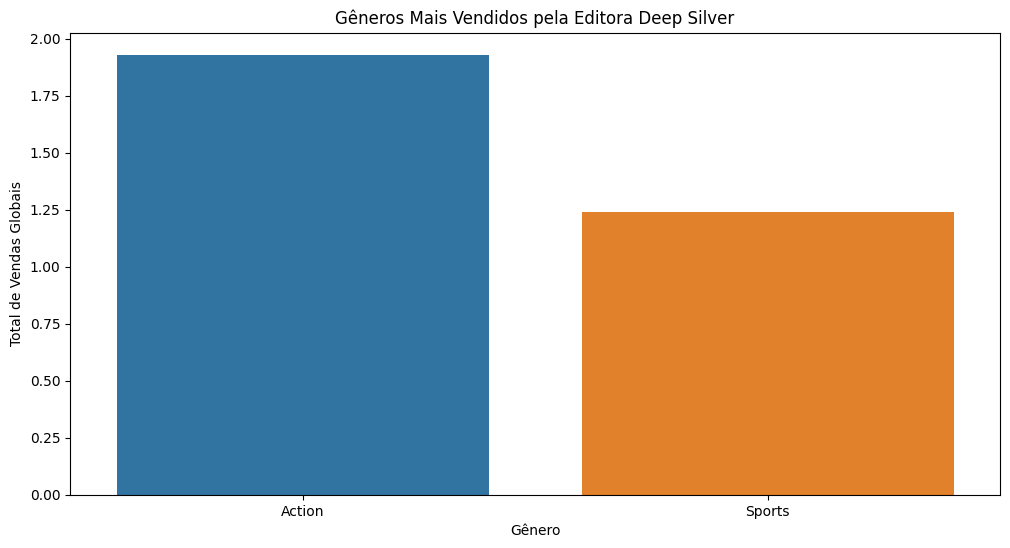

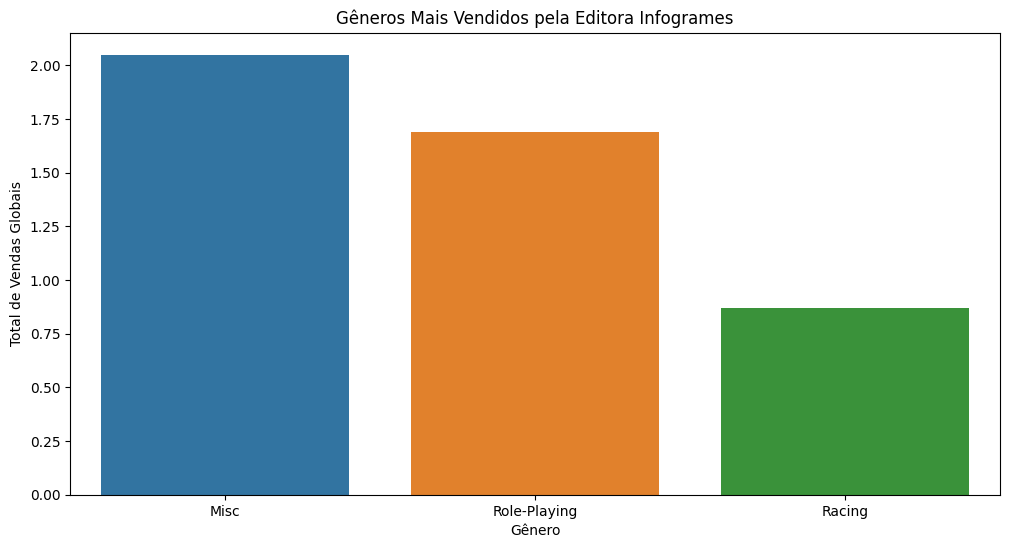

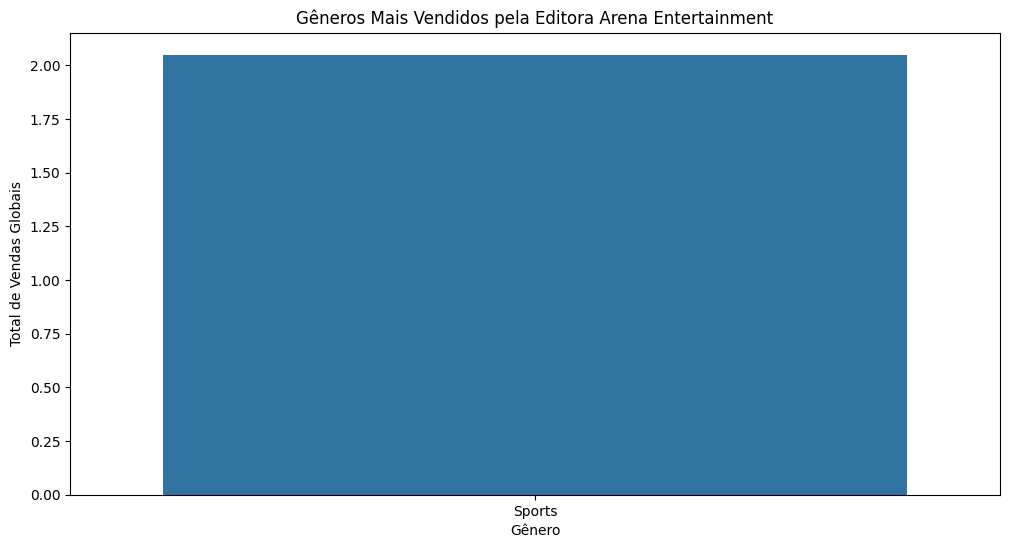

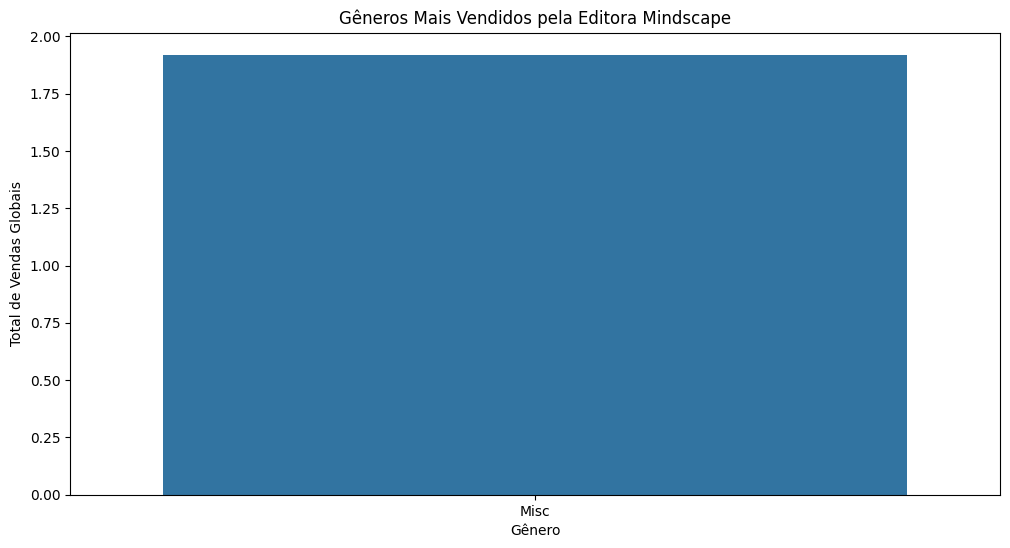

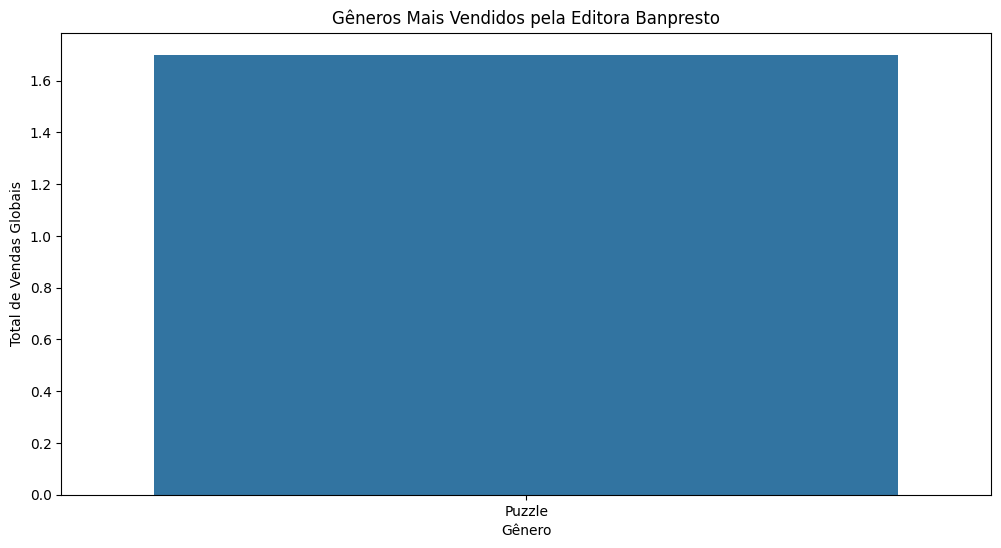

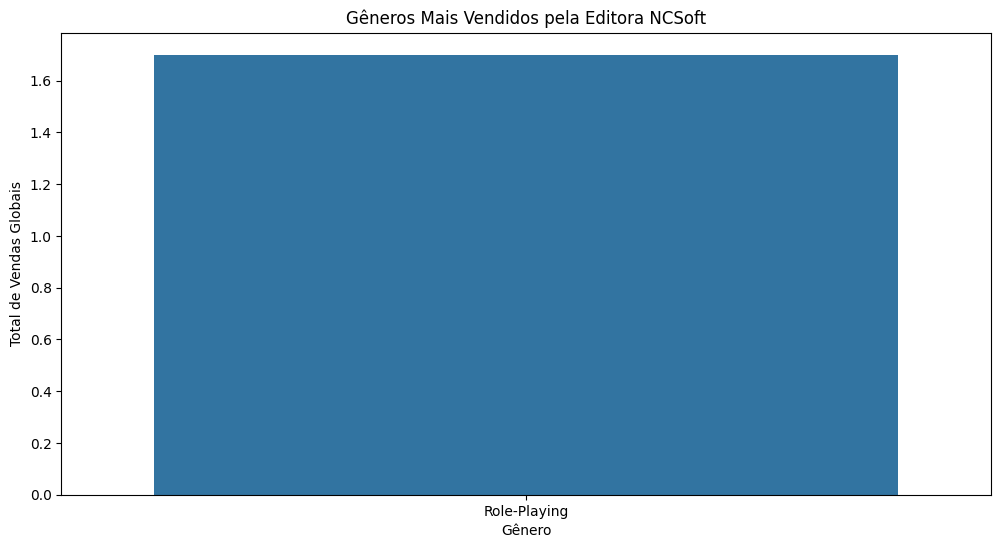

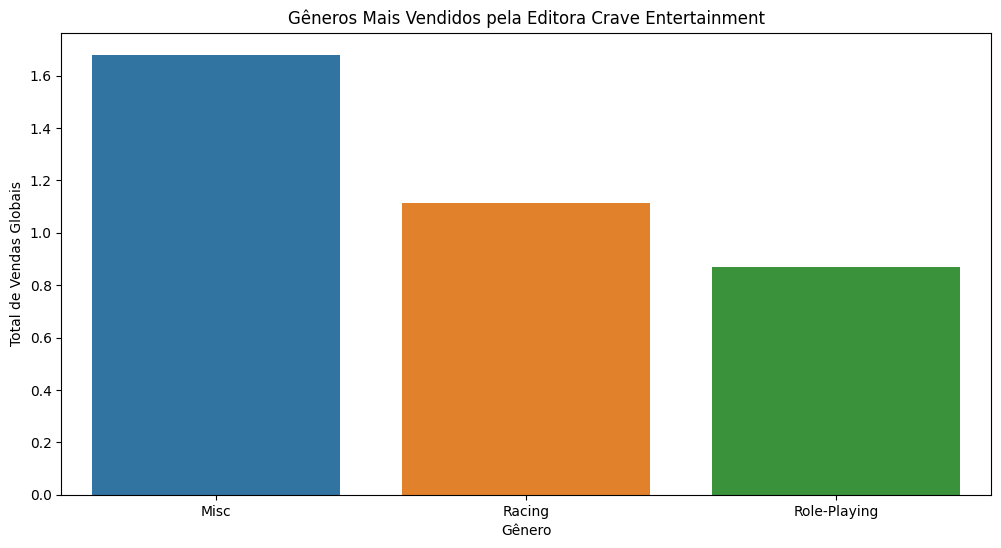

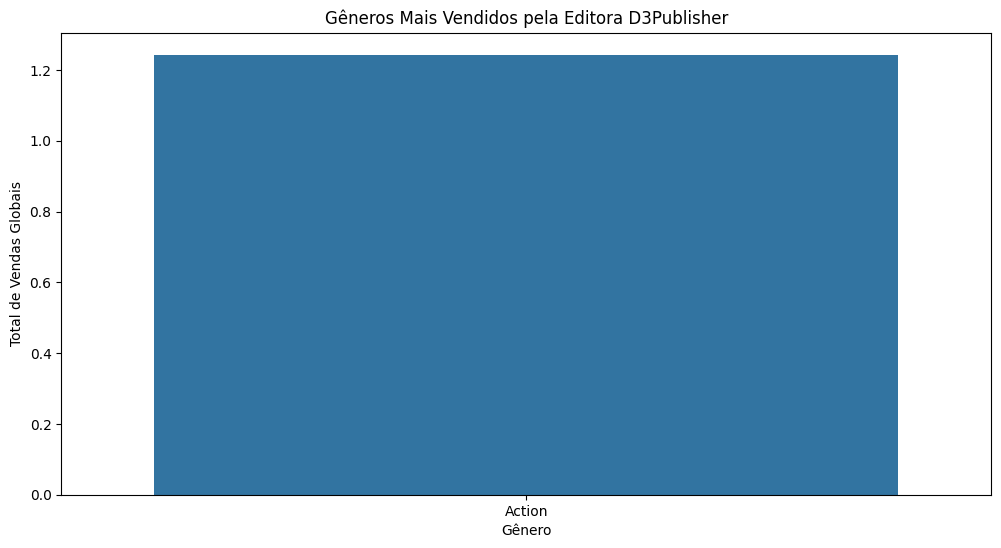

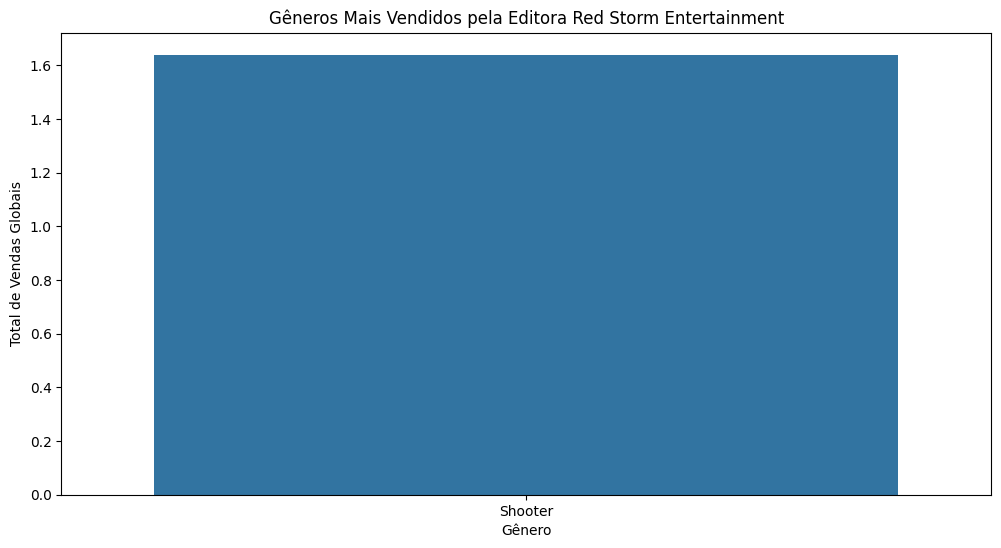

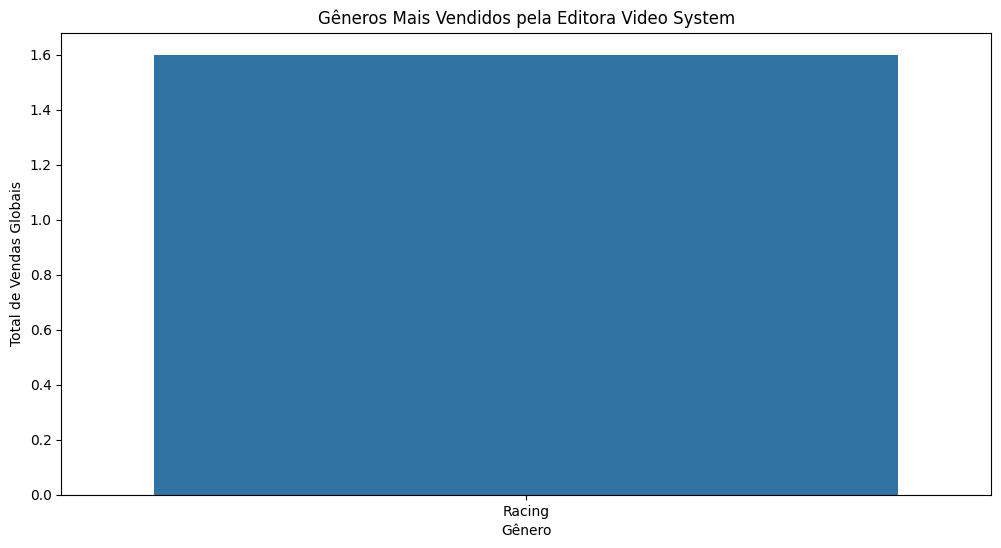

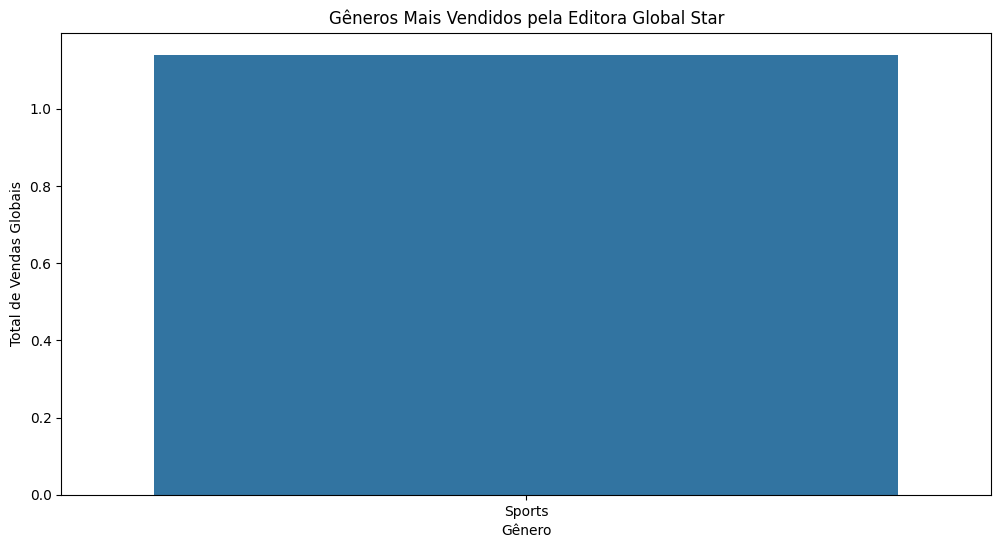

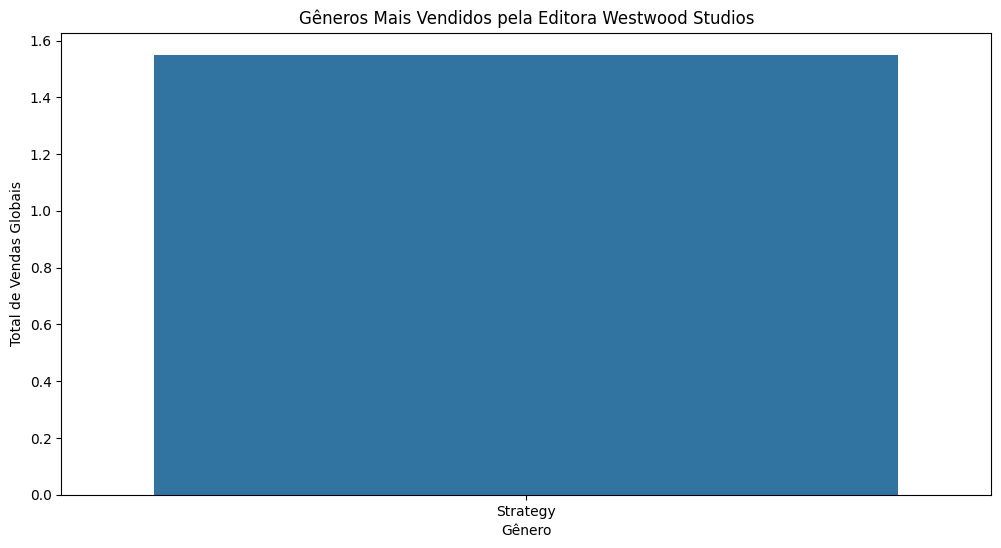

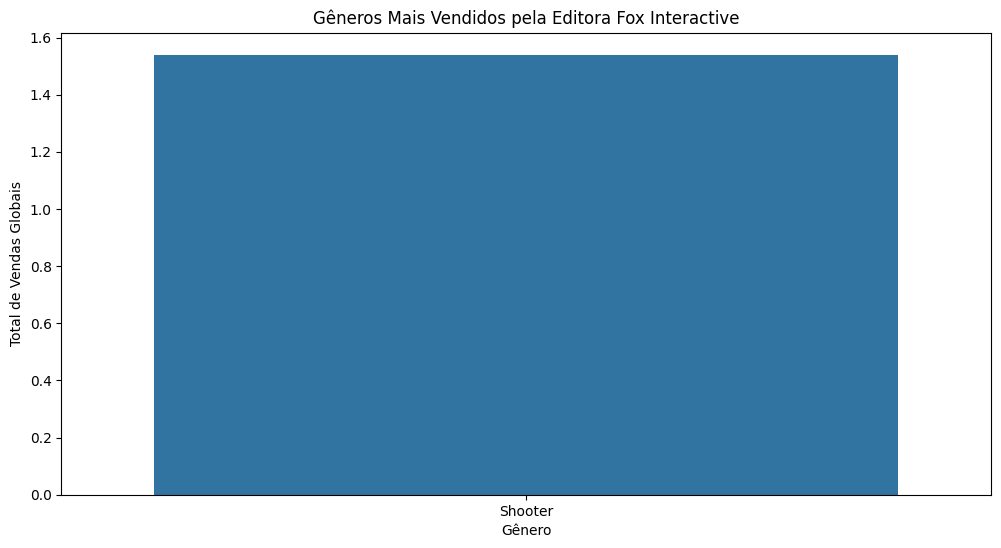

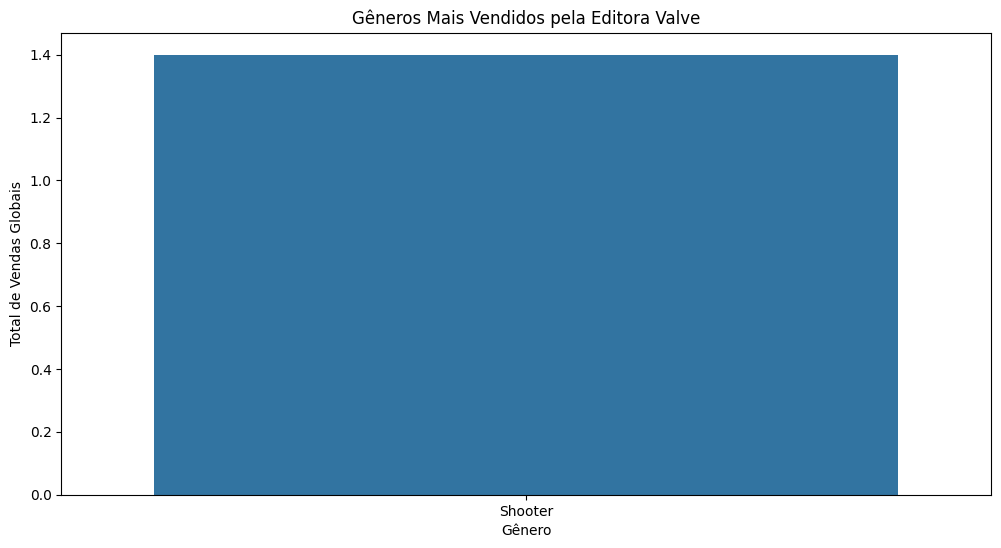

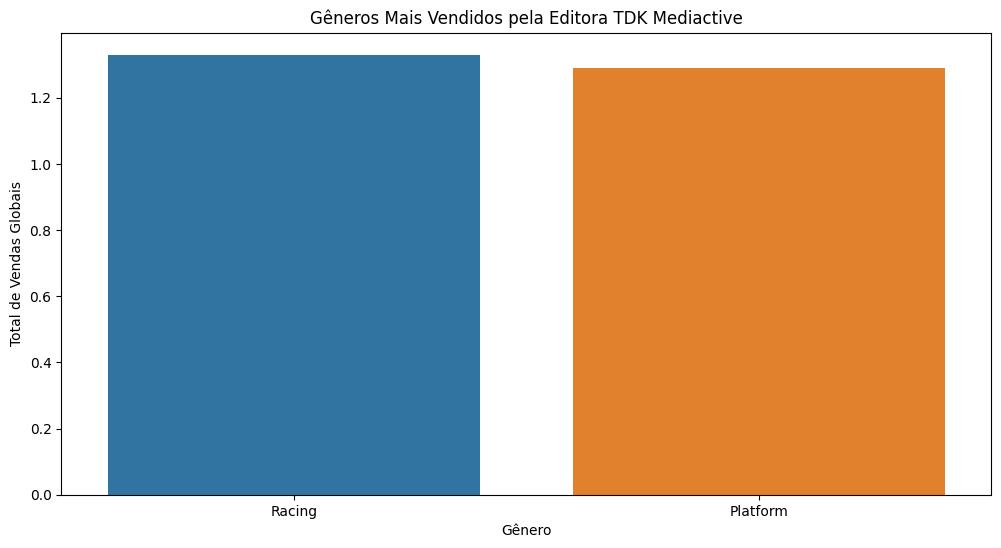

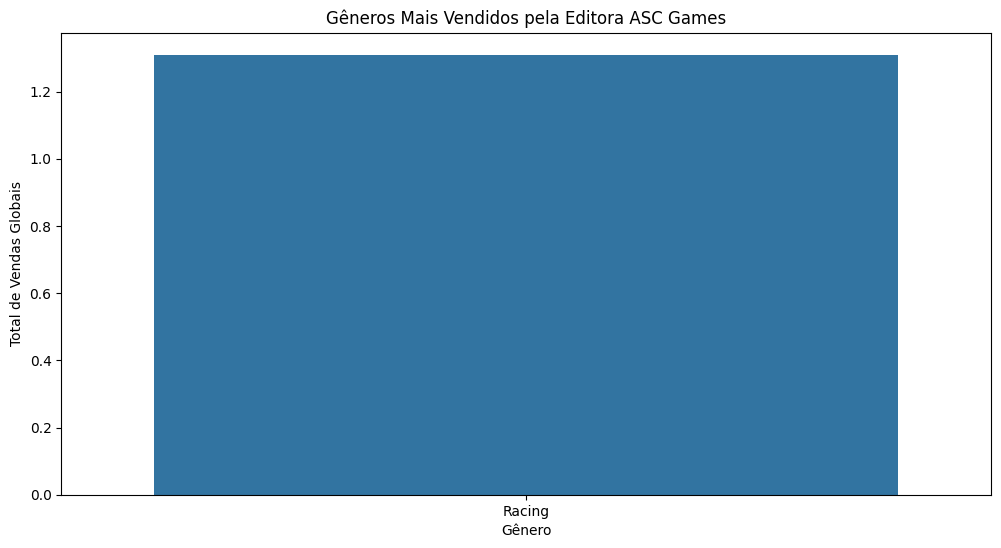

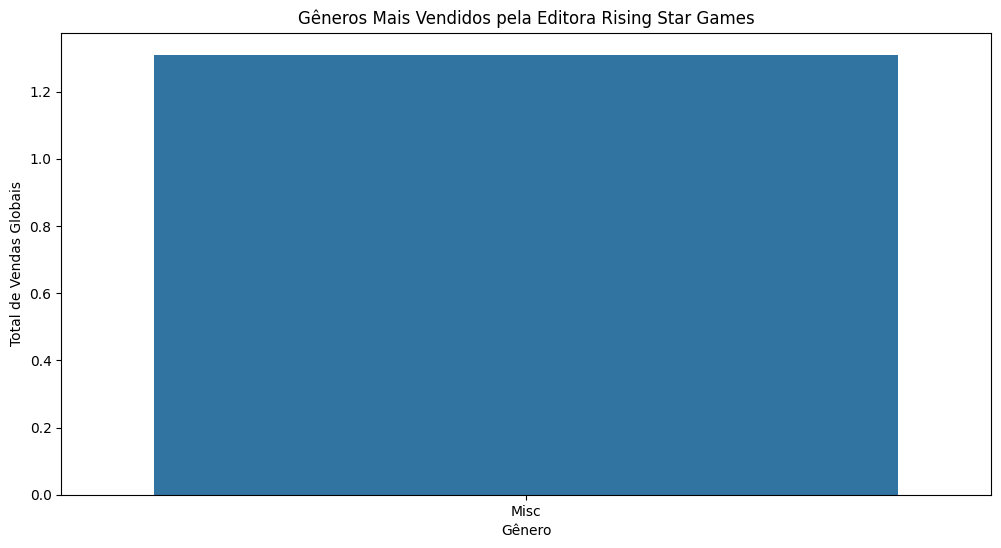

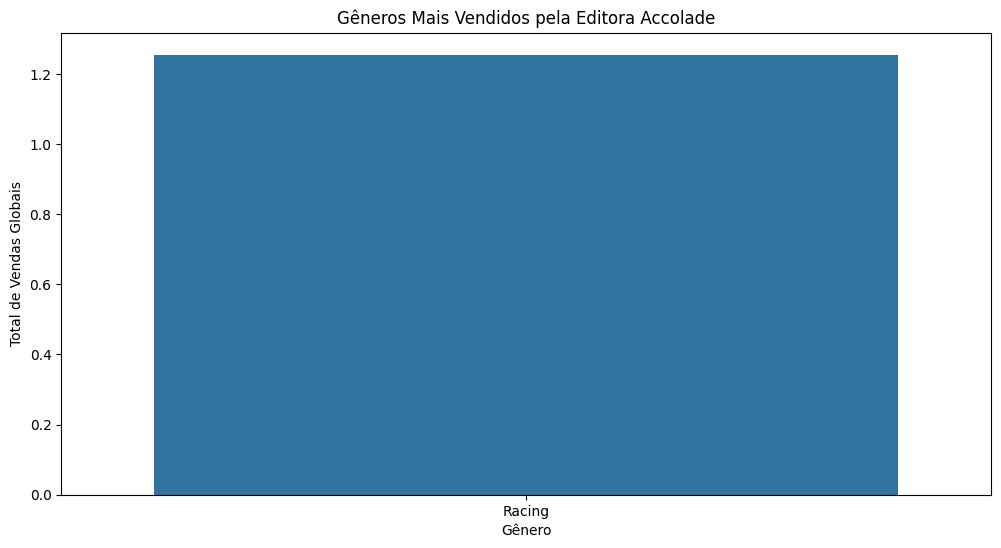

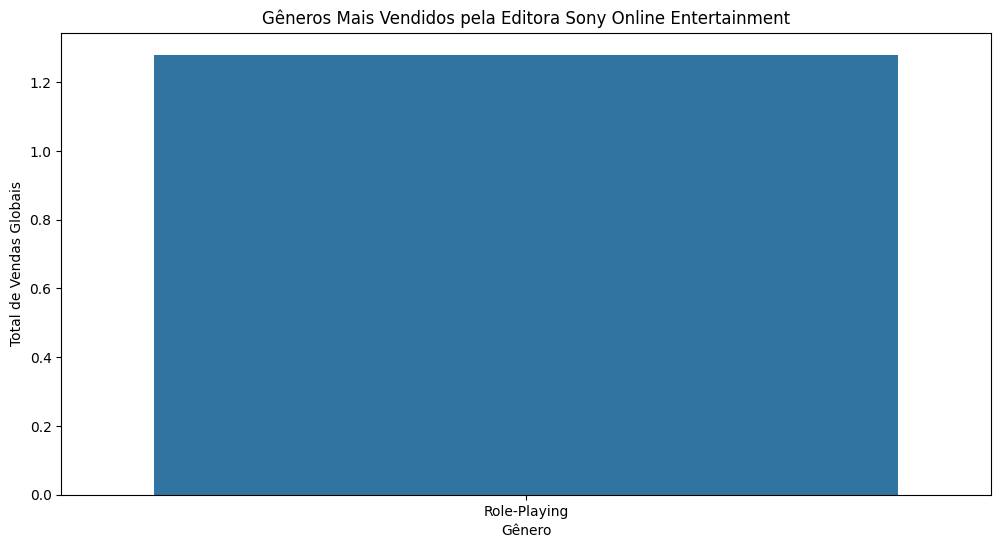

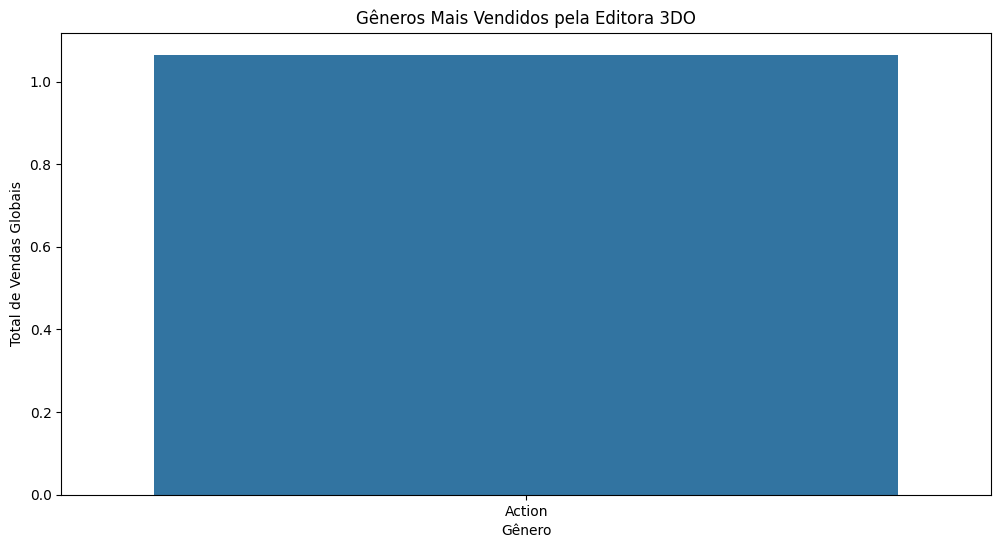

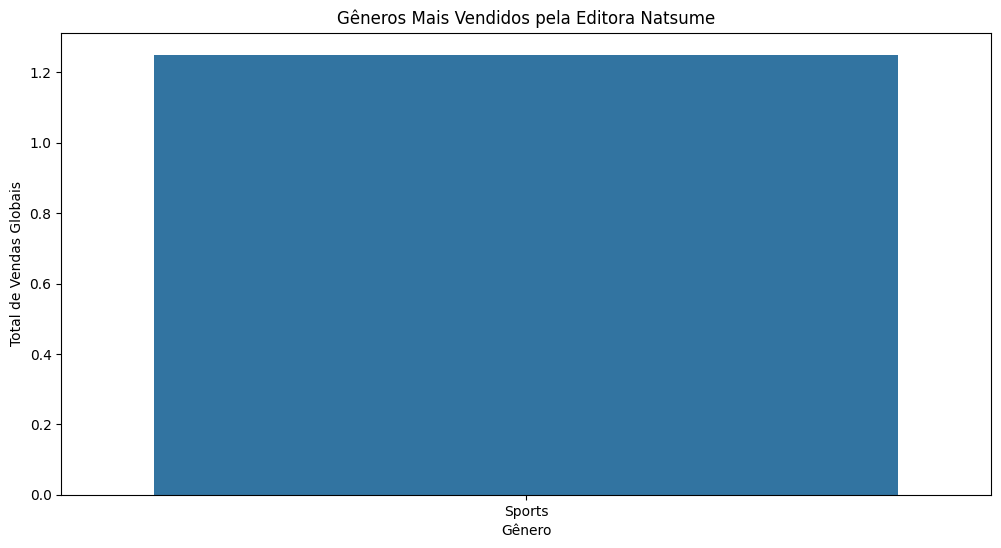

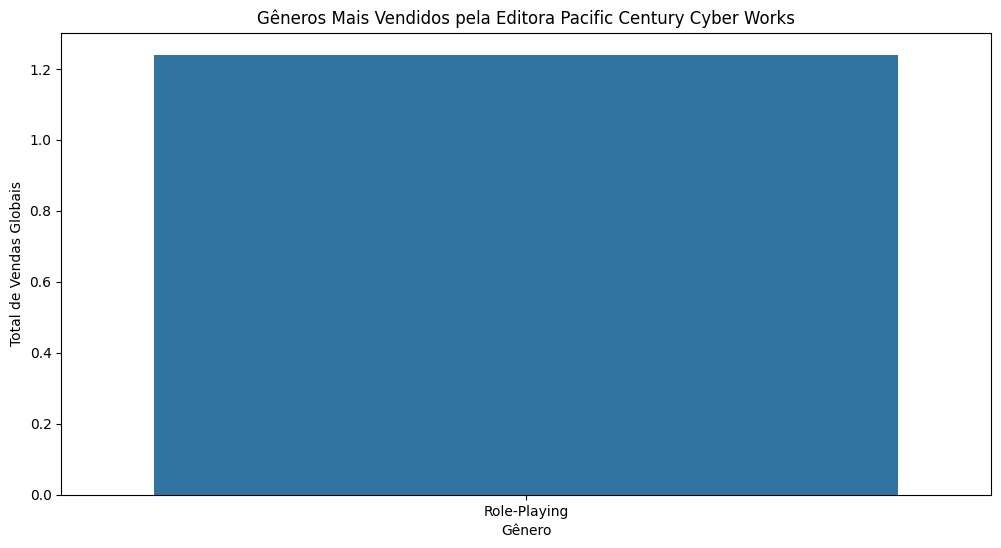

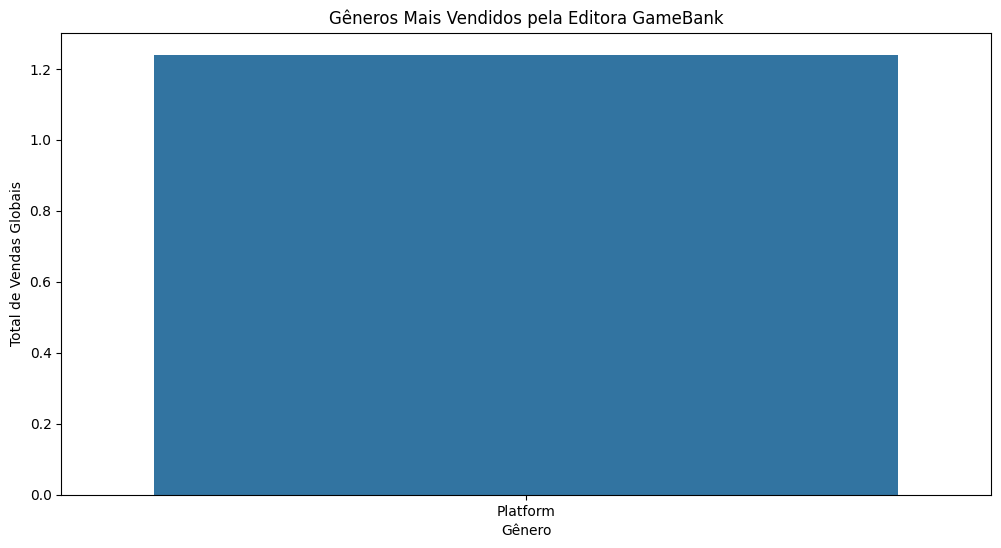

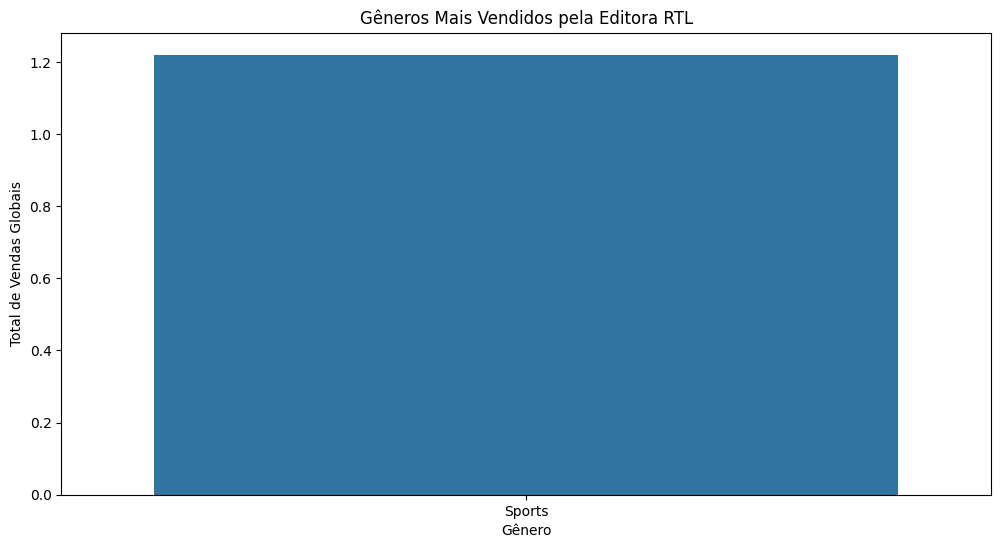

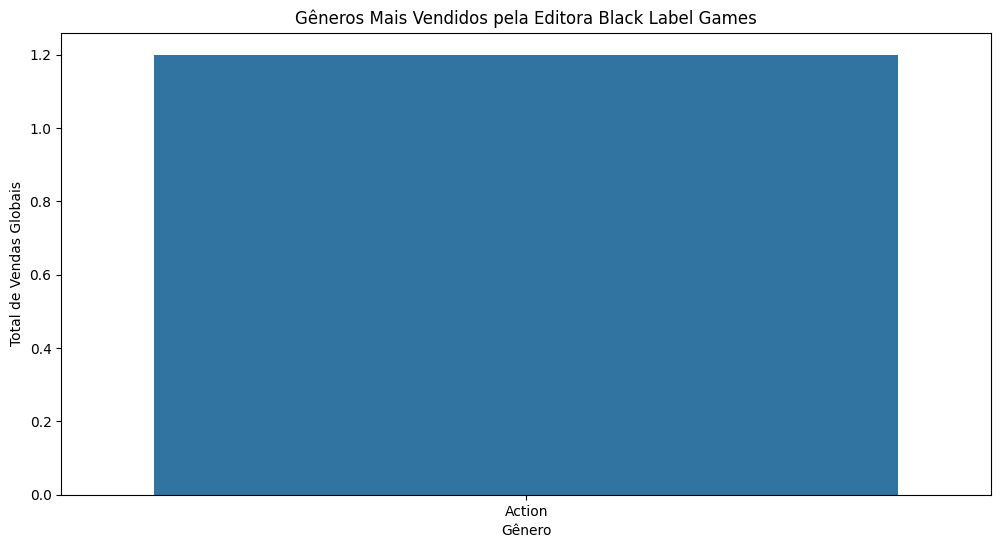

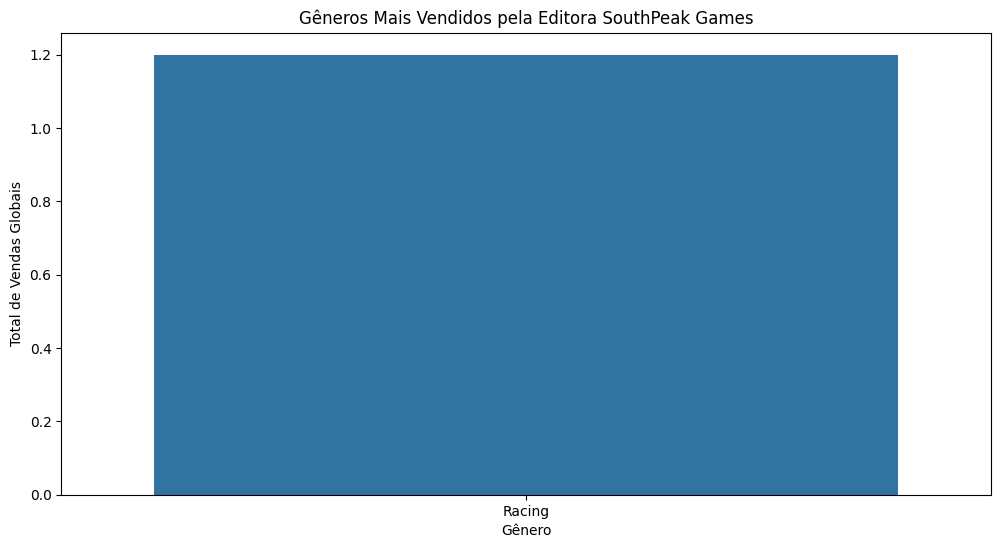

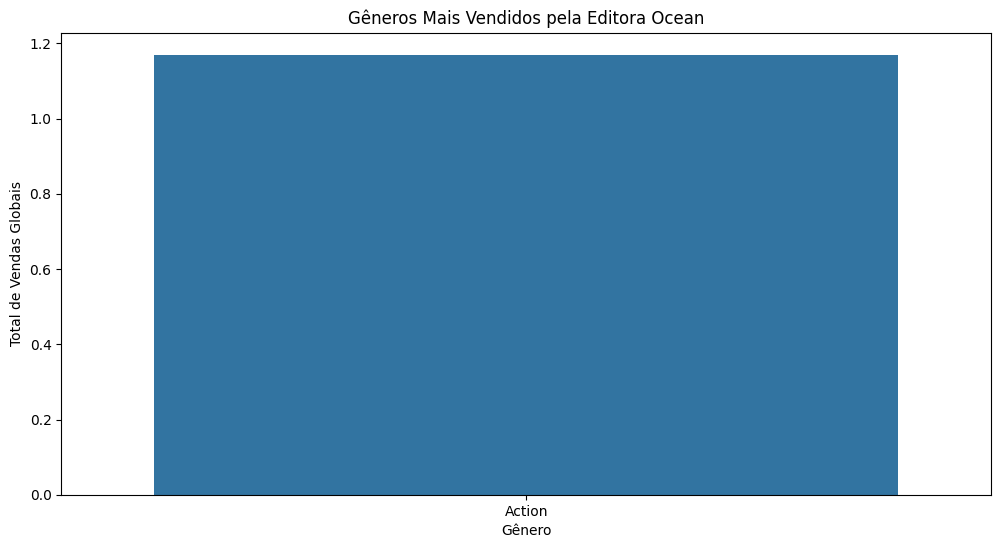

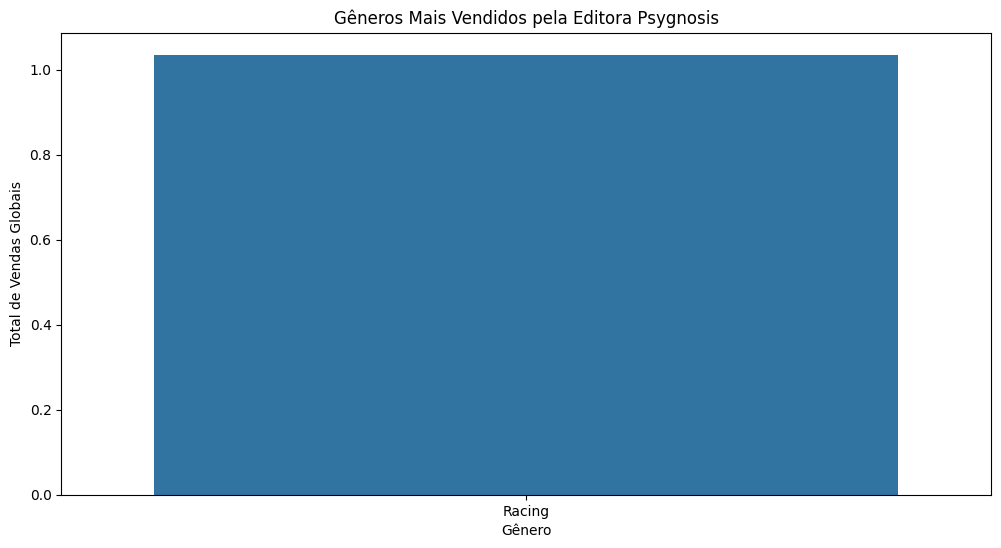

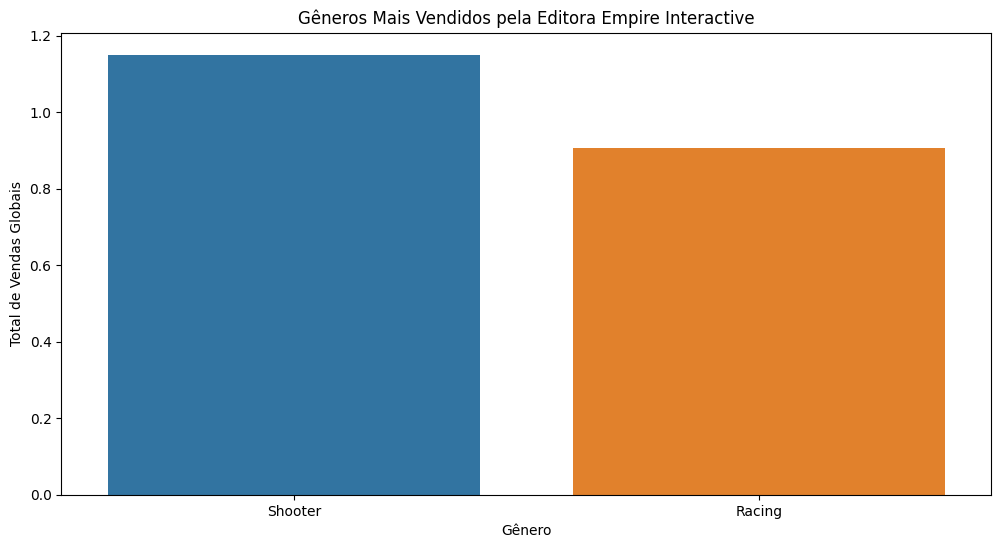

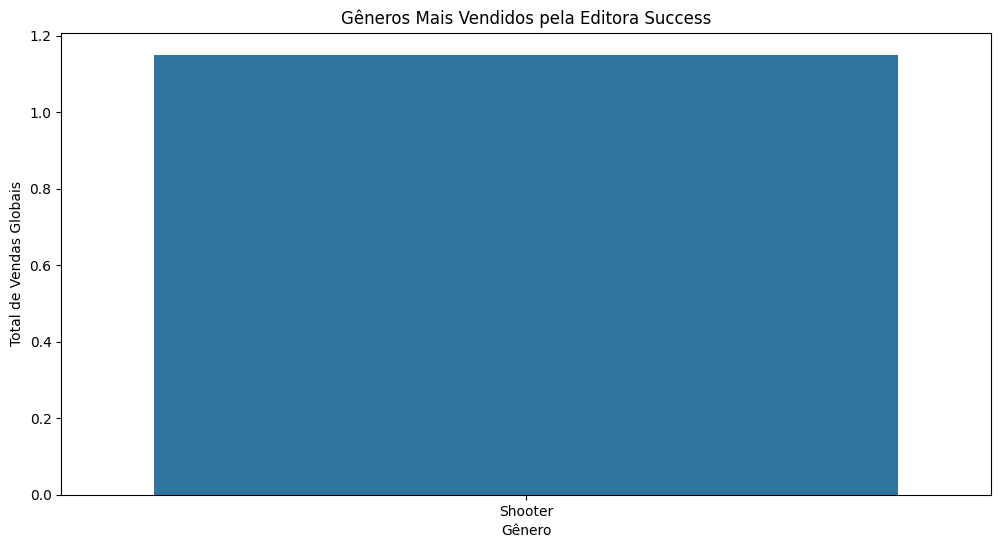

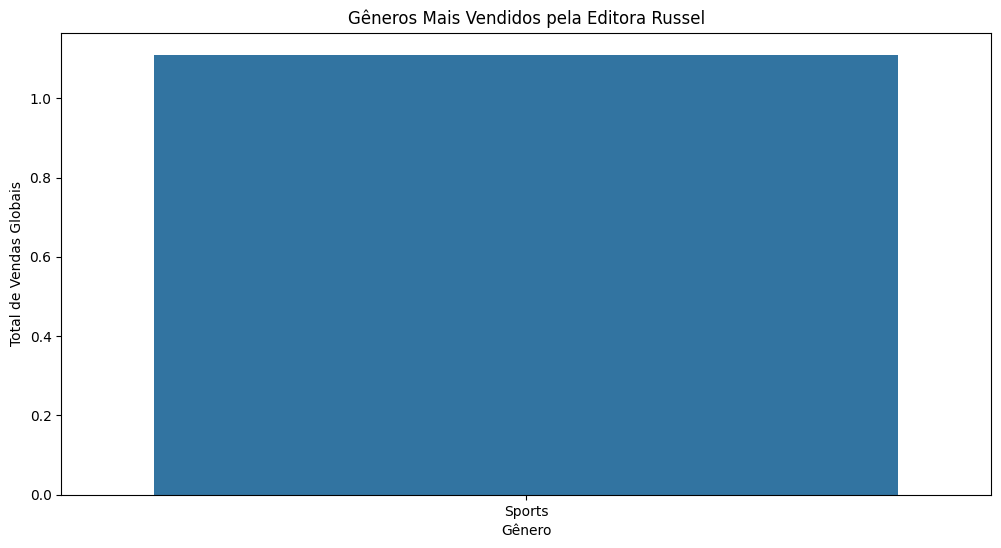

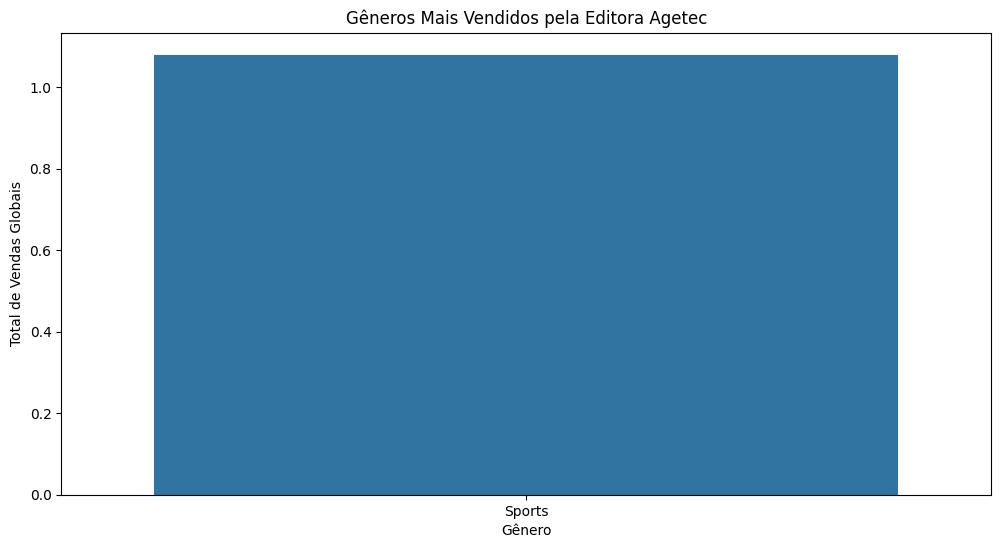

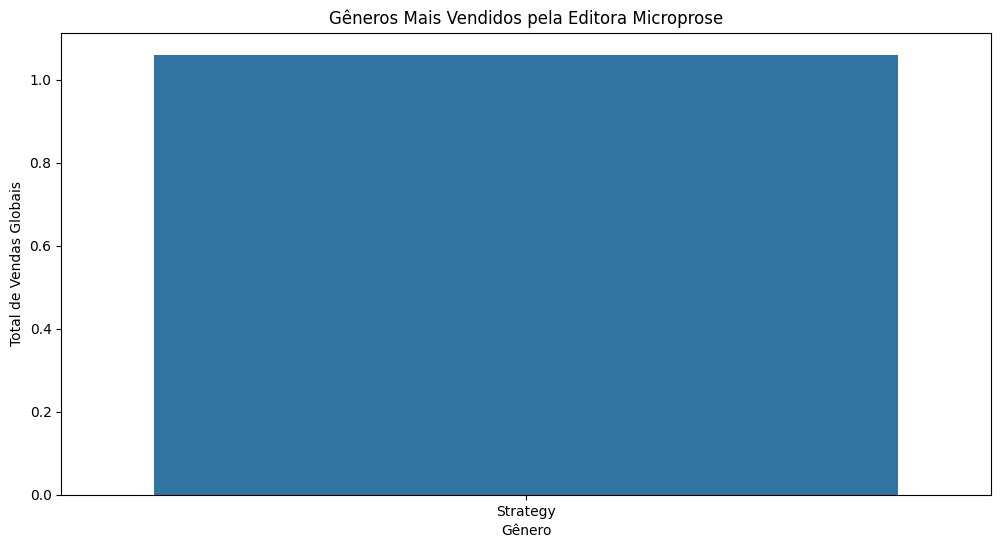

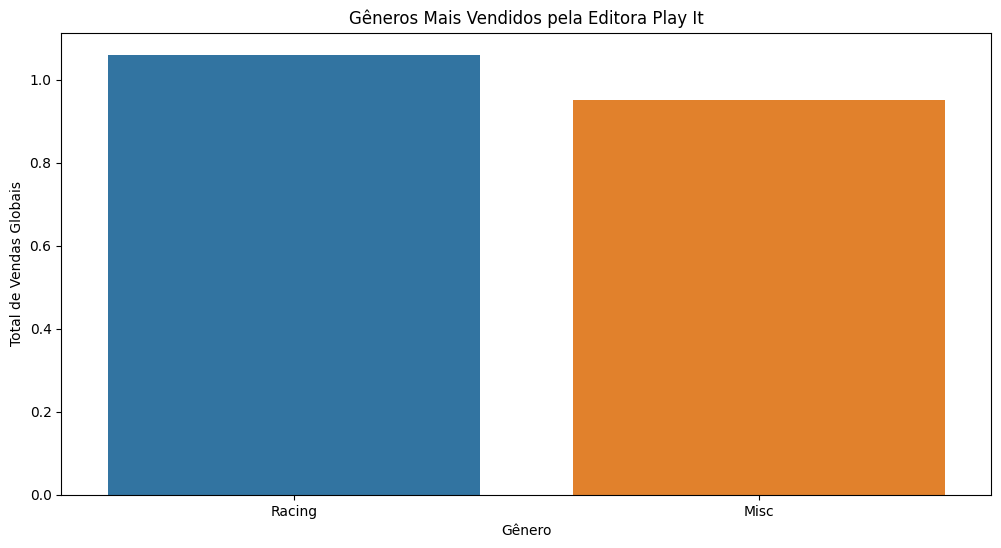

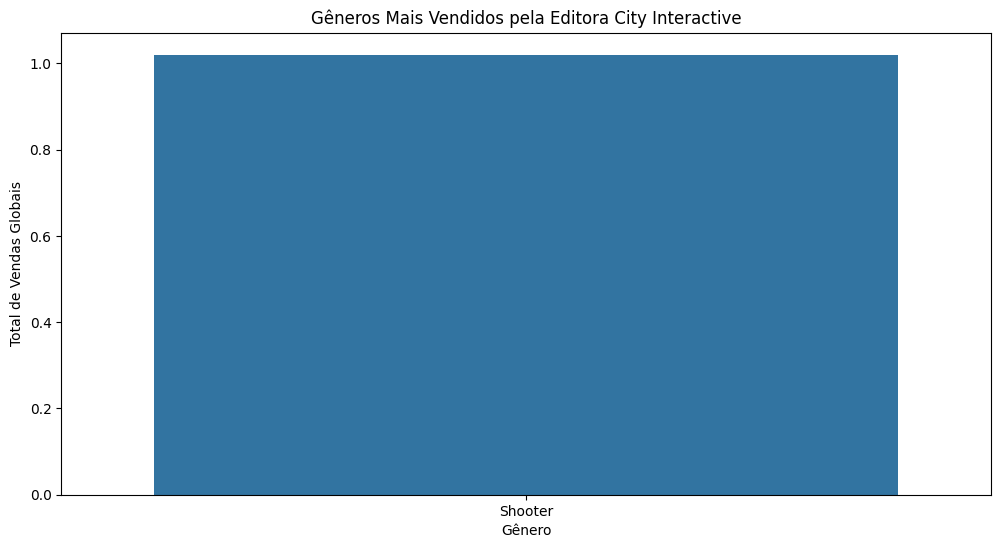

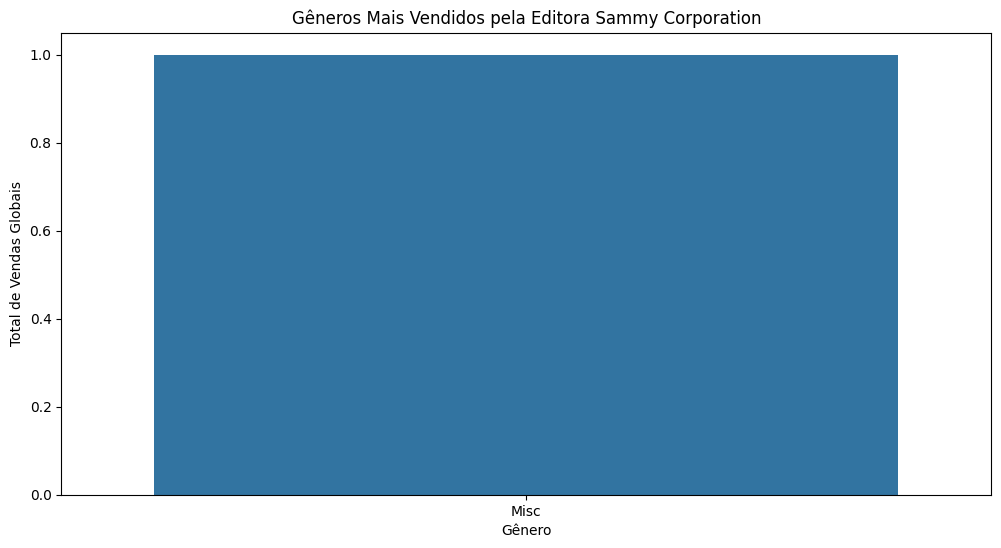

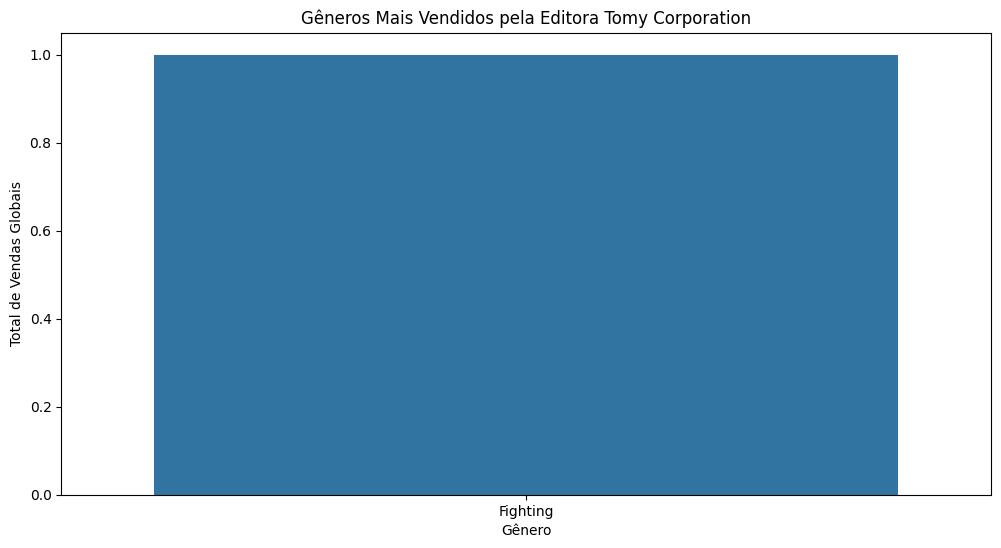

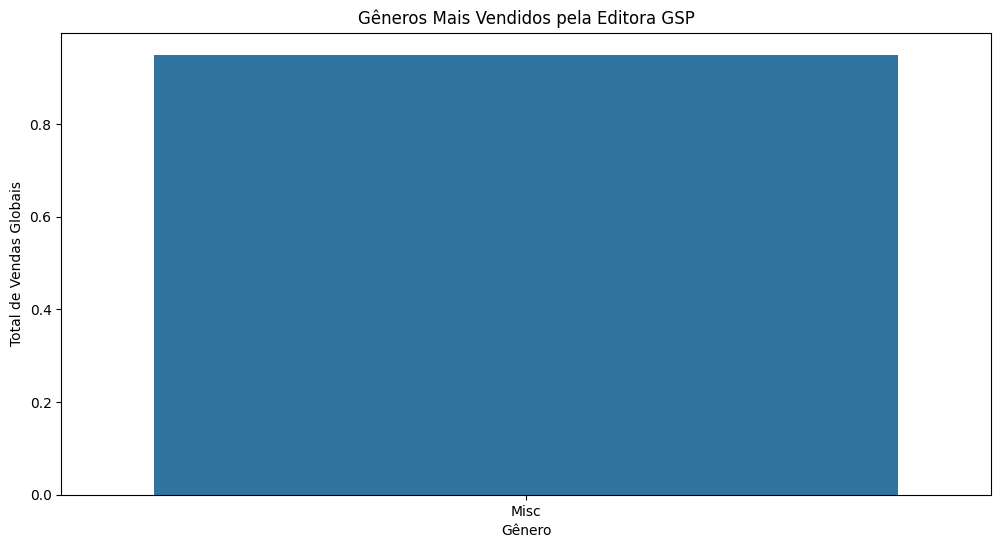

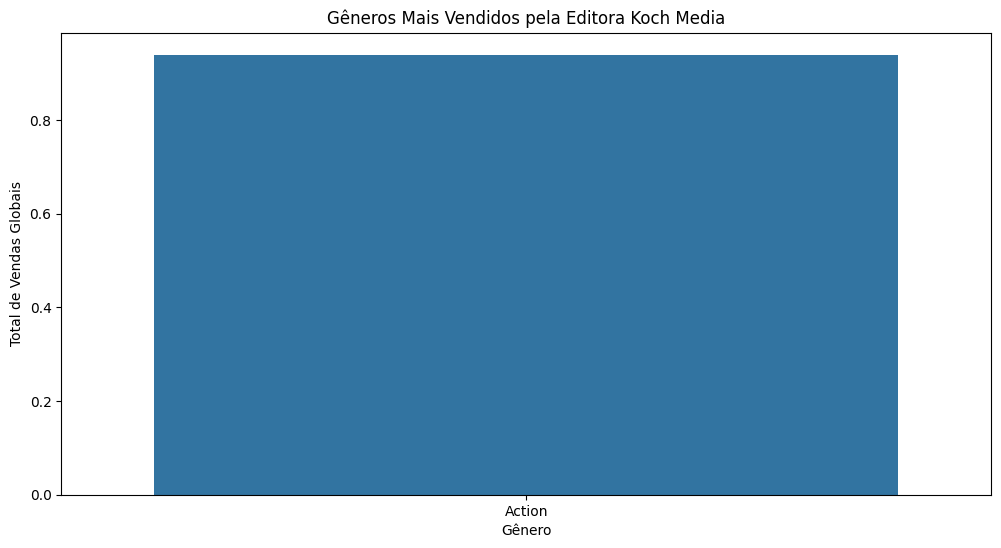

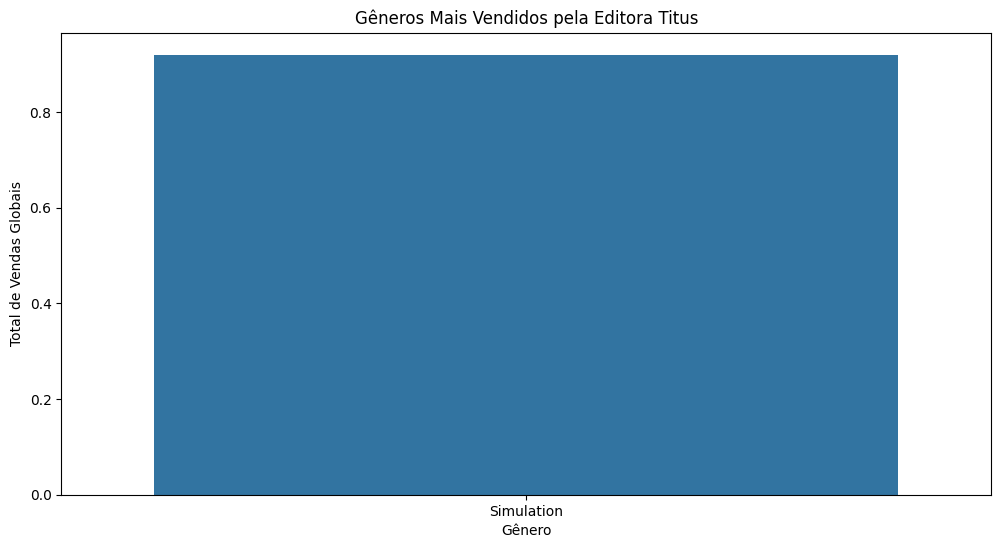

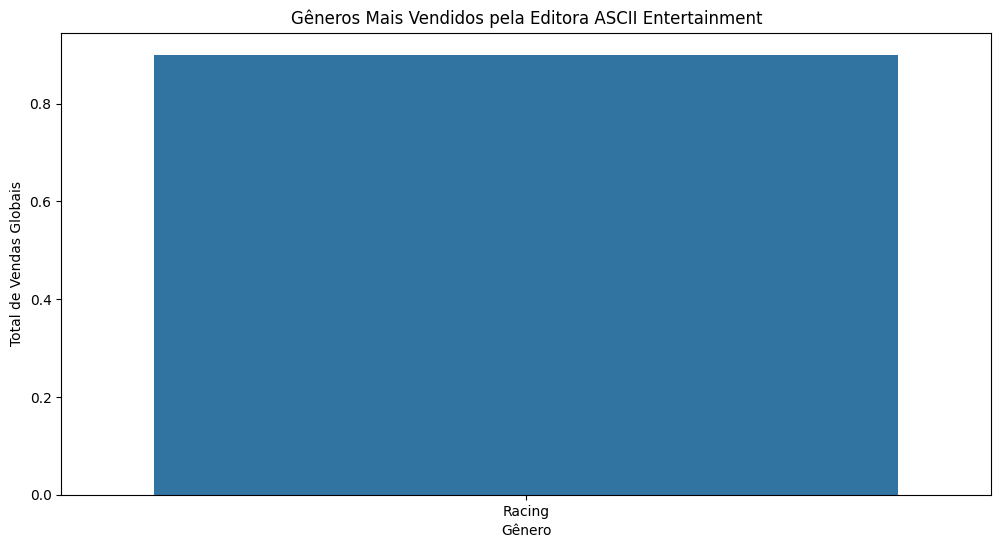

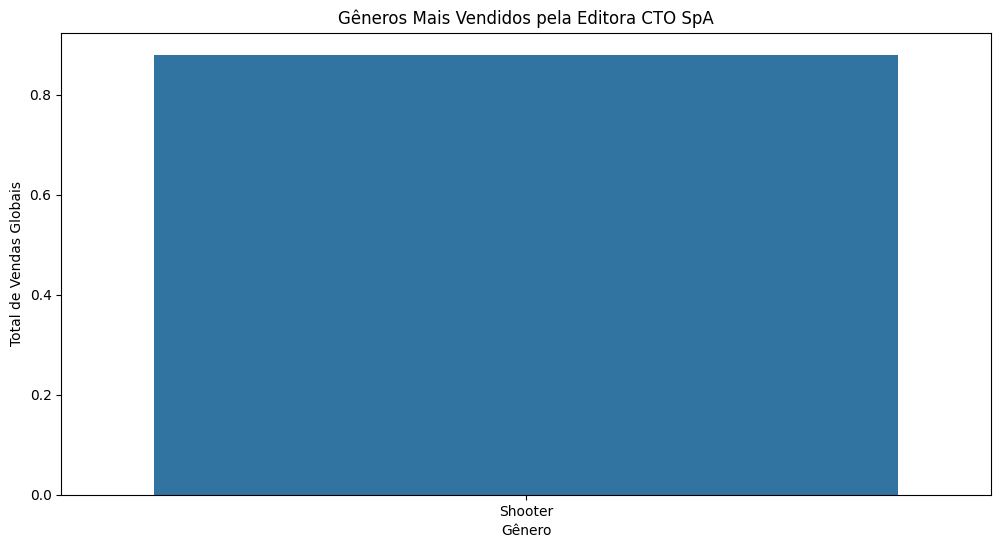

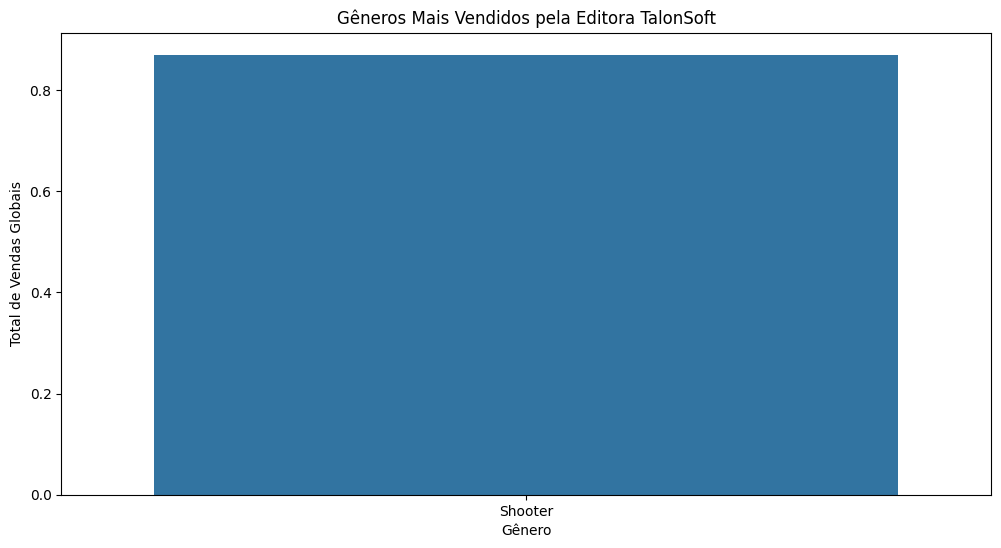

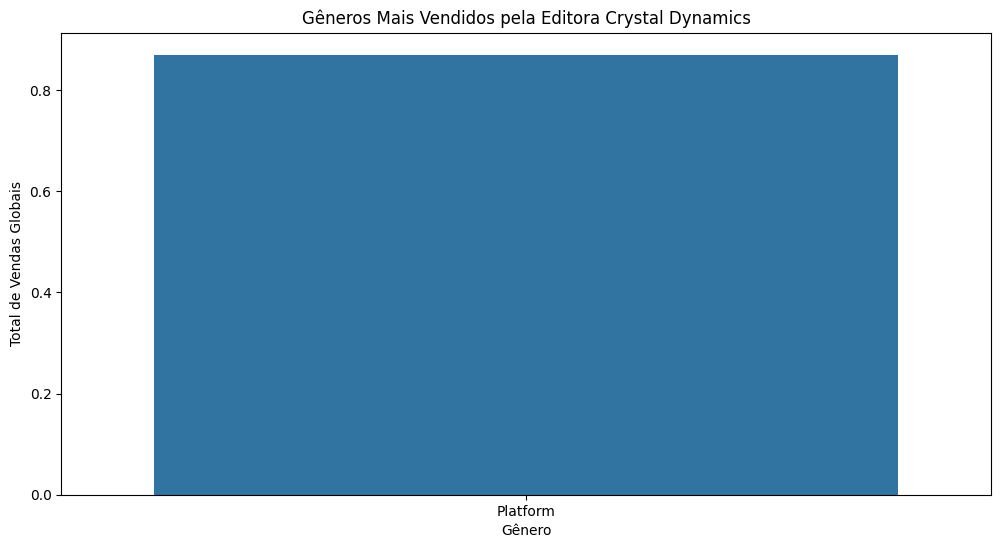

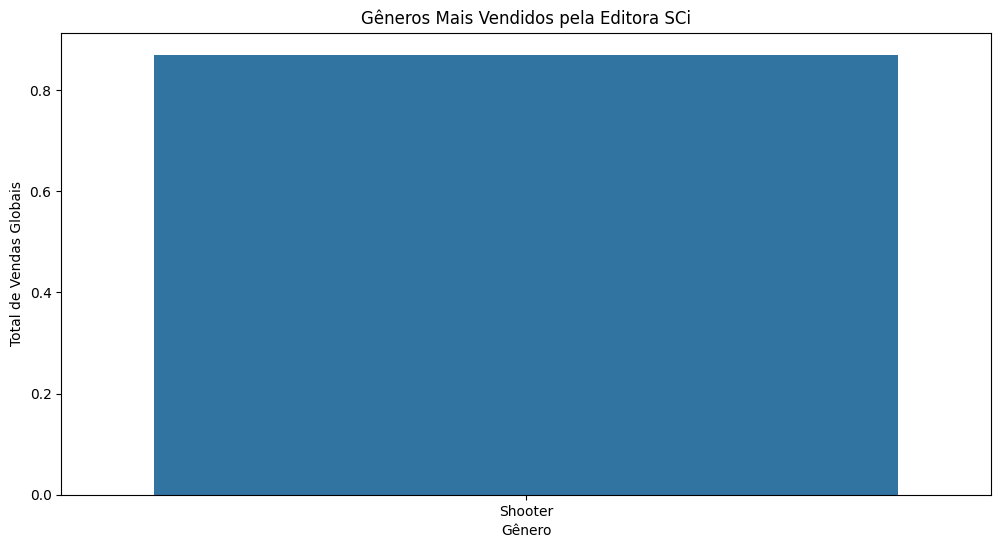

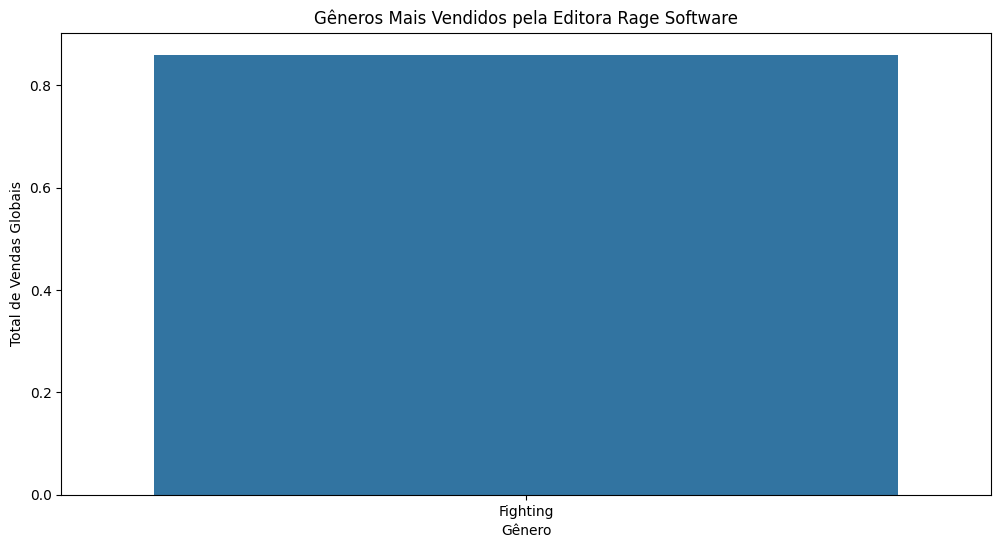

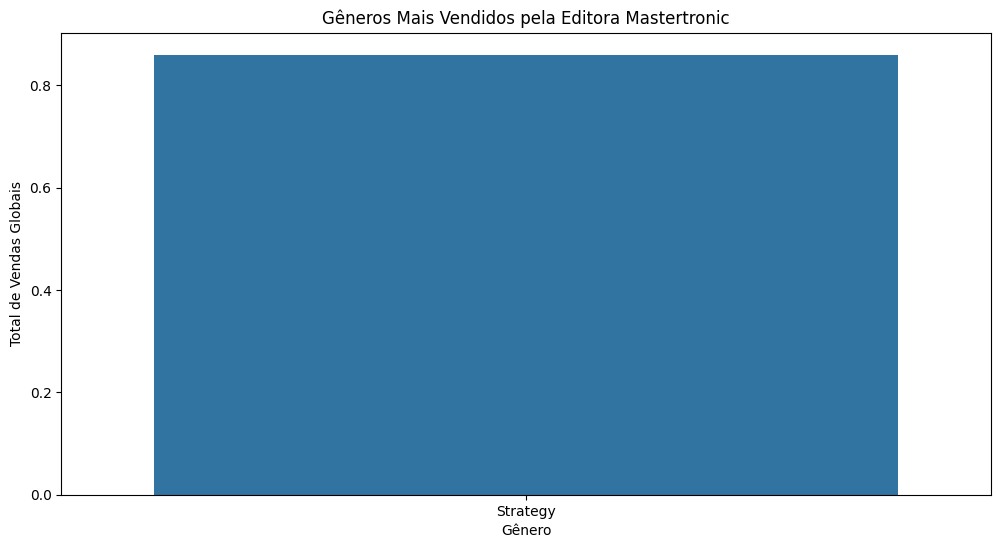

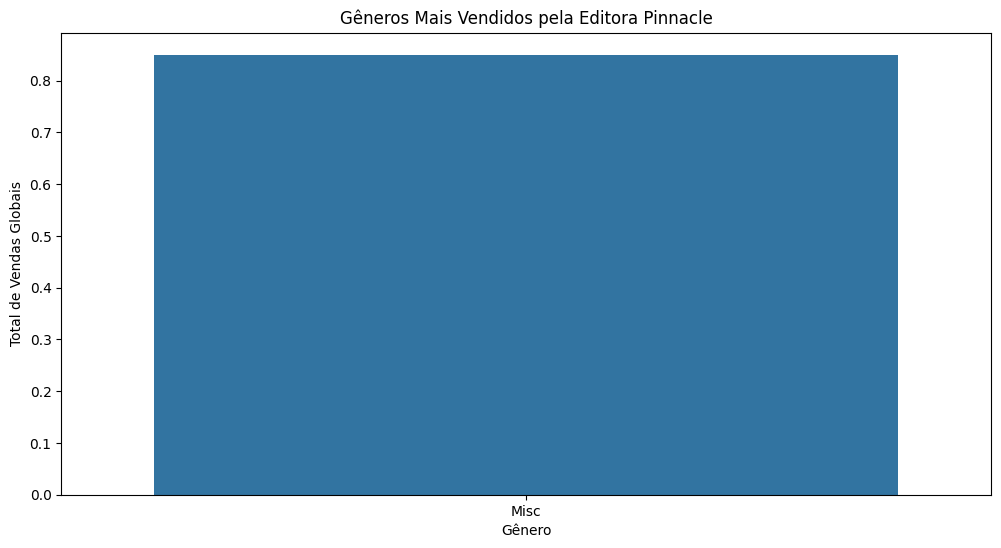

In [12]:
editoras = df['Publisher'].unique()

# Iterar sobre as editoras
for editora in editoras:
    # Filtrar o DataFrame para a editora atual
    df_editora = df[df['Publisher'] == editora]
    
    # Criar um gráfico de barras
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Genre', y='Global', data=df_editora, errorbar=None)
    
    # Adicionar rótulos e título
    plt.xlabel('Gênero')
    plt.ylabel('Total de Vendas Globais')
    plt.title(f'Gêneros Mais Vendidos pela Editora {editora}')
    
    # Exibir o gráfico
    plt.show()

## - Crescimento dos gêneros ao longo dos anos 

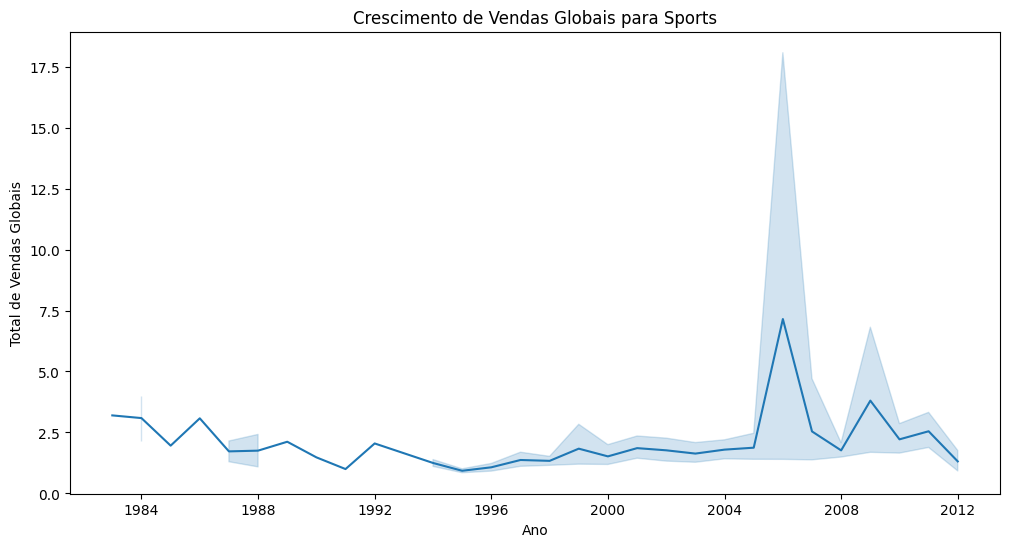

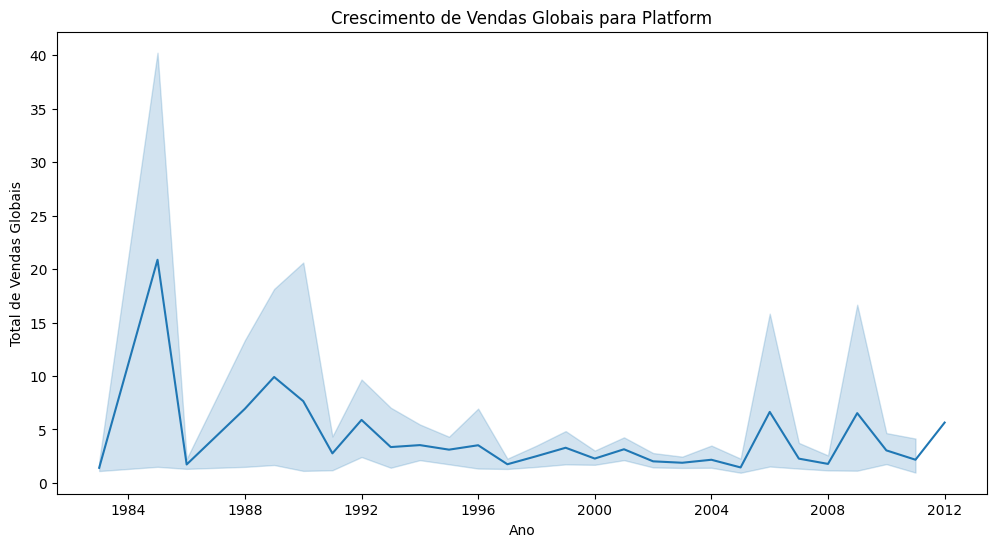

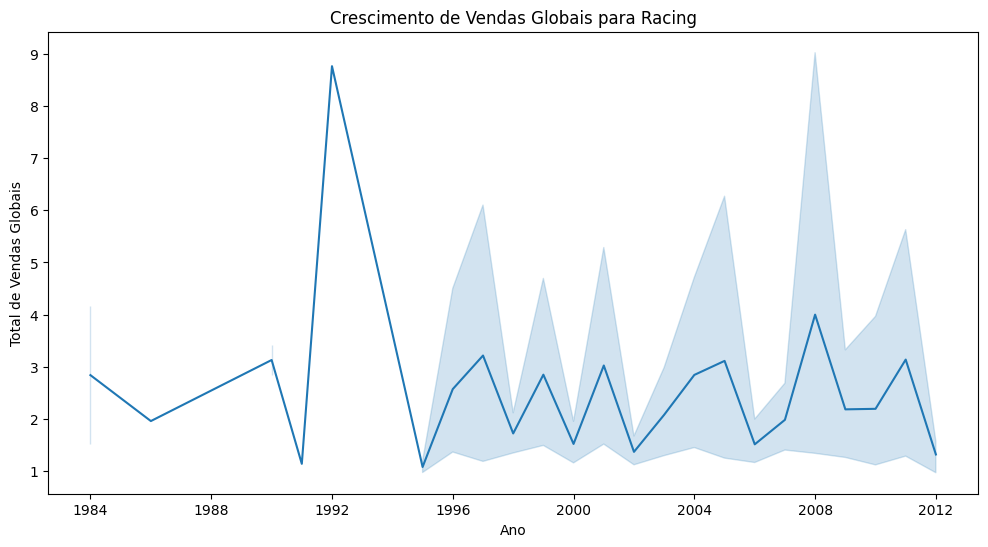

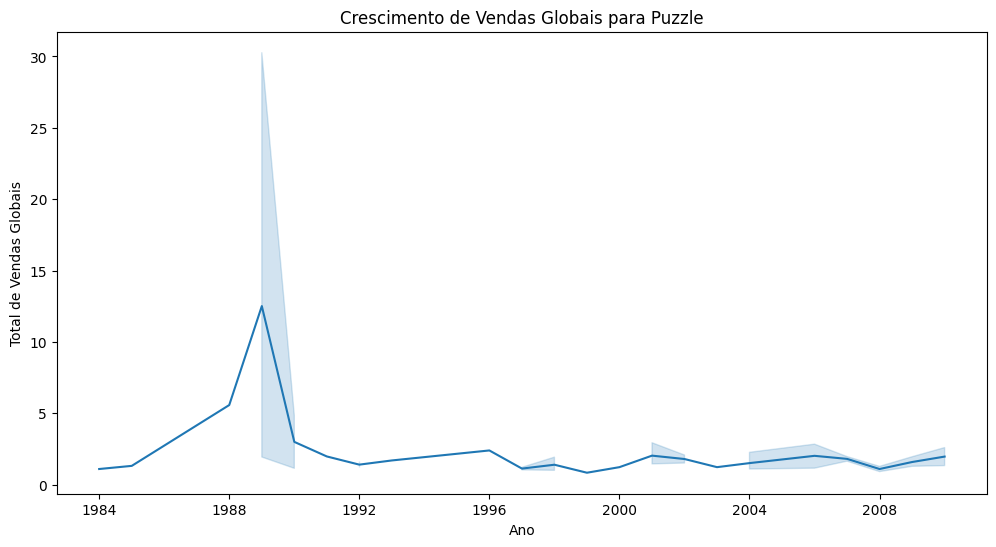

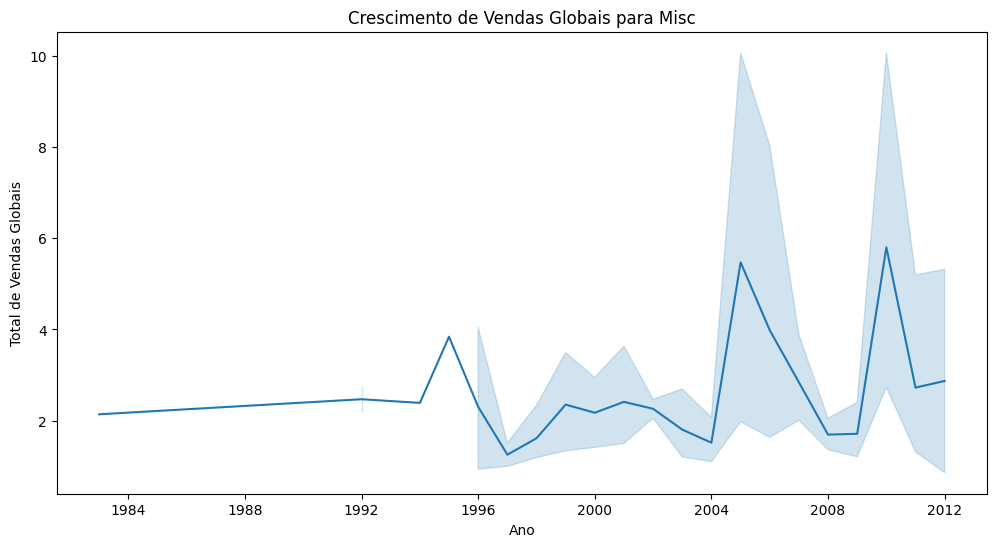

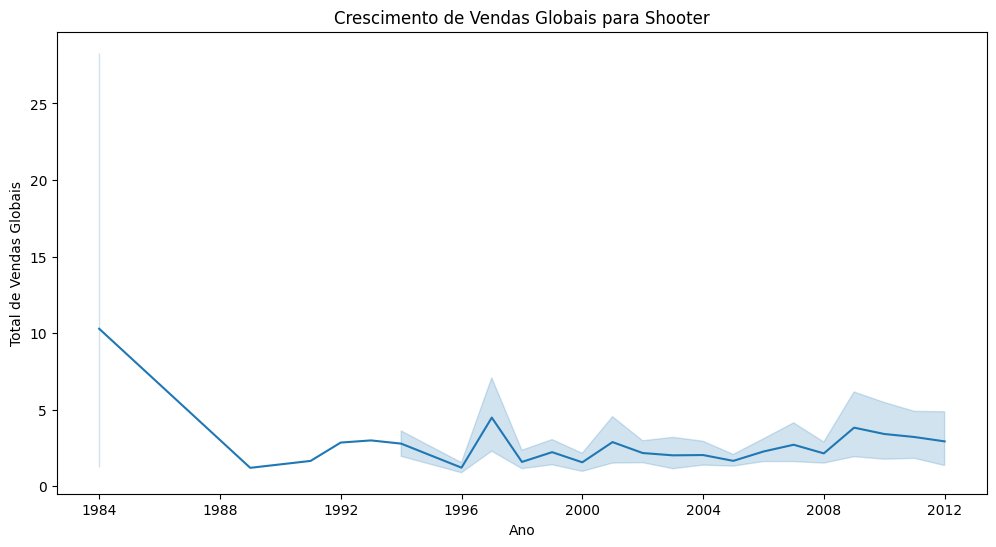

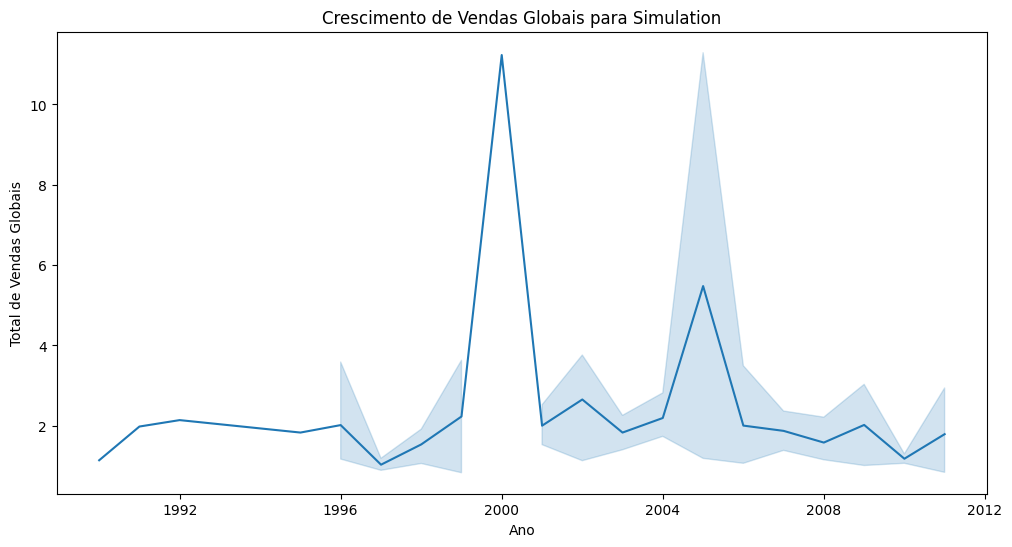

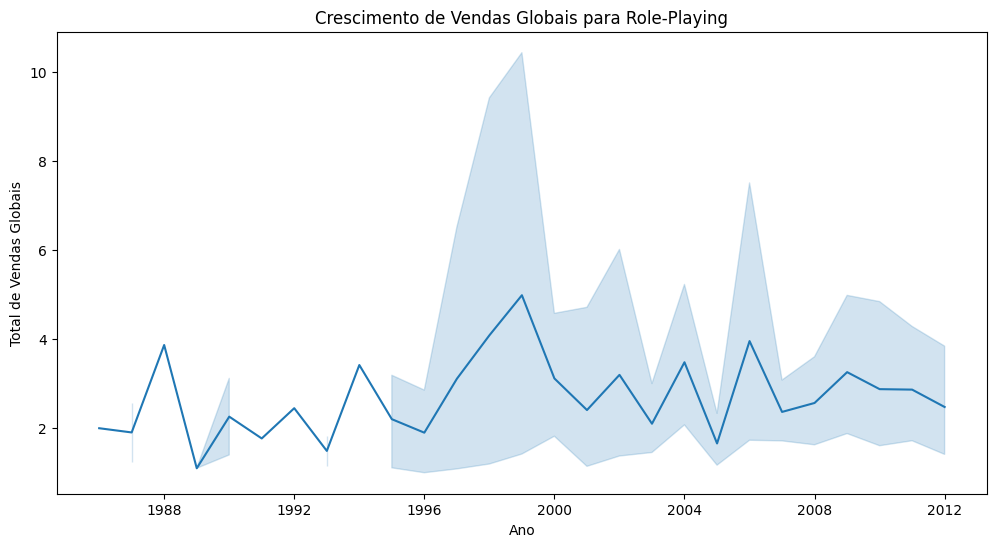

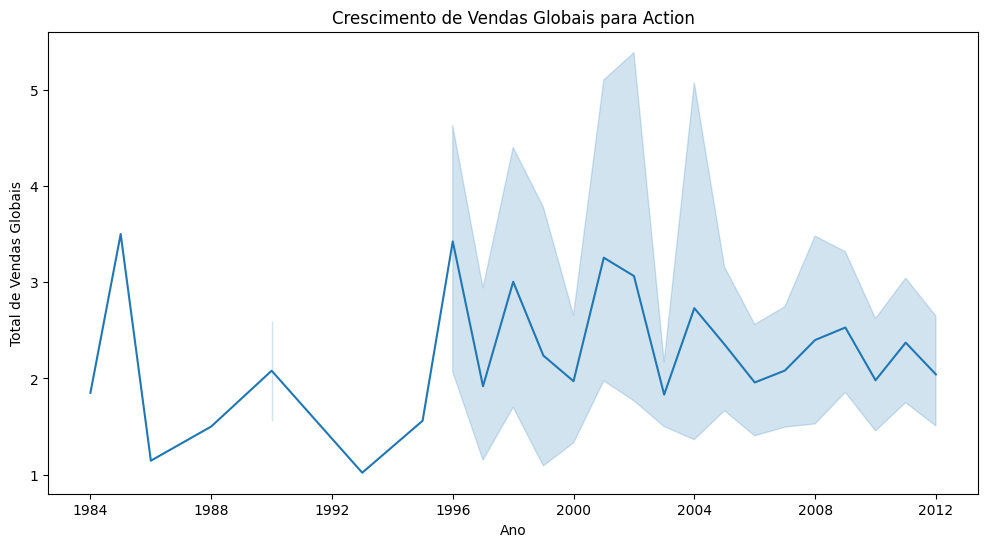

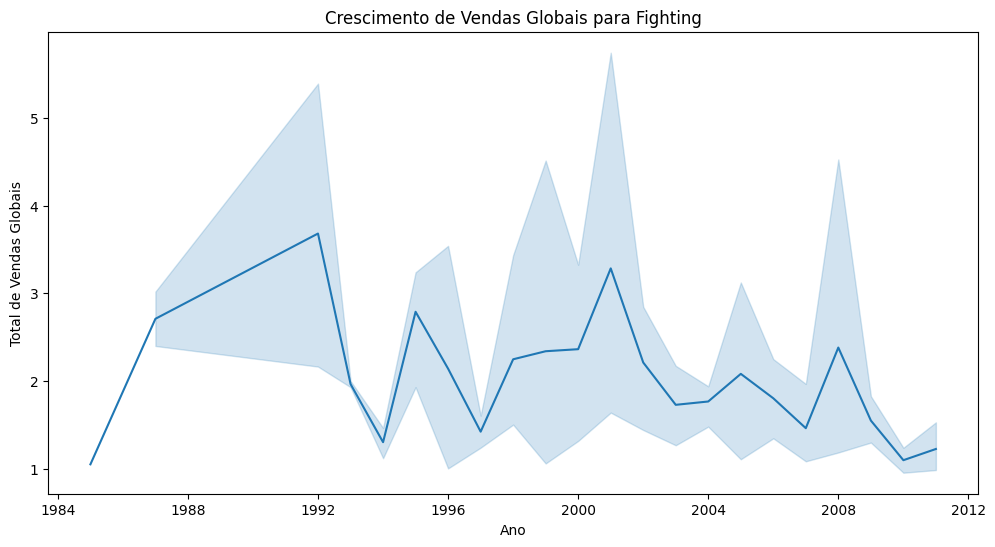

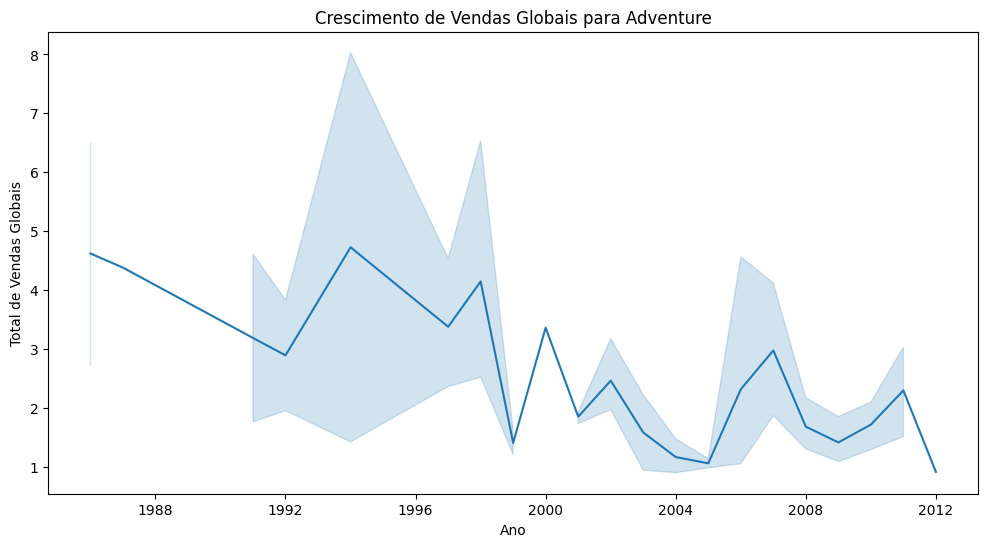

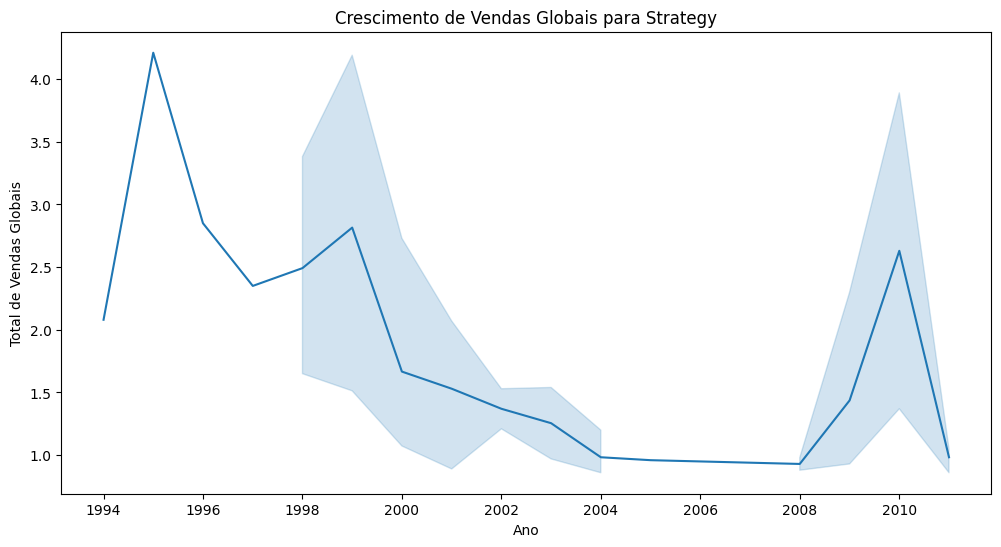

In [36]:
generos = df['Genre'].unique()


for genero in generos:

    df_genero = df[df['Genre'] == genero]
    
 
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='Year', y='Global', data=df_genero)
    

    plt.xlabel('Ano')
    plt.ylabel('Total de Vendas Globais')
    plt.title(f'Crescimento de Vendas Globais para {genero}')
    
    plt.show()

## -Publicadoras que mais venderam por região

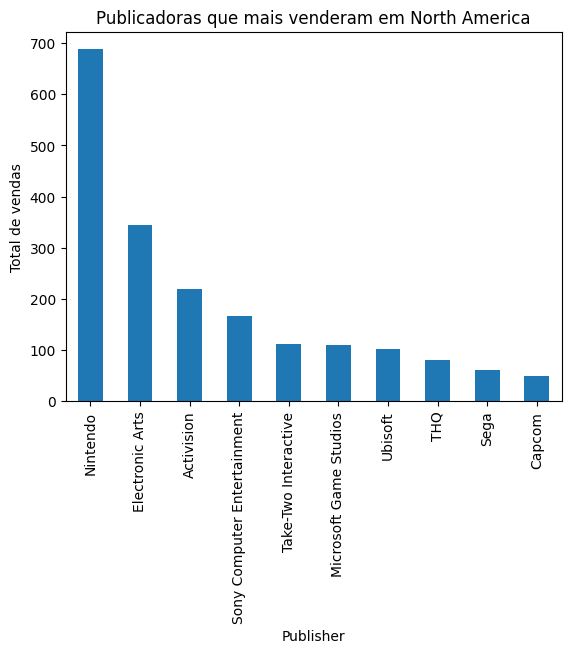

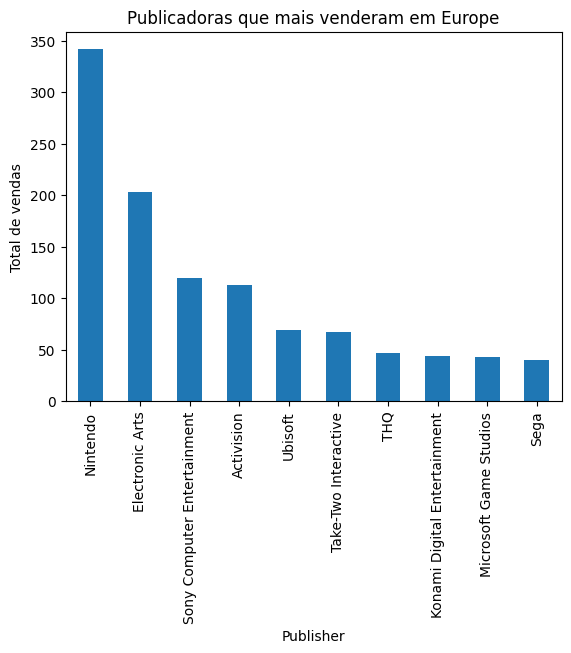

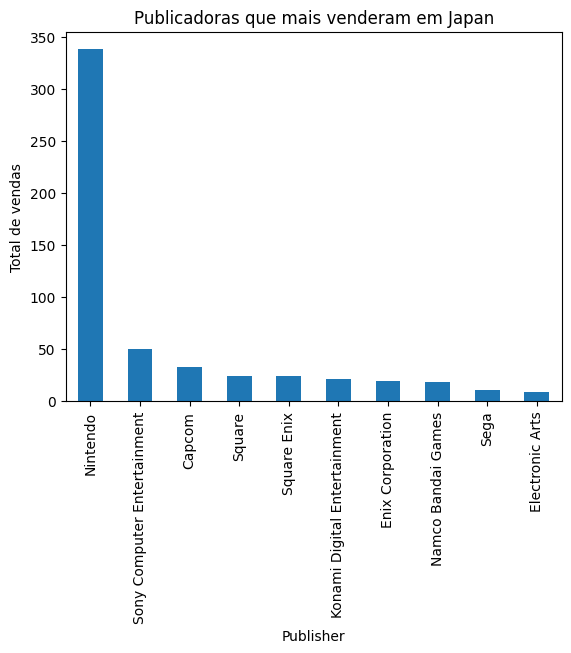

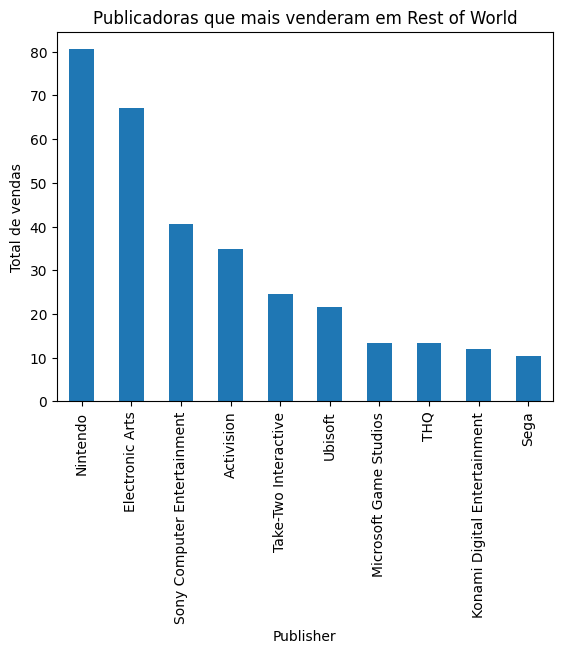

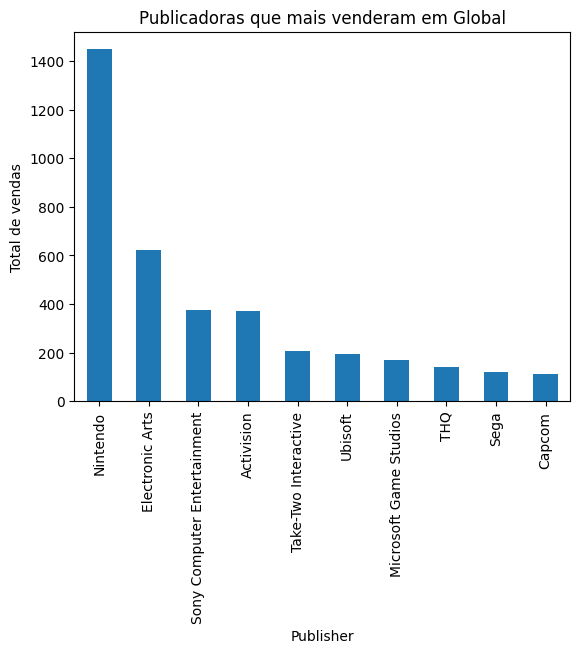

In [32]:
regiao = ['North America', 'Europe', 'Japan', 'Rest of World', 'Global']

for lugar in regiao:
    df.groupby('Publisher')[lugar].sum().sort_values(ascending=False).head(10).plot(kind='bar')

    plt.ylabel('Total de vendas')
    plt.title(f'Publicadoras que mais venderam em {lugar}')

    plt.show()


## -Modelo Preditivo 

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics





X = df[['Year', 'North America', 'Europe', 'Japan','Rest of World']]
y = df['Global']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()


model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print('Coeficientes:', model.coef_)
print('Intercept:', model.intercept_)
print('Erro Médio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Erro Quadrático Médio (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Raiz Quadrada do Erro Quadrático Médio (RMSE):', metrics.mean_squared_error(y_test, y_pred, squared=False))



Coeficientes: [2.63242366e-05 9.99982577e-01 1.00071201e+00 1.00000241e+00
 9.97429066e-01]
Intercept: -0.052849932954055046
Erro Médio Absoluto (MAE): 0.002925939918596992
Erro Quadrático Médio (MSE): 2.8256954945260724e-05
Raiz Quadrada do Erro Quadrático Médio (RMSE): 0.005315727132317903


In [47]:
results_df = pd.DataFrame({'Real': y_test, 'Previsão': y_pred})
print(results_df)

      Real  Previsão
1125  1.33  1.339925
1467  1.08  1.079800
1343  1.17  1.159609
818   1.71  1.710070
272   3.64  3.648754
...    ...       ...
1781  0.90  0.890098
342   3.17  3.169752
873   1.64  1.639746
1566  1.02  1.019643
622   2.09  2.090098

[376 rows x 2 columns]
